In [1]:
import sys
from pathlib import Path
from datetime import datetime
import pysam

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

modkit found with expected version 0.2.4


In [2]:
# cd /home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/

input_bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG.bam"

output_bam_prefix = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG"

chrom="chr1"
pos=206588080 

# Define the paths to the haplotyped BAM files
bam_files = {
    'A': f"{output_bam_prefix}_{chrom}_{pos}_A.bam",
    'T': f"{output_bam_prefix}_{chrom}_{pos}_T.bam",
    'C': f"{output_bam_prefix}_{chrom}_{pos}_C.bam",
    'G': f"{output_bam_prefix}_{chrom}_{pos}_G.bam"
}
bam_files

{'A': '/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG_chr1_206588080_A.bam',
 'T': '/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG_chr1_206588080_T.bam',
 'C': '/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG_chr1_206588080_C.bam',
 'G': '/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20

In [3]:
bam_files['A']

'/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG_chr1_206588080_A.bam'

In [7]:
system_info()

# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
#  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')
output_dir = create_output_directory("./dimelo_v2_output")

# Make sure to use UpperCase fasta in the Reference genome, so that the mapping of the sequence is got giving erorrs
# awk '{if ($0 ~ /^>/) print $0; else print toupper($0)}' /home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa > /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
# samtools faidx /home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
# '/home/michalula/data/ref_genomes/t2t_v2_0/chm13v2.0.fa')
reg_genome_version = "t2t_v2_0"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'

# region_start = 206586162
# region_end = 206586192

# Expend window size
expand_window_size = 50 # 500 #500 #1500 # 0 
expand_window_size
print("Expend window size by 2 * ", expand_window_size)
region_start = 206586162 - expand_window_size
region_end = 206586192 + expand_window_size + 1

# # FULL 7 KB WINDOW: 1:206583000-206590000
# region_start = 206583000   # 206586162
# region_end = 206590000 # 20658619


motifs=['CG,0']

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
Expend window size by 2 *  50


In [5]:
def extract_mCG_stat_plots(experiment_name, bam_path, date_today, 
                           reg_genome_version, region_chr, region_start, region_end, 
                           ref_genome_path, output_dir, motifs, threshold_mC):
        
    region_str = region_chr + ":" + str(region_start) + "-" + str(region_end)  # 'chr1:206586162-206586192'
    region_length = region_end - region_start
    print("region_length", region_length)


    save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
    ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

    print('region_chr', region_chr)
    print('region_start', region_start)
    print('region_end', region_end)
    print(f'{region_chr}:{region_start}-{region_end}')
    
    extract_file, extract_regions = extract_from_bam(
        bam_path=bam_path,
        ref_genome_file=ref_genome_path,
        output_dir=output_dir,
        regions=region_str,
        motifs=motifs,
        output_name='extracted_reads',
        threshold_mC=threshold_mC,
    )

    keep_unmethylated_reads = False

    if extract_file:
        if keep_unmethylated_reads:
            reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
            visualize_data(reads_df)

            padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
        else:
            reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
            visualize_data(reads_df)
            padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
        if padded_reads is not None:
            plot_padded_reads(padded_reads, ref_seq_list)
            save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

    """
    Main pipeline for processing and visualizing CpG units on forward and reverse strands 
    """
    try:
        # Define constants
        # experiment_name = "unedited_T_primerES_nCATS"
        # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
        # save_padded_reads_name_np = "padded_reads.npy"
        # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
        # region_chr = "chr1"
        # region_start = 206586162
        # region_end = 206586192

        # Process pipeline
        CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
            experiment_name=experiment_name, save_folder_path=output_dir, 
            save_padded_reads_name_np=save_padded_reads_name_np, 
            ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
        )

        print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
        # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

    except Exception as e:
        print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrE…

          |    0%

          | Transferring 44 from reads.CG,0.txt into reads.combined_basemods.h5, new size 44   0% | 00:00<?

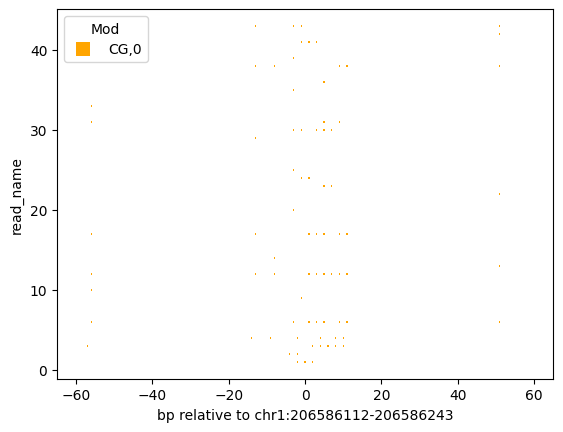

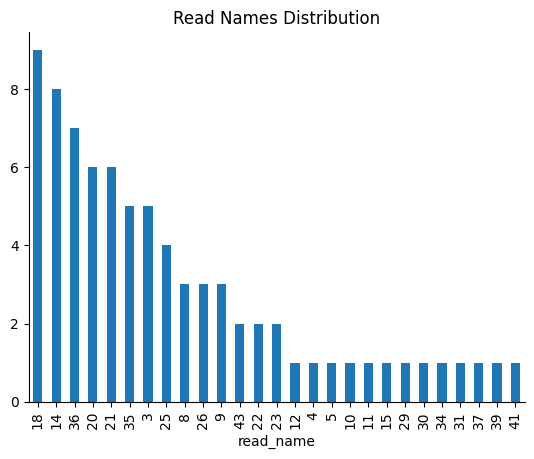

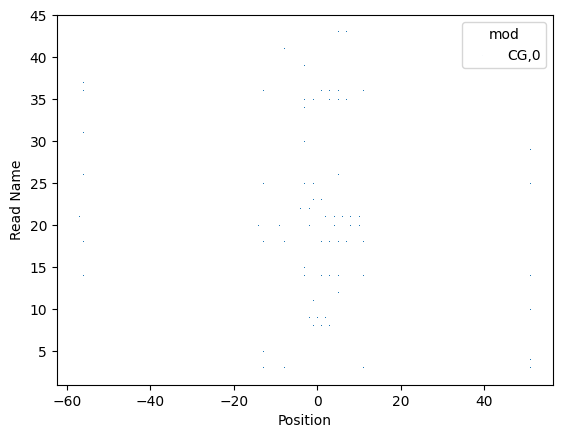

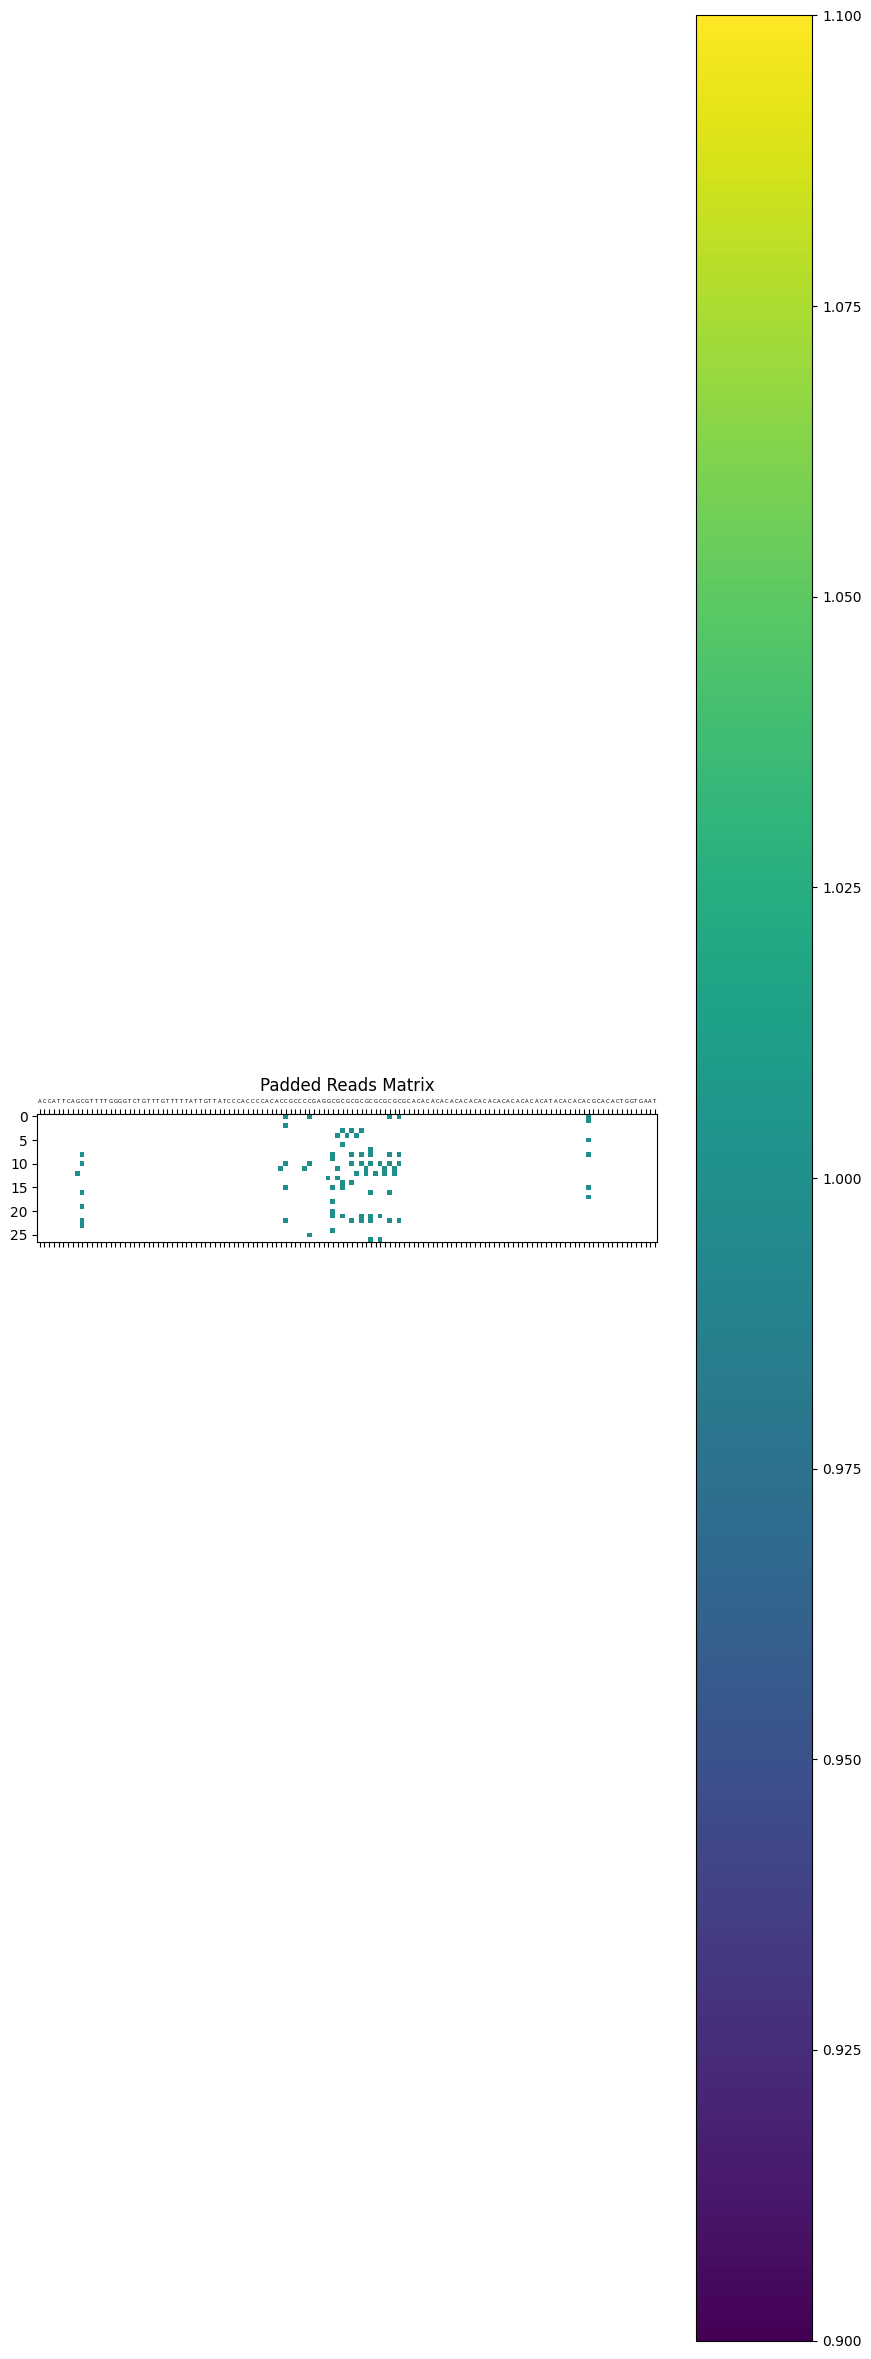

Padded reads saved to padded_reads_A_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy
Padded reads loaded successfully.


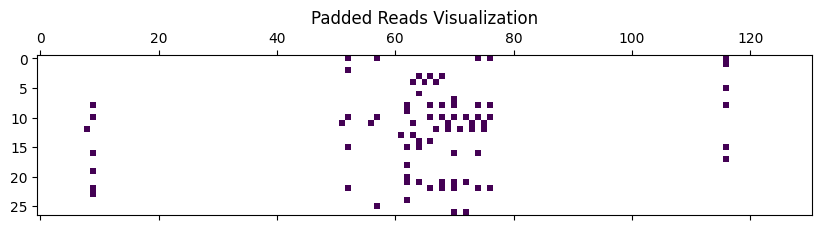

Visualization completed.
Region length: 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [9, 52, 57, 62, 64, 66, 68, 70, 72, 74, 76, 116]
CG_1 at index 9 has genomic coordinate: chr1:206586121
CG_2 at index 52 has genomic coordinate: chr1:206586164
CG_3 at index 57 has genomic coordinate: chr1:206586169
CG_4 at index 62 has genomic coordinate: chr1:206586174
CG_5 at index 64 has genomic coordinate: chr1:206586176
CG_6 at index 66 has genomic coordinate: chr1:206586178
CG_7 at index 68 has genomic coordinate: chr1:206586180
CG_8 at index 70 has genomic coordinate: chr1:206586182
CG_9 at index 72 has genomic coordinate: chr1:206586184
CG_10 at index 74 has genomic coordinate: chr1:206586186
CG_11 at index 76 has genomic coordinate: chr1:206586188
CG_12 at index 116 has genomic coordinate: chr1:206586228
CG_info_df     Po

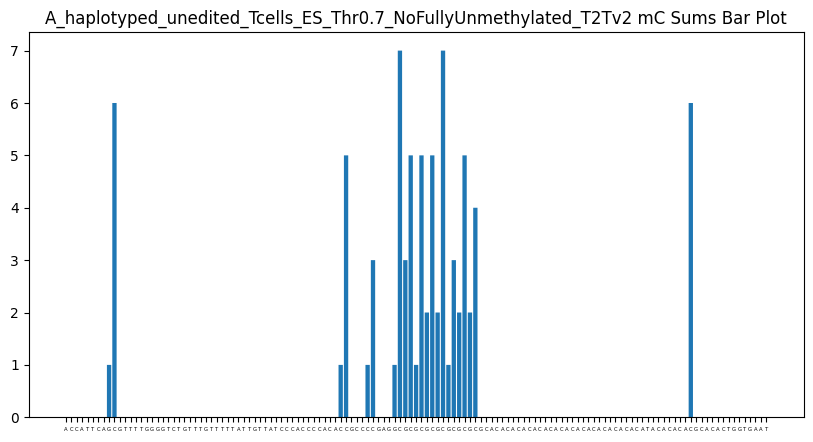

(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.03703704 0.22222222 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03703704 0.18518519 0.
 0.         0.         0.03703704 0.11111111 0.         0.
 0.         0.03703704 0.25925926 0.11111111 0.18518519 0.03703704
 0.18518519 0.07407407 0.18518519 0.07407407 0.25925926 0.03703704
 0.11111111 0.07407407 0.18518519 0.07407407 0.14814815 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

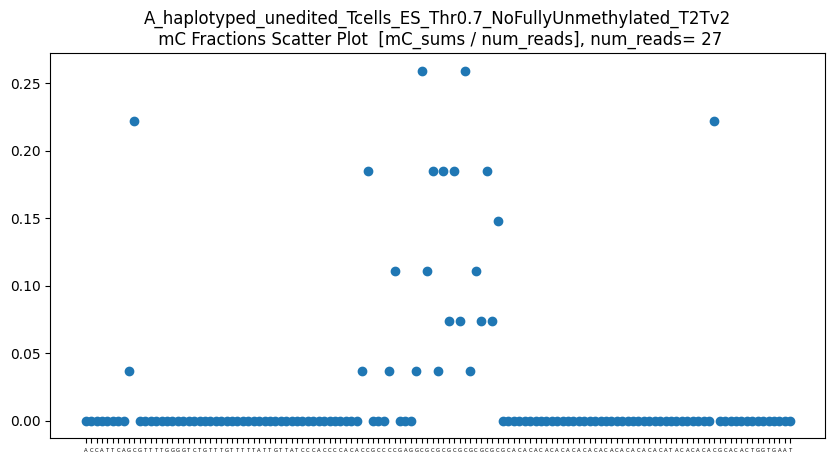

CGs_all_sums  = [7. 6. 4. 8. 8. 6. 7. 9. 4. 7. 6. 6.]


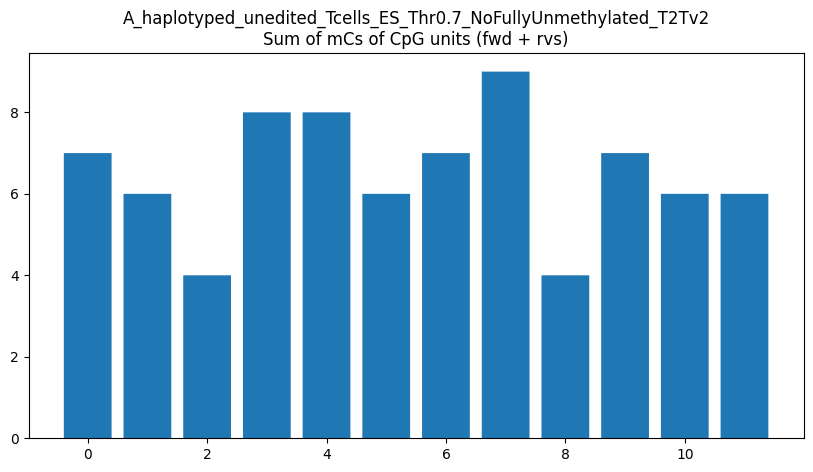

CGs_all_sums / len(CGs_all) = [0.25925926 0.22222222 0.14814815 0.2962963  0.2962963  0.22222222
 0.25925926 0.33333333 0.14814815 0.25925926 0.22222222 0.22222222]


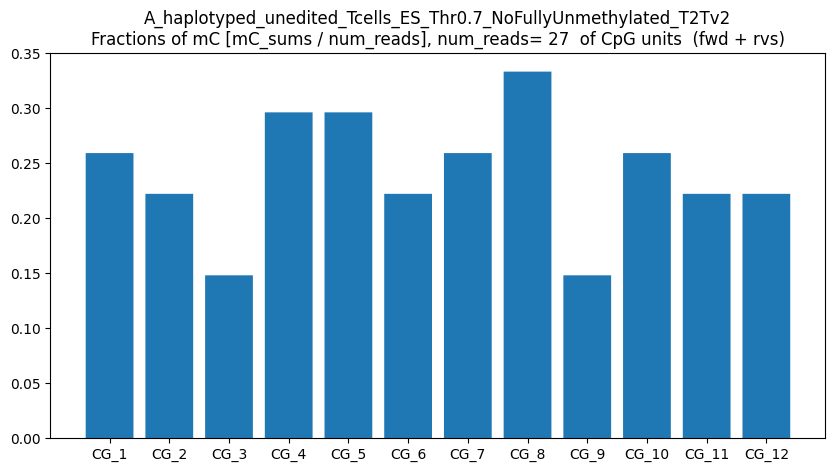

CGs_all_on_fwd_C_sums = [0. 0. 0. 0. 0. 0. 0. 0. 0. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 6. 0. 0. 0. 0. 4. 0. 0. 0. 0. 8. 0. 8. 0. 6. 0. 7. 0. 9. 0.
 4. 0. 7. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


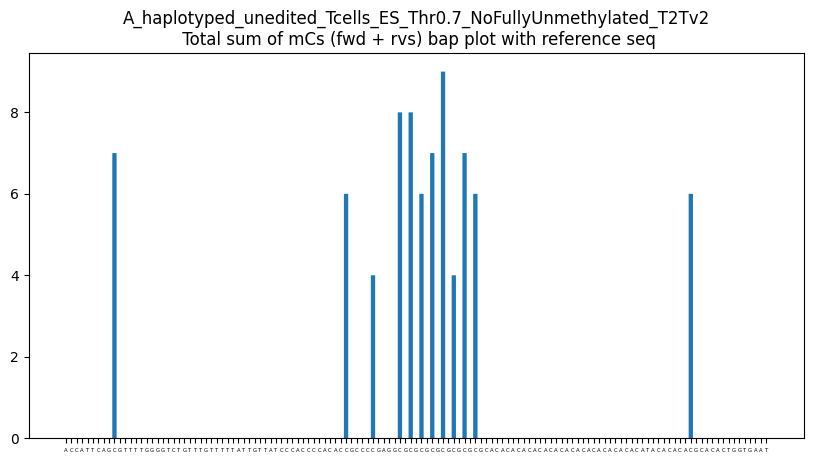

len(CGs_all) = 27
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.25925926 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.22222222 0.
 0.         0.         0.         0.14814815 0.         0.
 0.         0.         0.2962963  0.         0.2962963  0.
 0.22222222 0.         0.25925926 0.         0.33333333 0.
 0.14814815 0.         0.25925926 0.         0.22222222 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.

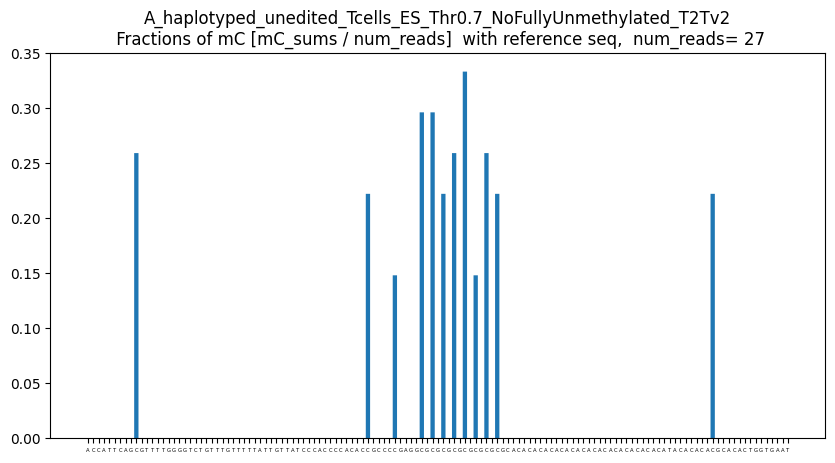

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


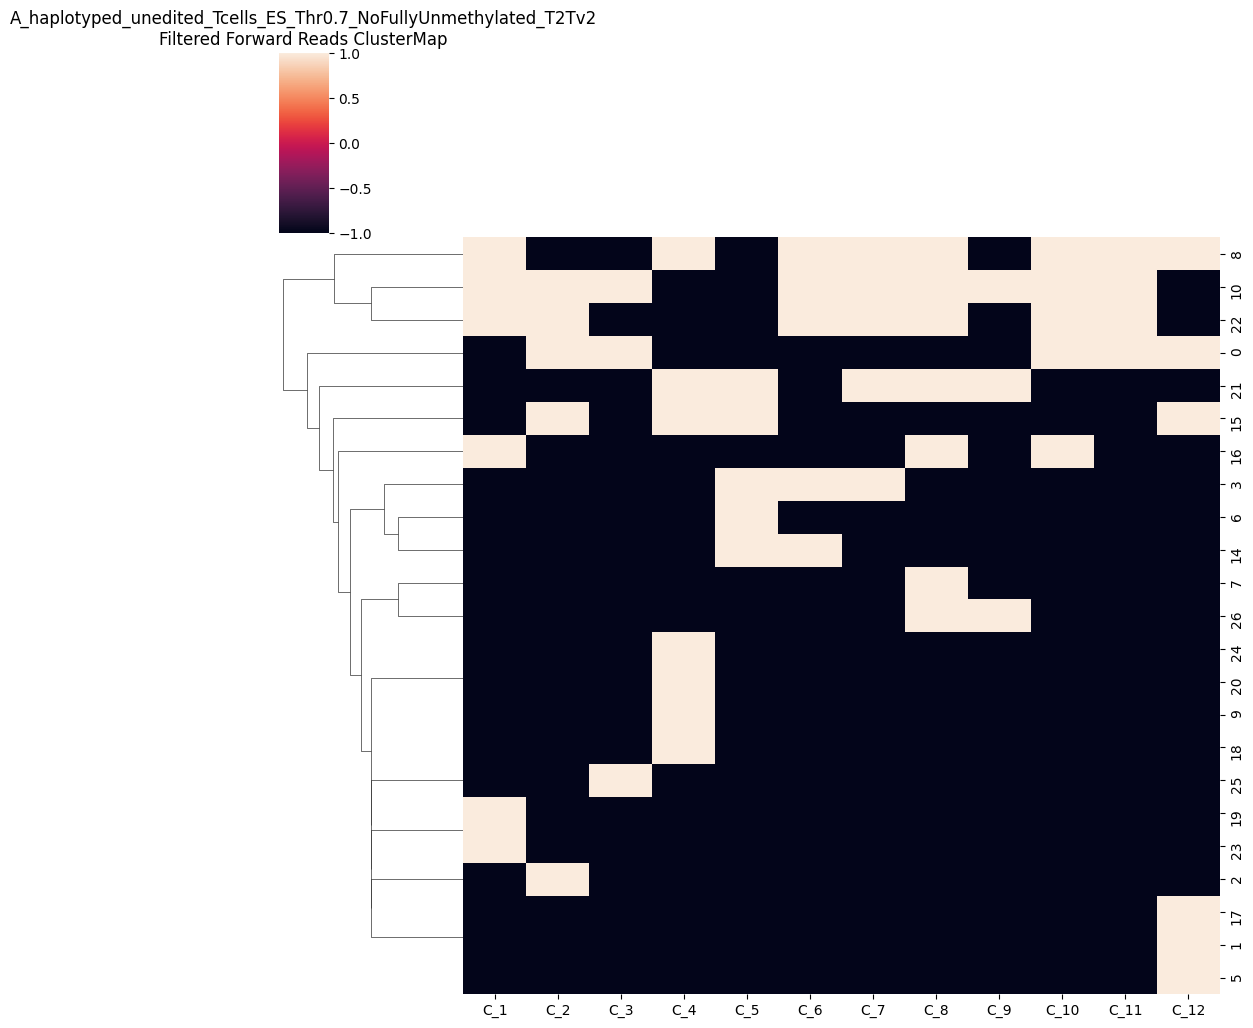

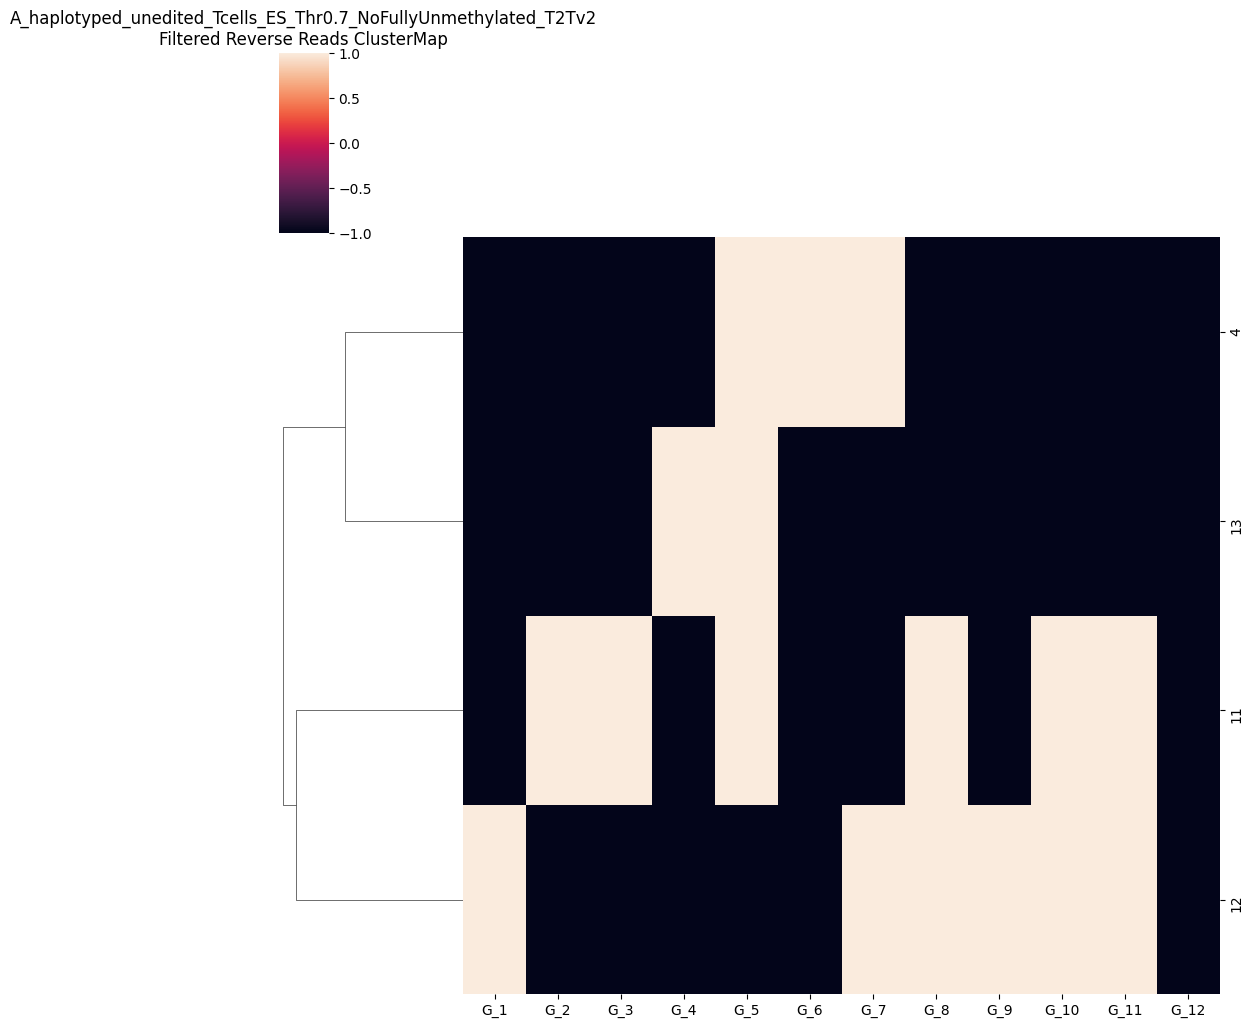

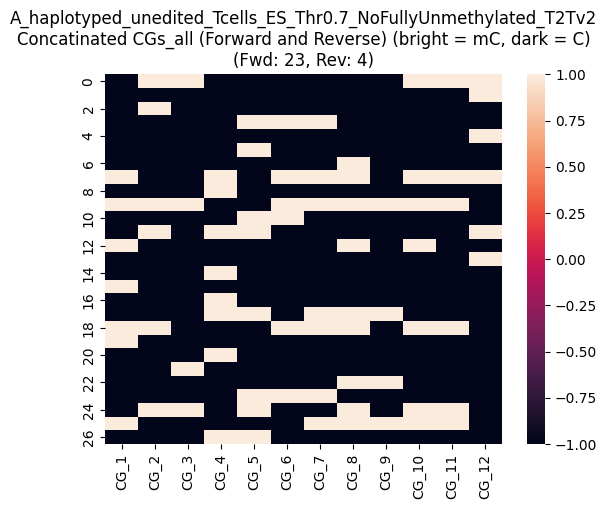

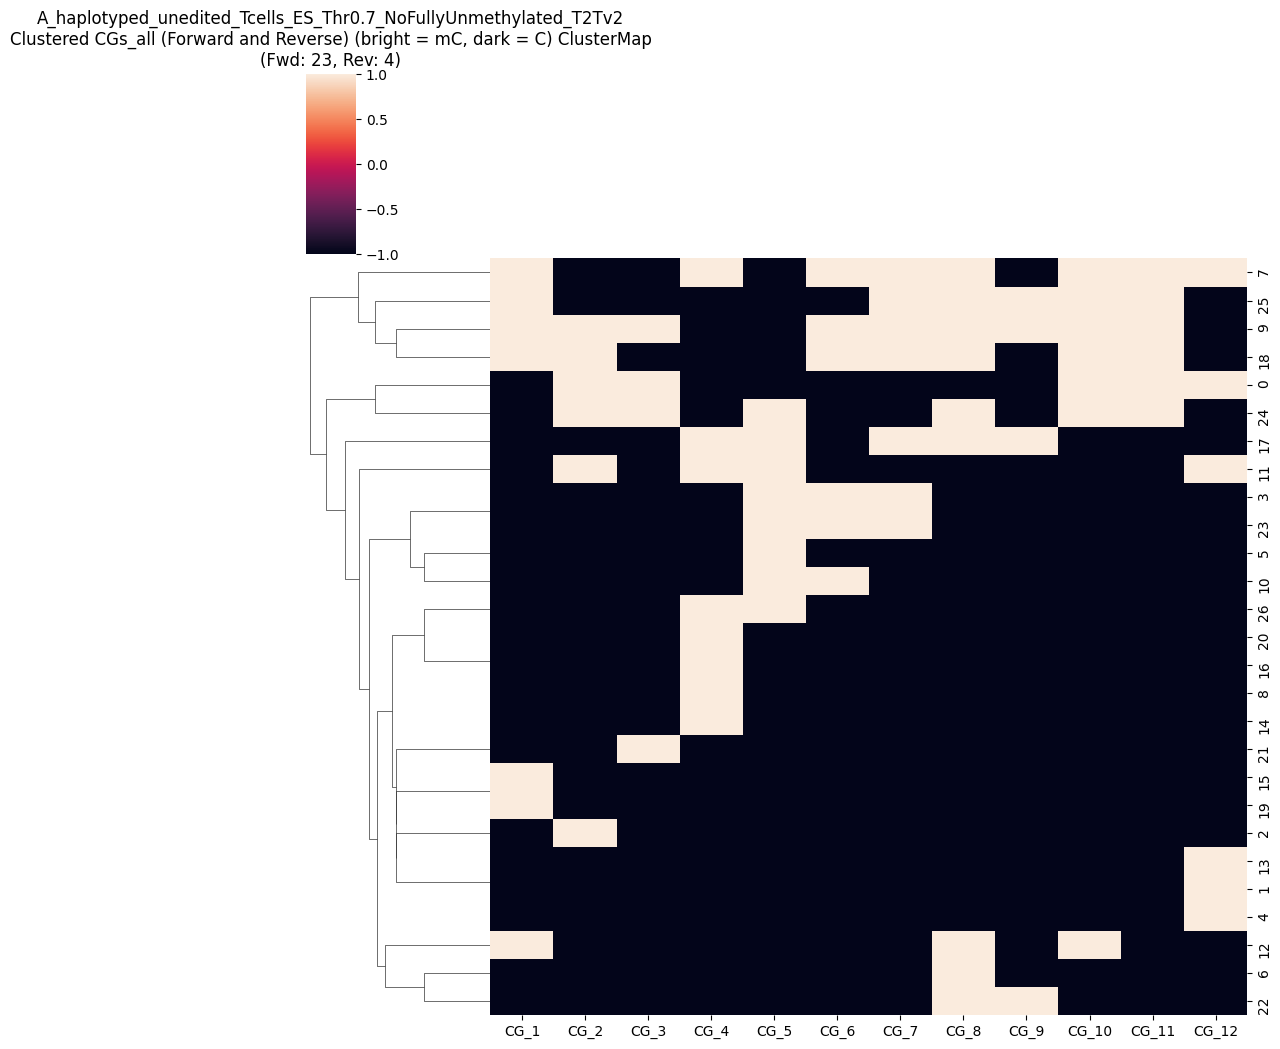

CGs_all saved as CG_12_units_combined_A_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD23_numRVS4_padded_reads_A_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrE…

          |    0%

          | Transferring 1235 from reads.CG,0.txt into reads.combined_basemods.h5, new size 1235   0% | 00:00<…

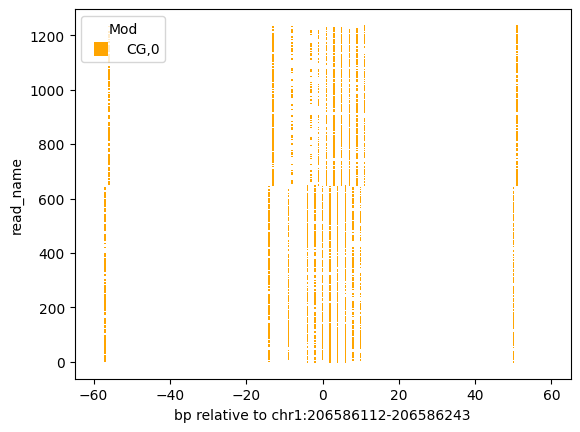

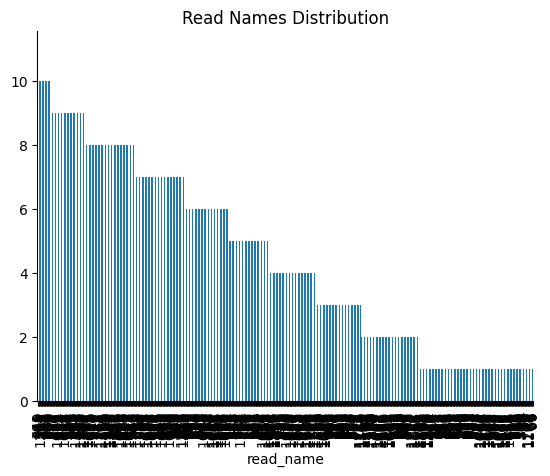

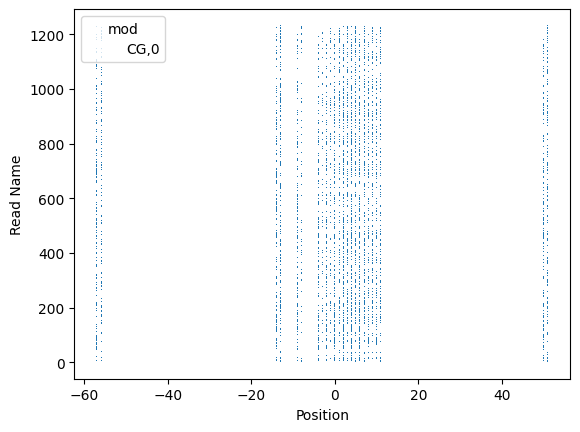

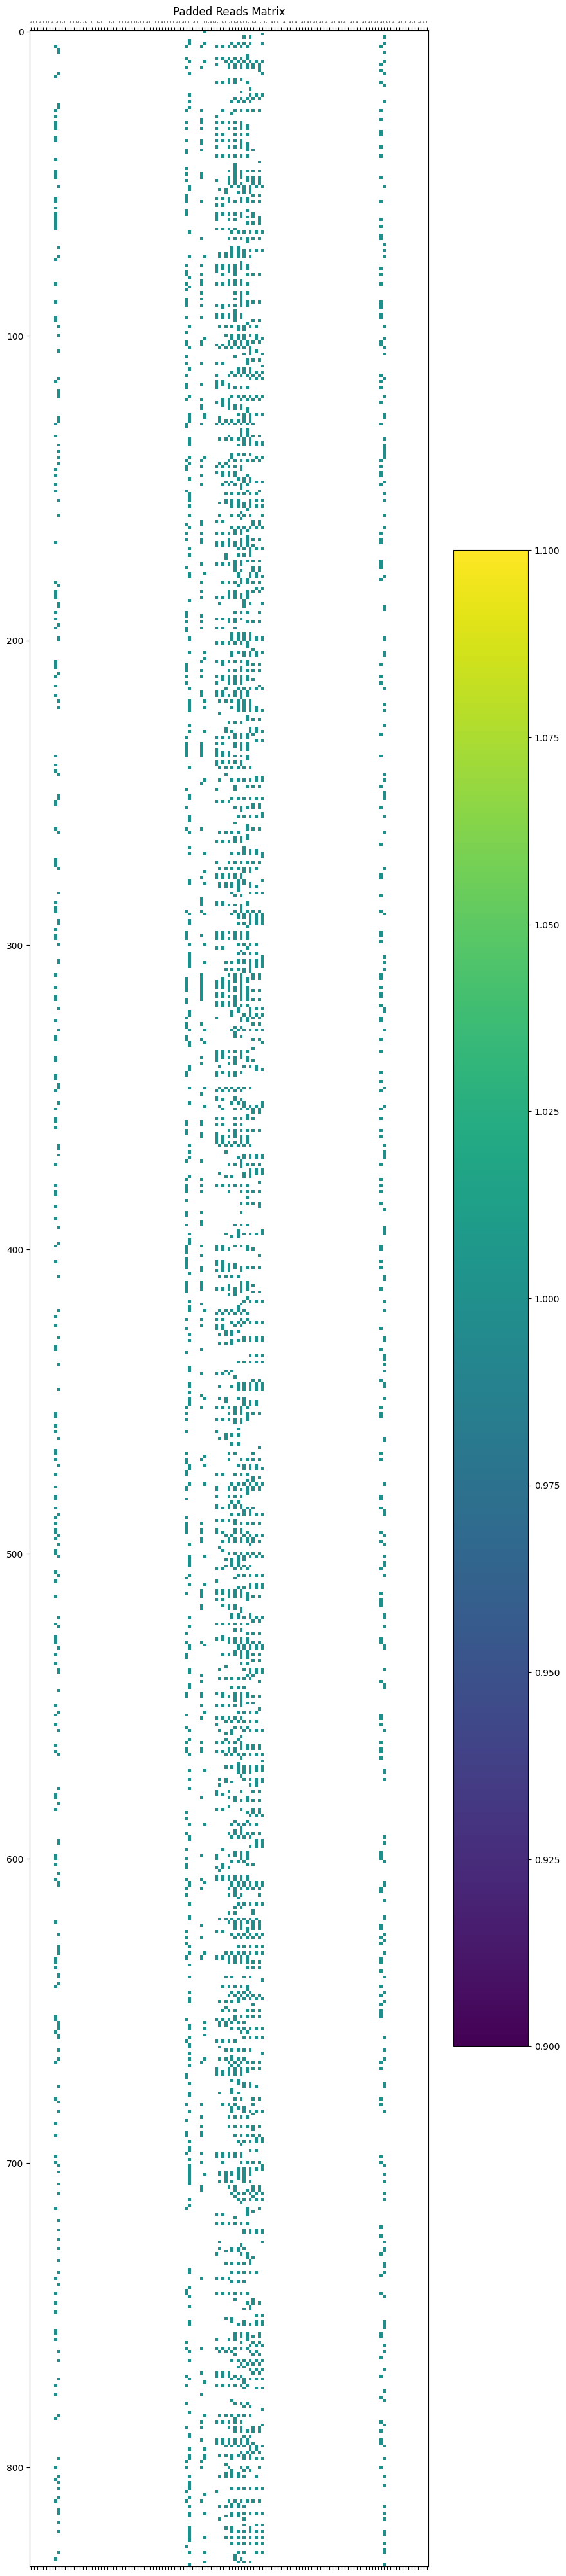

Padded reads saved to padded_reads_T_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy
Padded reads loaded successfully.


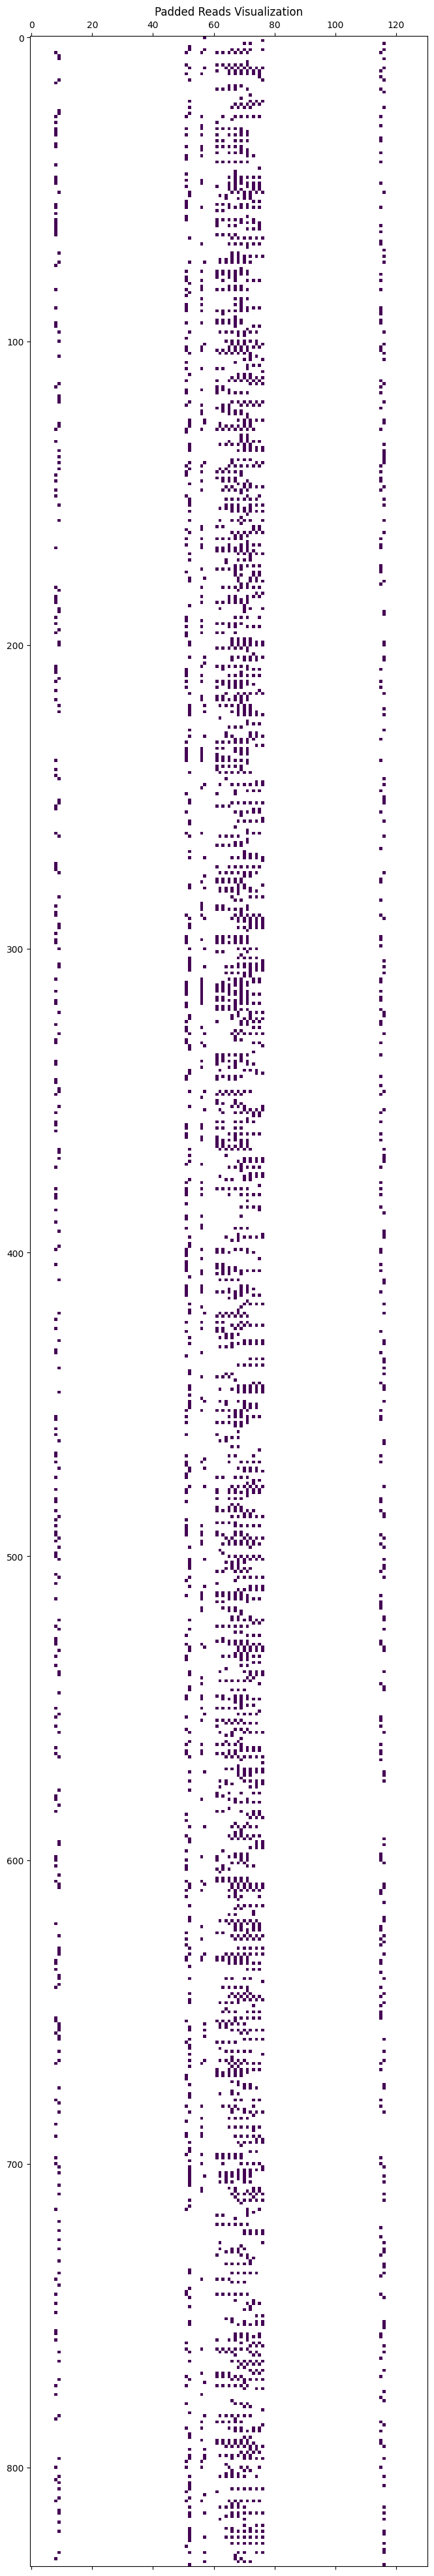

Visualization completed.
Region length: 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [9, 52, 57, 62, 64, 66, 68, 70, 72, 74, 76, 116]
CG_1 at index 9 has genomic coordinate: chr1:206586121
CG_2 at index 52 has genomic coordinate: chr1:206586164
CG_3 at index 57 has genomic coordinate: chr1:206586169
CG_4 at index 62 has genomic coordinate: chr1:206586174
CG_5 at index 64 has genomic coordinate: chr1:206586176
CG_6 at index 66 has genomic coordinate: chr1:206586178
CG_7 at index 68 has genomic coordinate: chr1:206586180
CG_8 at index 70 has genomic coordinate: chr1:206586182
CG_9 at index 72 has genomic coordinate: chr1:206586184
CG_10 at index 74 has genomic coordinate: chr1:206586186
CG_11 at index 76 has genomic coordinate: chr1:206586188
CG_12 at index 116 has genomic coordinate: chr1:206586228
CG_info_df     Po

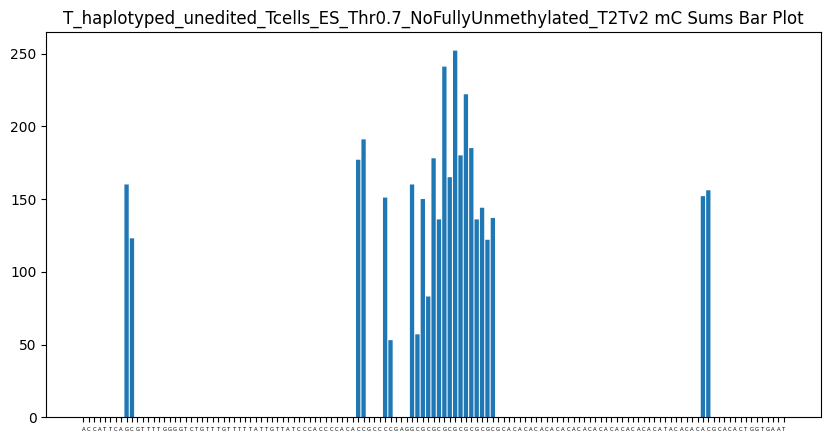

(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.19207683 0.14765906 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21248499 0.22929172 0.
 0.         0.         0.18127251 0.06362545 0.         0.
 0.         0.19207683 0.06842737 0.18007203 0.09963986 0.21368547
 0.16326531 0.28931573 0.19807923 0.30252101 0.21608643 0.2665066
 0.22208884 0.16326531 0.17286915 0.14645858 0.16446579 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0. 

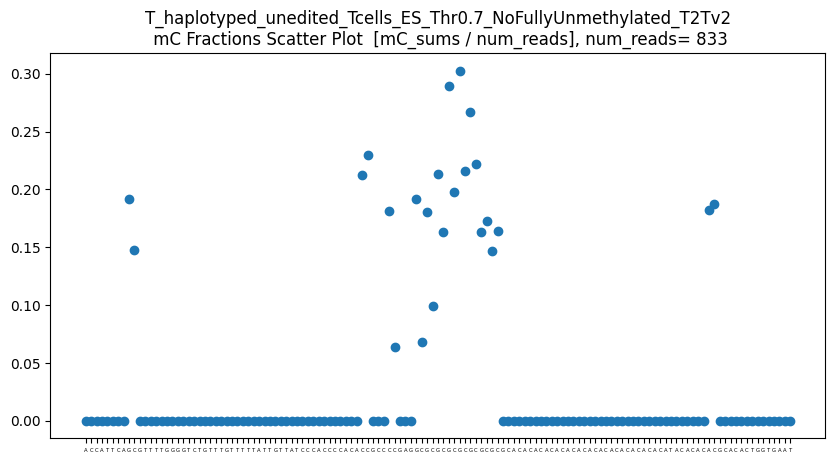

CGs_all_sums  = [283. 368. 204. 217. 233. 314. 406. 432. 407. 280. 259. 308.]


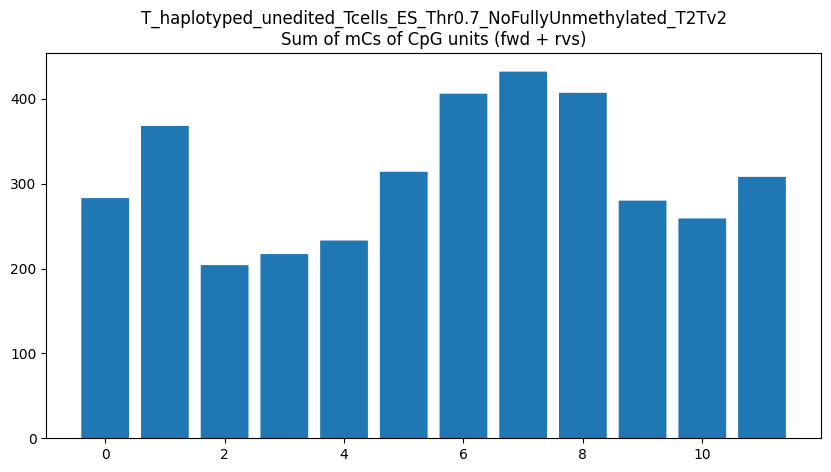

CGs_all_sums / len(CGs_all) = [0.33973589 0.44177671 0.24489796 0.2605042  0.27971188 0.37695078
 0.48739496 0.51860744 0.48859544 0.33613445 0.31092437 0.3697479 ]


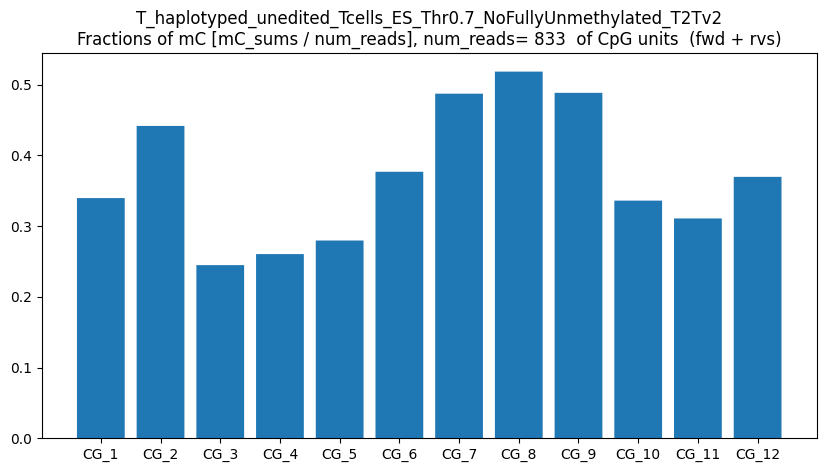

CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0.   0. 283.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 368.   0.   0.   0.
   0. 204.   0.   0.   0.   0. 217.   0. 233.   0. 314.   0. 406.   0.
 432.   0. 407.   0. 280.   0. 259.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 308.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


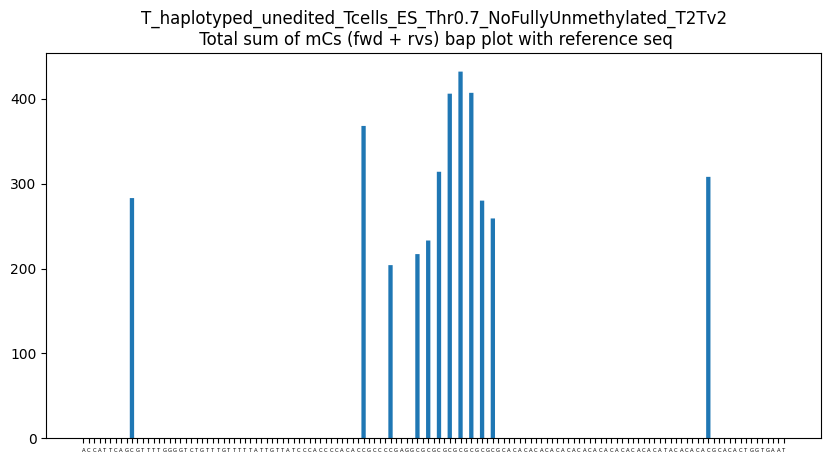

len(CGs_all) = 833
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.33973589 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.44177671 0.
 0.         0.         0.         0.24489796 0.         0.
 0.         0.         0.2605042  0.         0.27971188 0.
 0.37695078 0.         0.48739496 0.         0.51860744 0.
 0.48859544 0.         0.33613445 0.         0.31092437 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

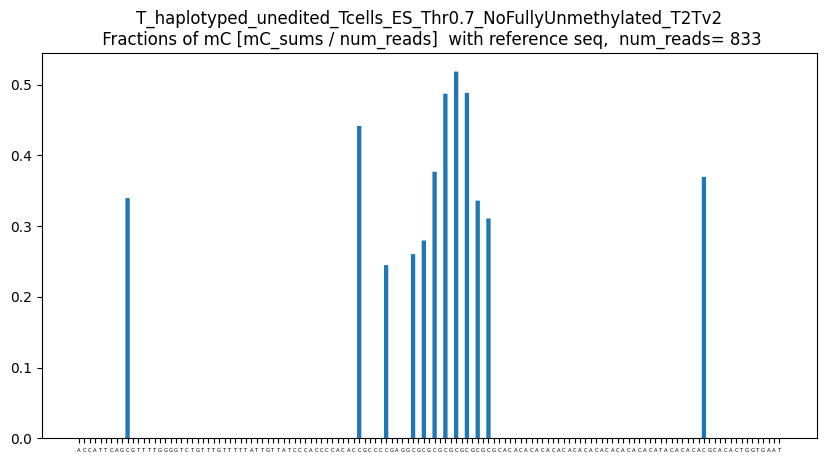

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


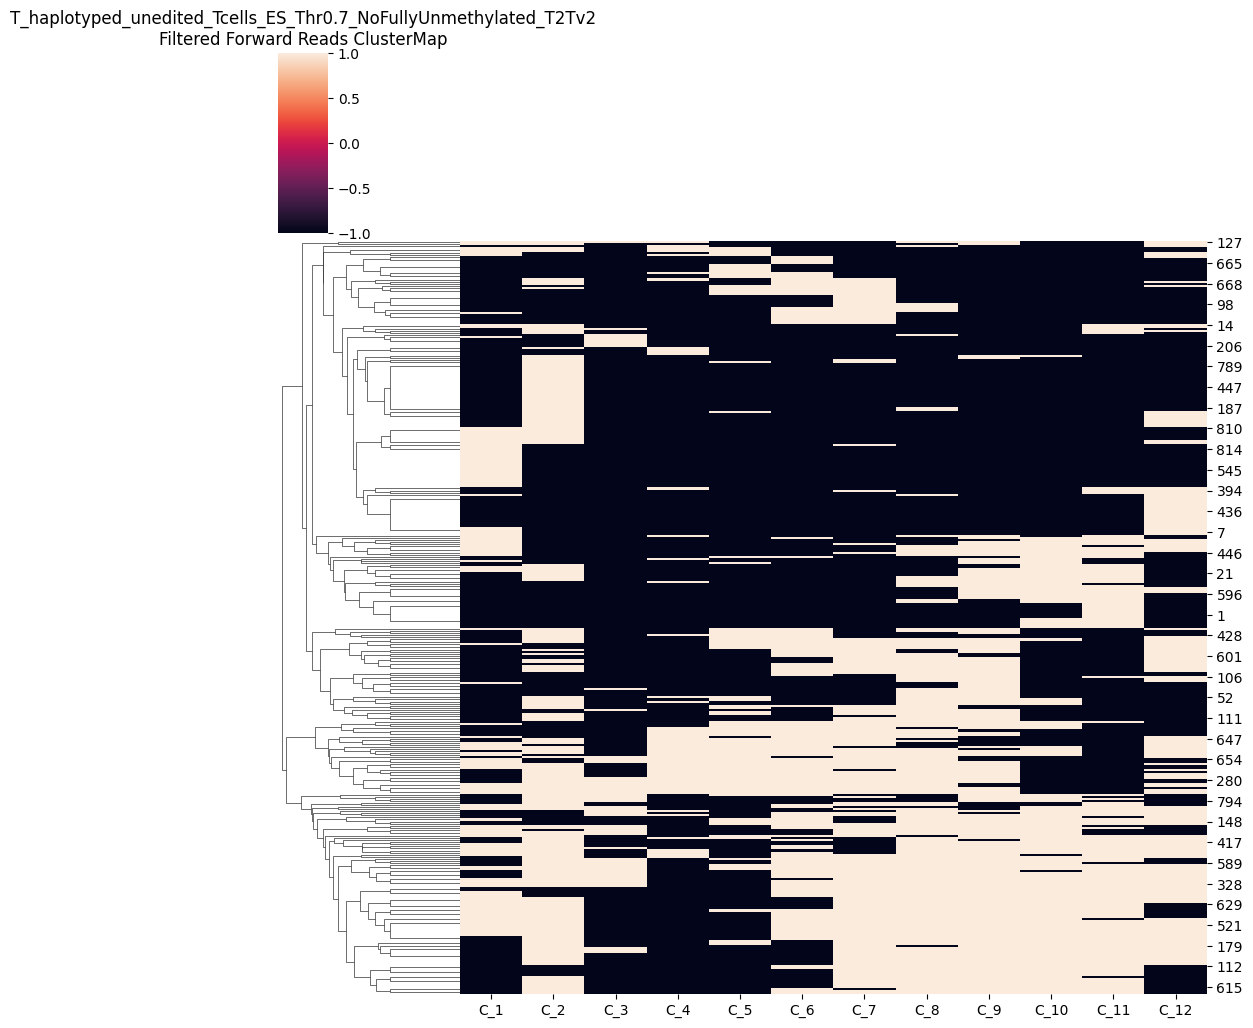

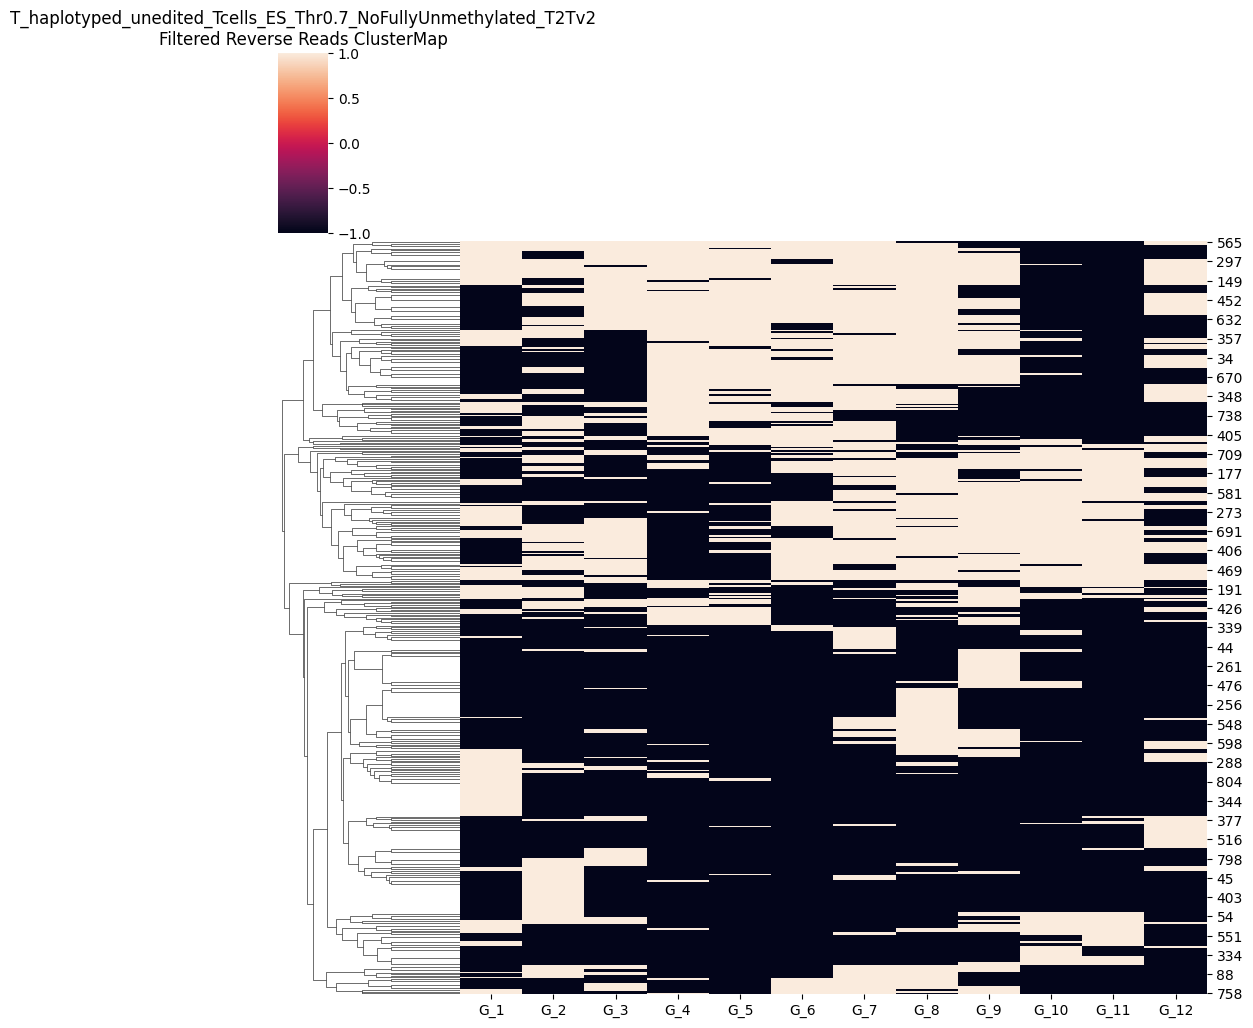

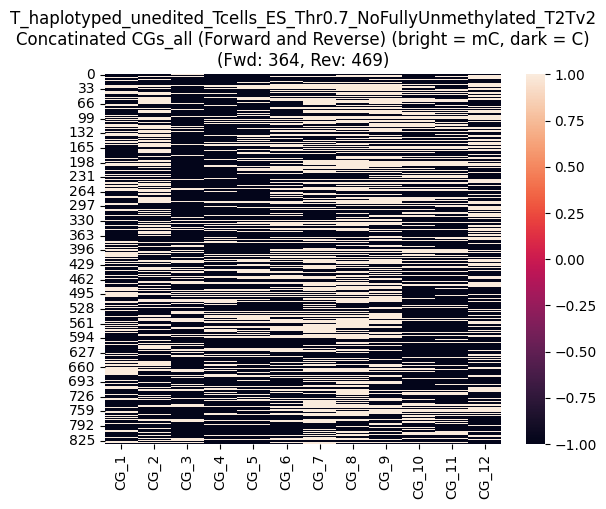

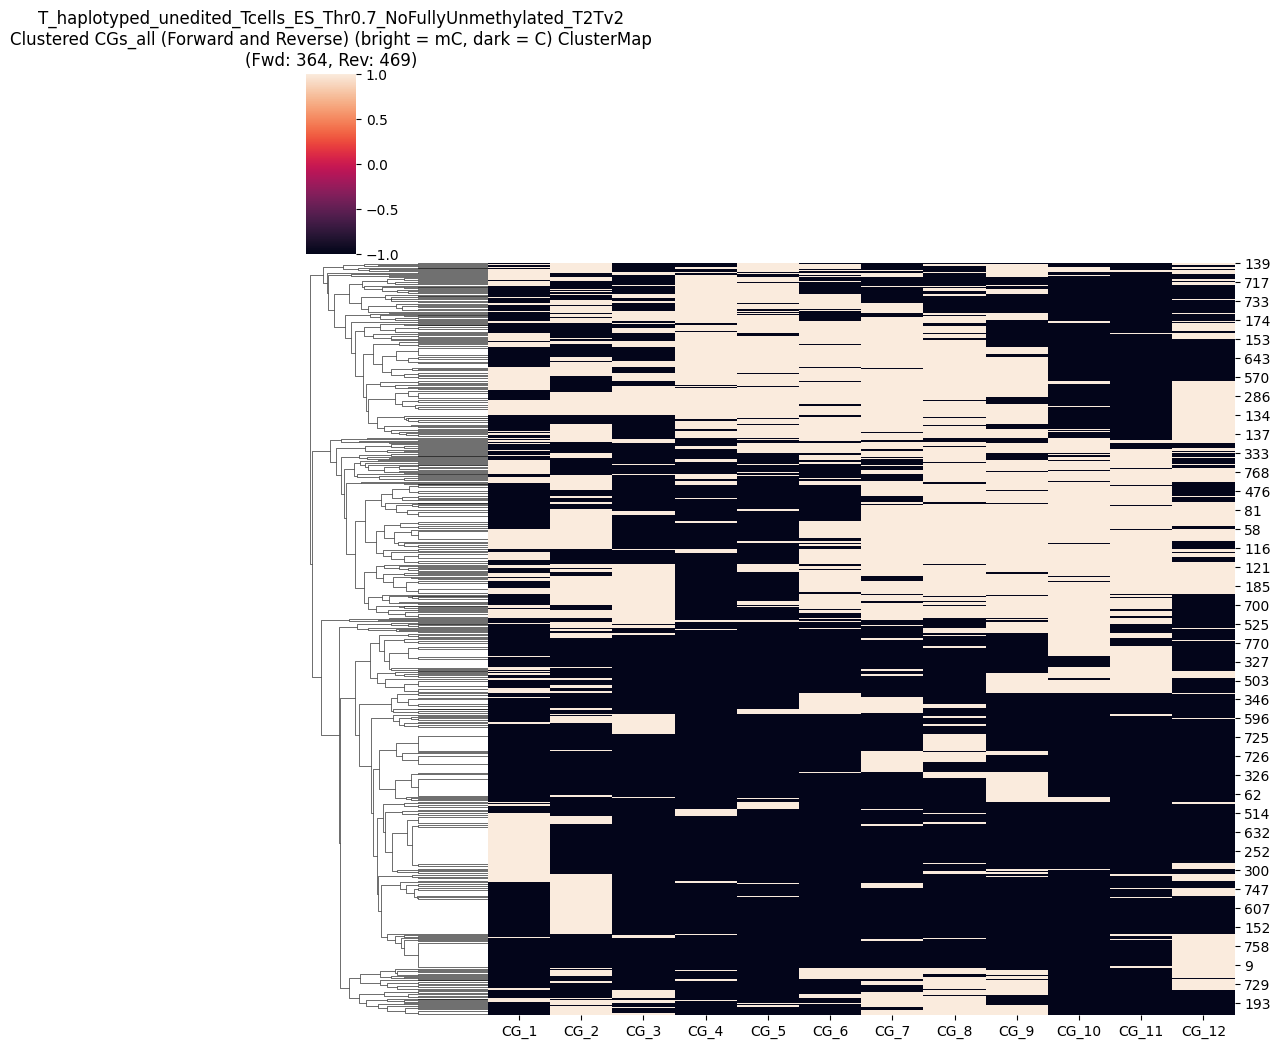

CGs_all saved as CG_12_units_combined_T_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD364_numRVS469_padded_reads_T_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrE…

          |    0%

          | Transferring 1405 from reads.CG,0.txt into reads.combined_basemods.h5, new size 1405   0% | 00:00<…

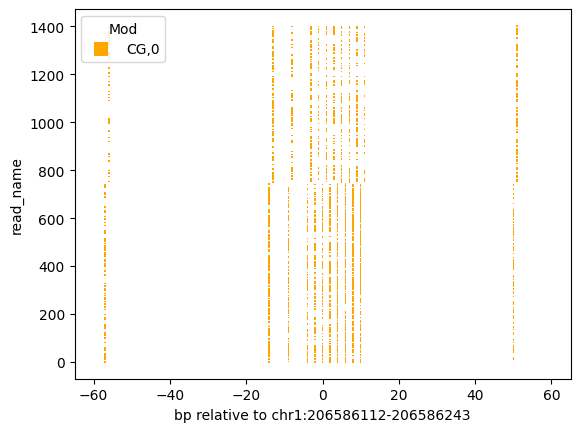

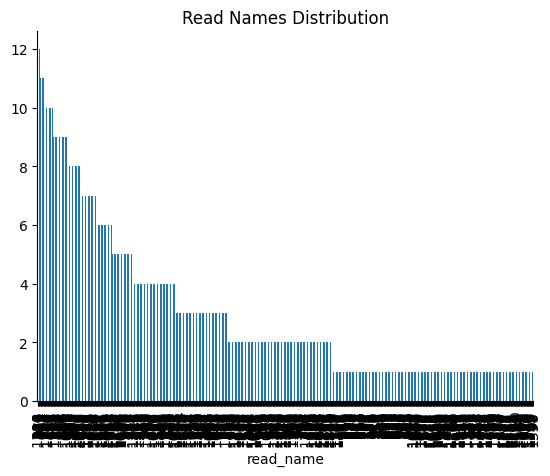

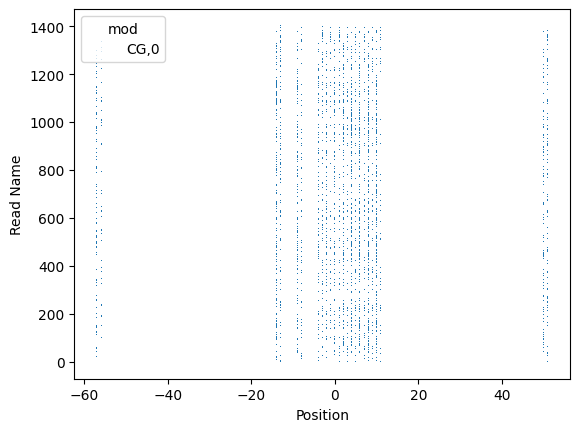

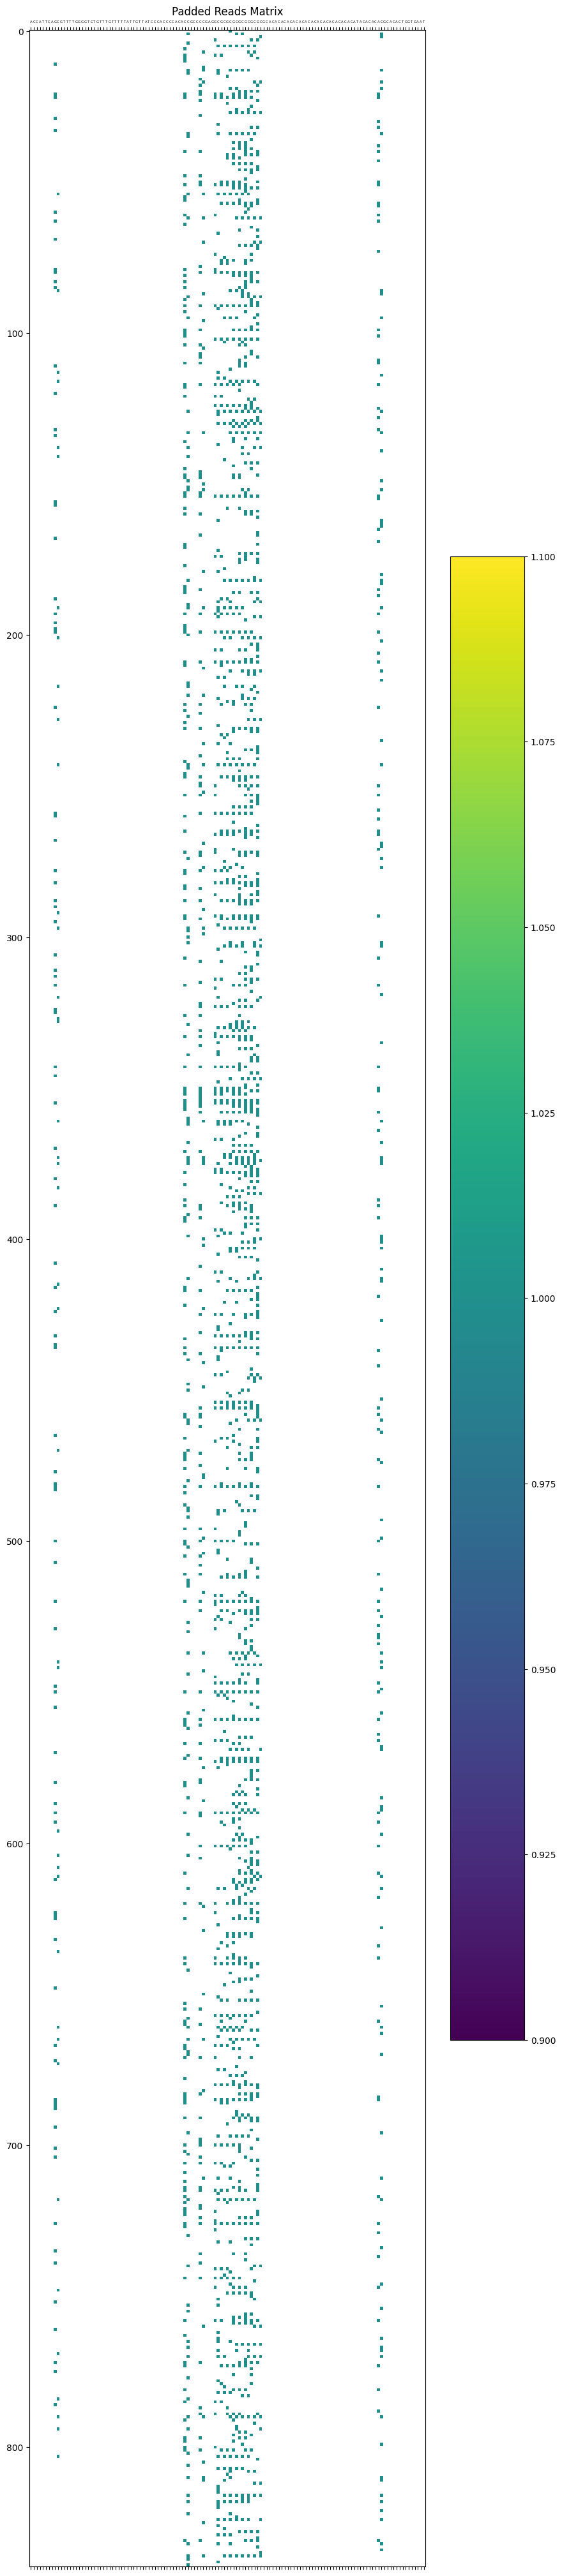

Padded reads saved to padded_reads_C_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy
Padded reads loaded successfully.


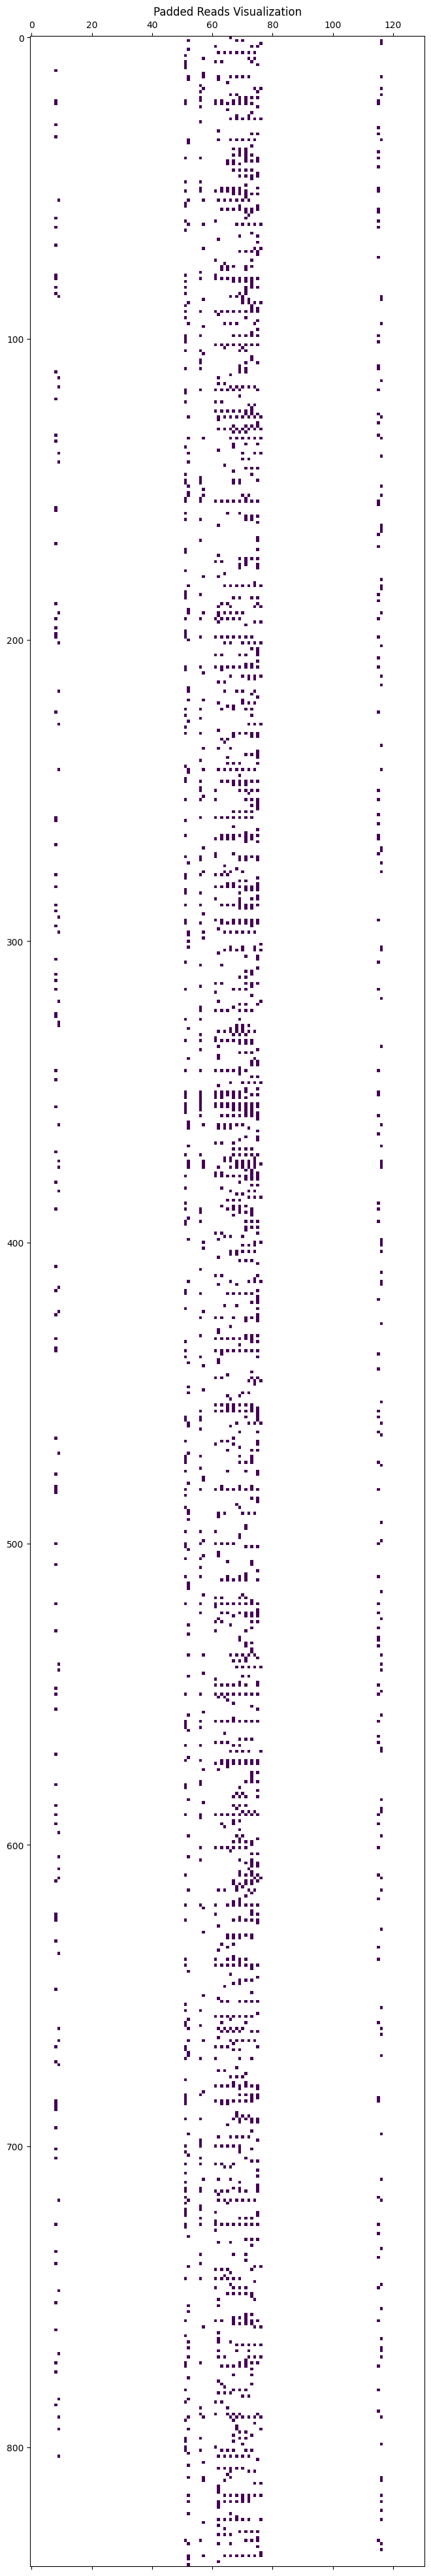

Visualization completed.
Region length: 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [9, 52, 57, 62, 64, 66, 68, 70, 72, 74, 76, 116]
CG_1 at index 9 has genomic coordinate: chr1:206586121
CG_2 at index 52 has genomic coordinate: chr1:206586164
CG_3 at index 57 has genomic coordinate: chr1:206586169
CG_4 at index 62 has genomic coordinate: chr1:206586174
CG_5 at index 64 has genomic coordinate: chr1:206586176
CG_6 at index 66 has genomic coordinate: chr1:206586178
CG_7 at index 68 has genomic coordinate: chr1:206586180
CG_8 at index 70 has genomic coordinate: chr1:206586182
CG_9 at index 72 has genomic coordinate: chr1:206586184
CG_10 at index 74 has genomic coordinate: chr1:206586186
CG_11 at index 76 has genomic coordinate: chr1:206586188
CG_12 at index 116 has genomic coordinate: chr1:206586228
CG_info_df     Po

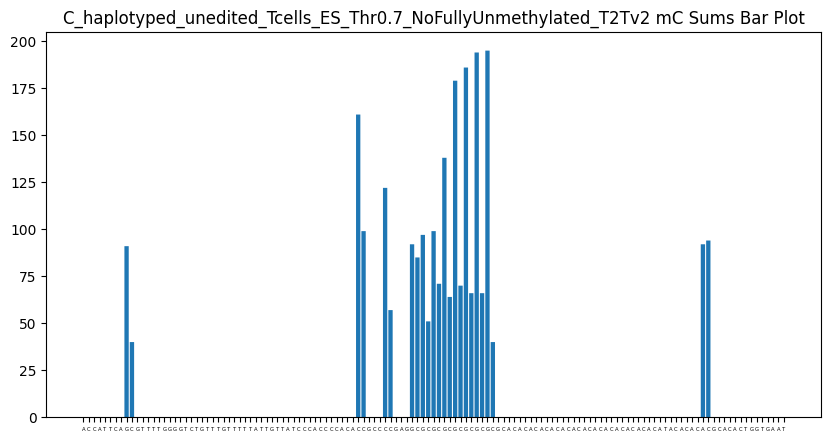

(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.10833333 0.04761905 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.19166667 0.11785714 0.
 0.         0.         0.1452381  0.06785714 0.         0.
 0.         0.10952381 0.10119048 0.11547619 0.06071429 0.11785714
 0.08452381 0.16428571 0.07619048 0.21309524 0.08333333 0.22142857
 0.07857143 0.23095238 0.07857143 0.23214286 0.04761905 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

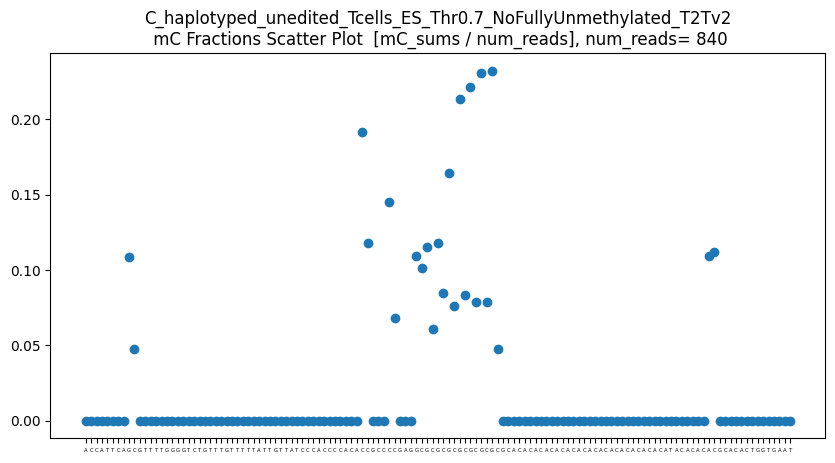

CGs_all_sums  = [131. 260. 179. 177. 148. 170. 202. 249. 252. 260. 235. 186.]


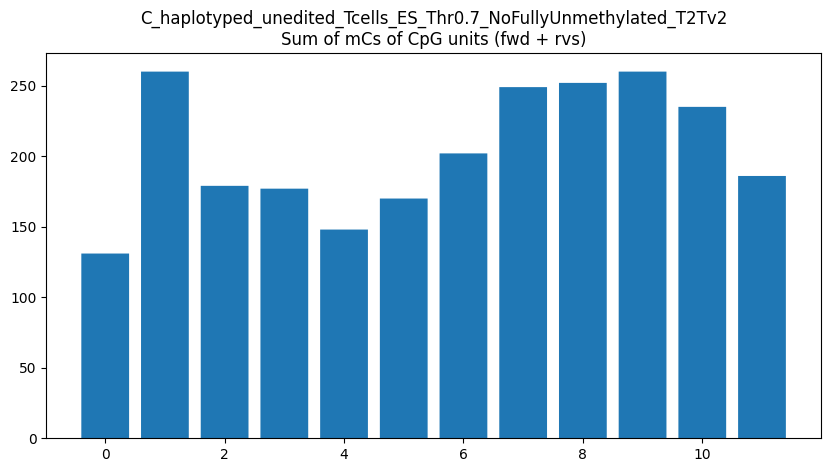

CGs_all_sums / len(CGs_all) = [0.15595238 0.30952381 0.21309524 0.21071429 0.17619048 0.20238095
 0.24047619 0.29642857 0.3        0.30952381 0.2797619  0.22142857]


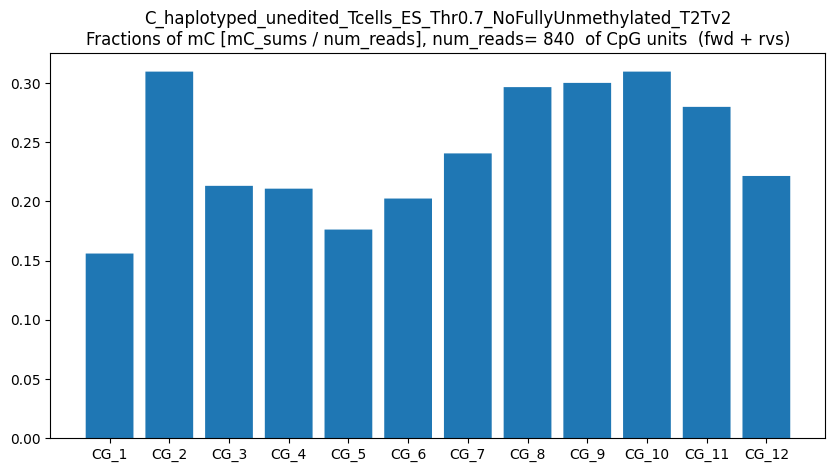

CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0.   0. 131.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 260.   0.   0.   0.
   0. 179.   0.   0.   0.   0. 177.   0. 148.   0. 170.   0. 202.   0.
 249.   0. 252.   0. 260.   0. 235.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 186.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


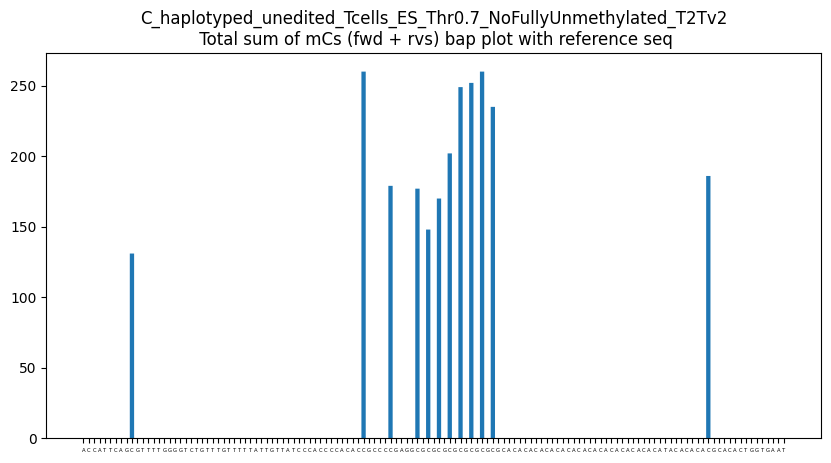

len(CGs_all) = 840
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.15595238 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.30952381 0.
 0.         0.         0.         0.21309524 0.         0.
 0.         0.         0.21071429 0.         0.17619048 0.
 0.20238095 0.         0.24047619 0.         0.29642857 0.
 0.3        0.         0.30952381 0.         0.2797619  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

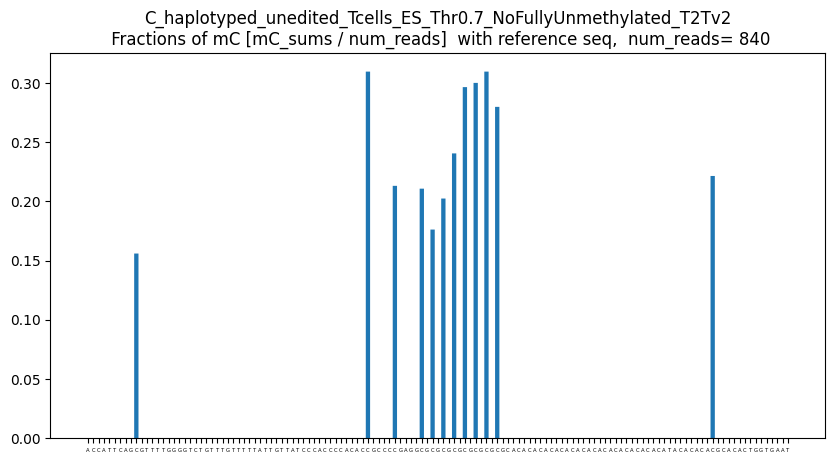

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


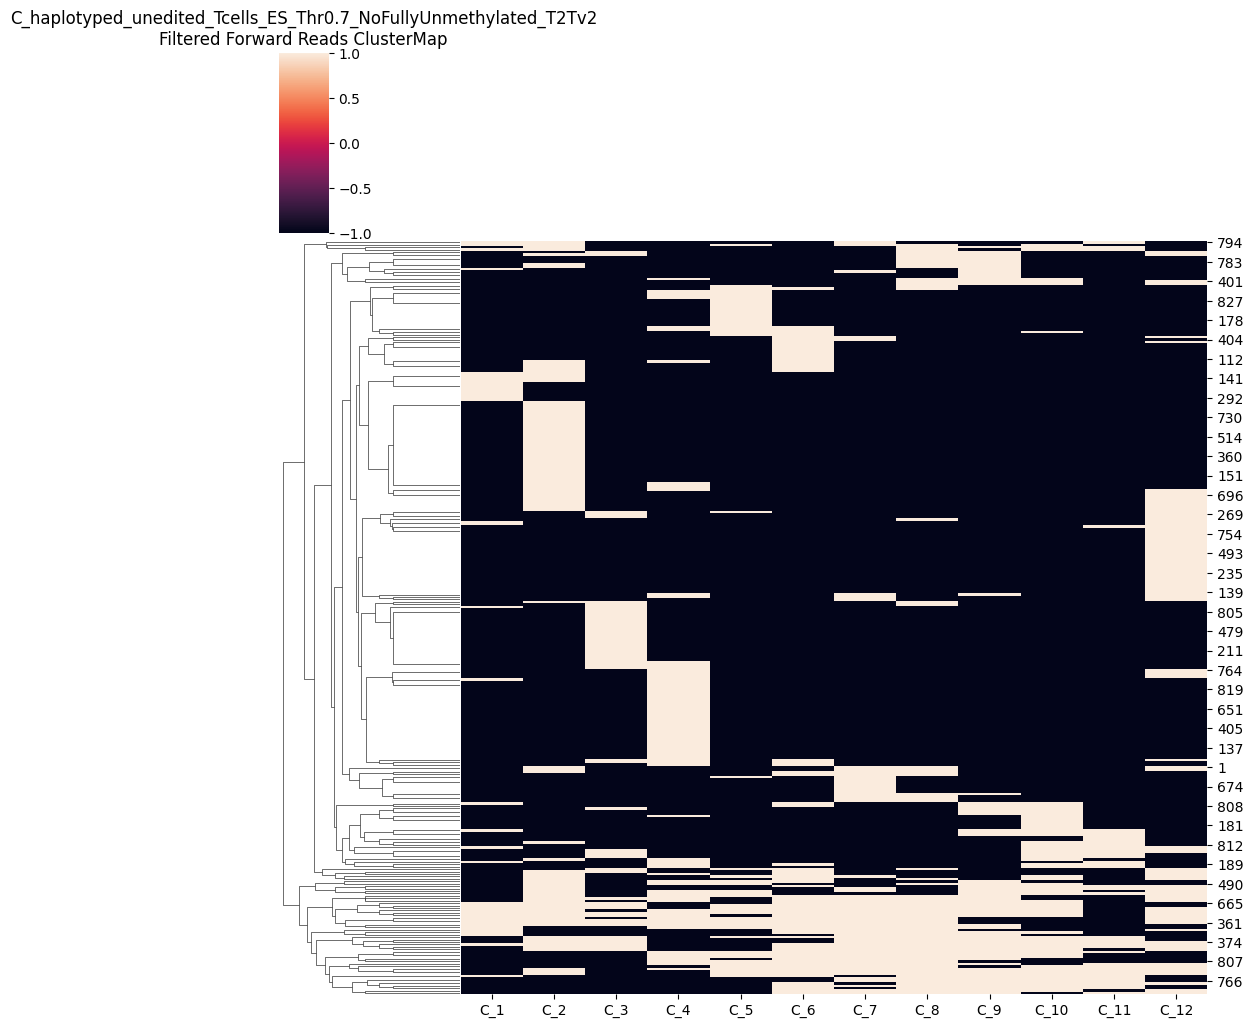

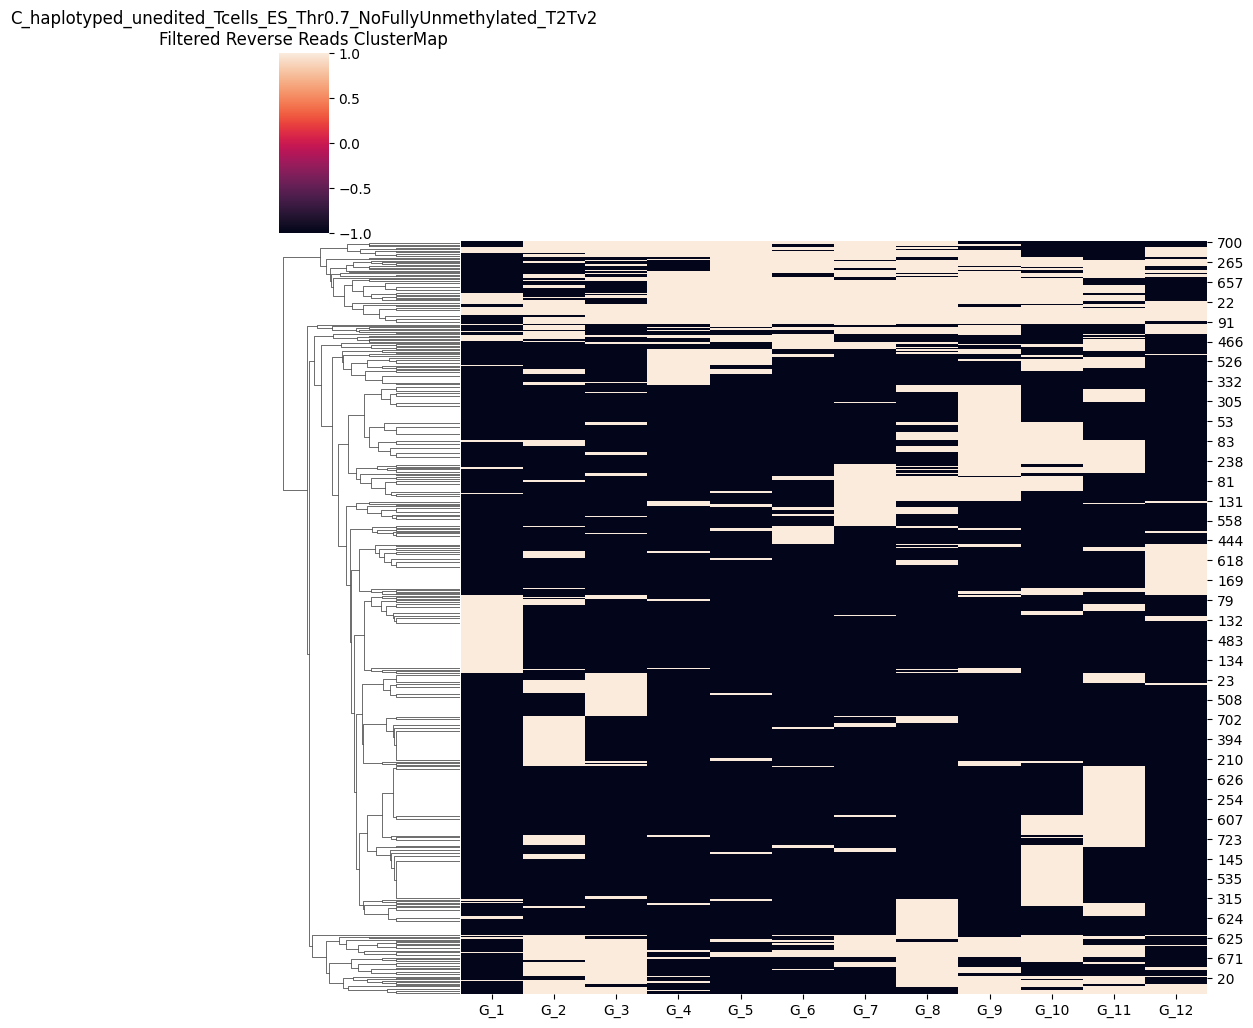

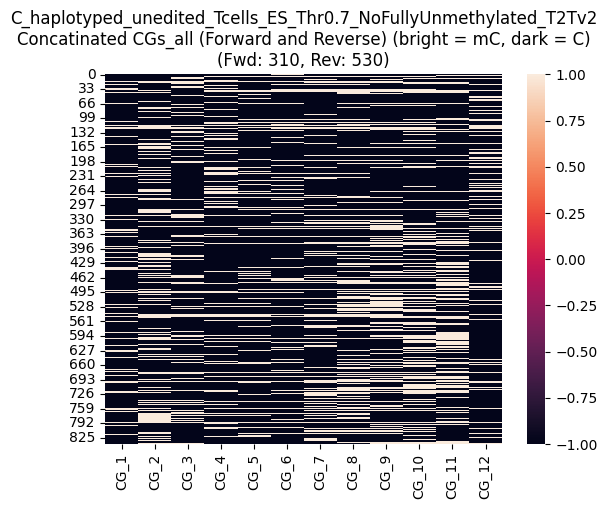

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



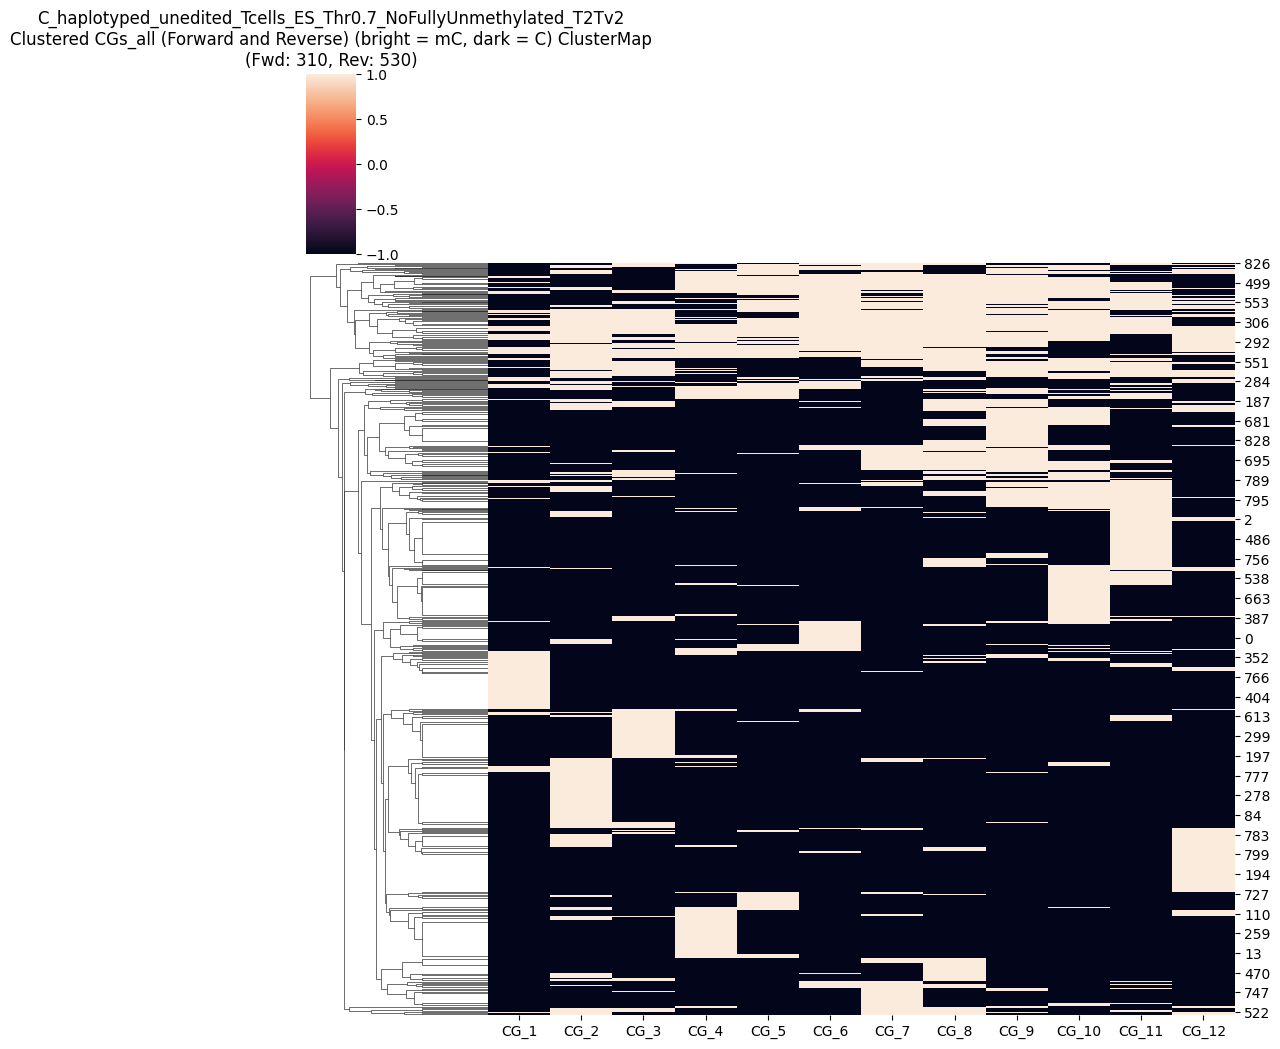

CGs_all saved as CG_12_units_combined_C_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD310_numRVS530_padded_reads_C_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrE…

          |    0%

          | Transferring 4 from reads.CG,0.txt into reads.combined_basemods.h5, new size 4   0% | 00:00<?

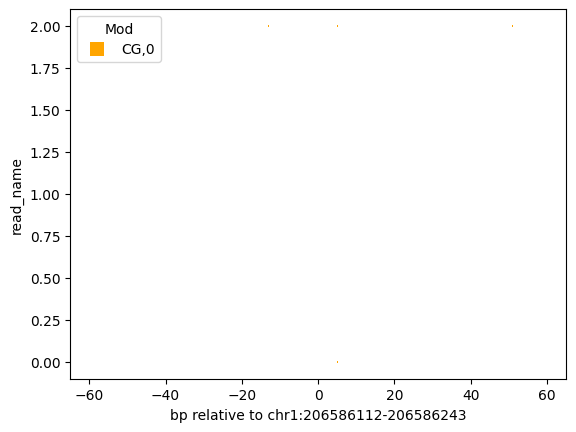

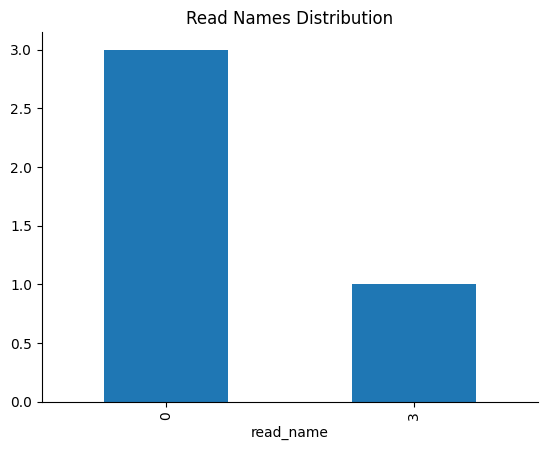

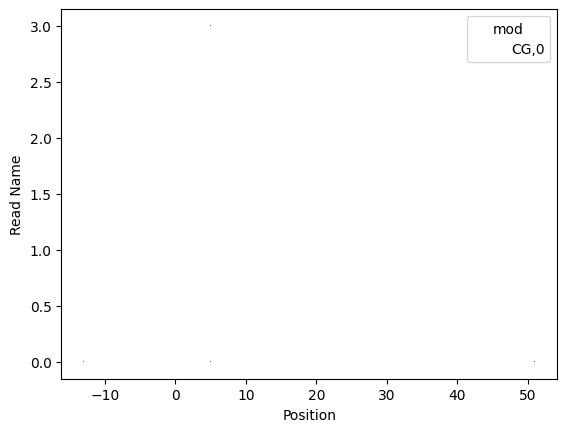

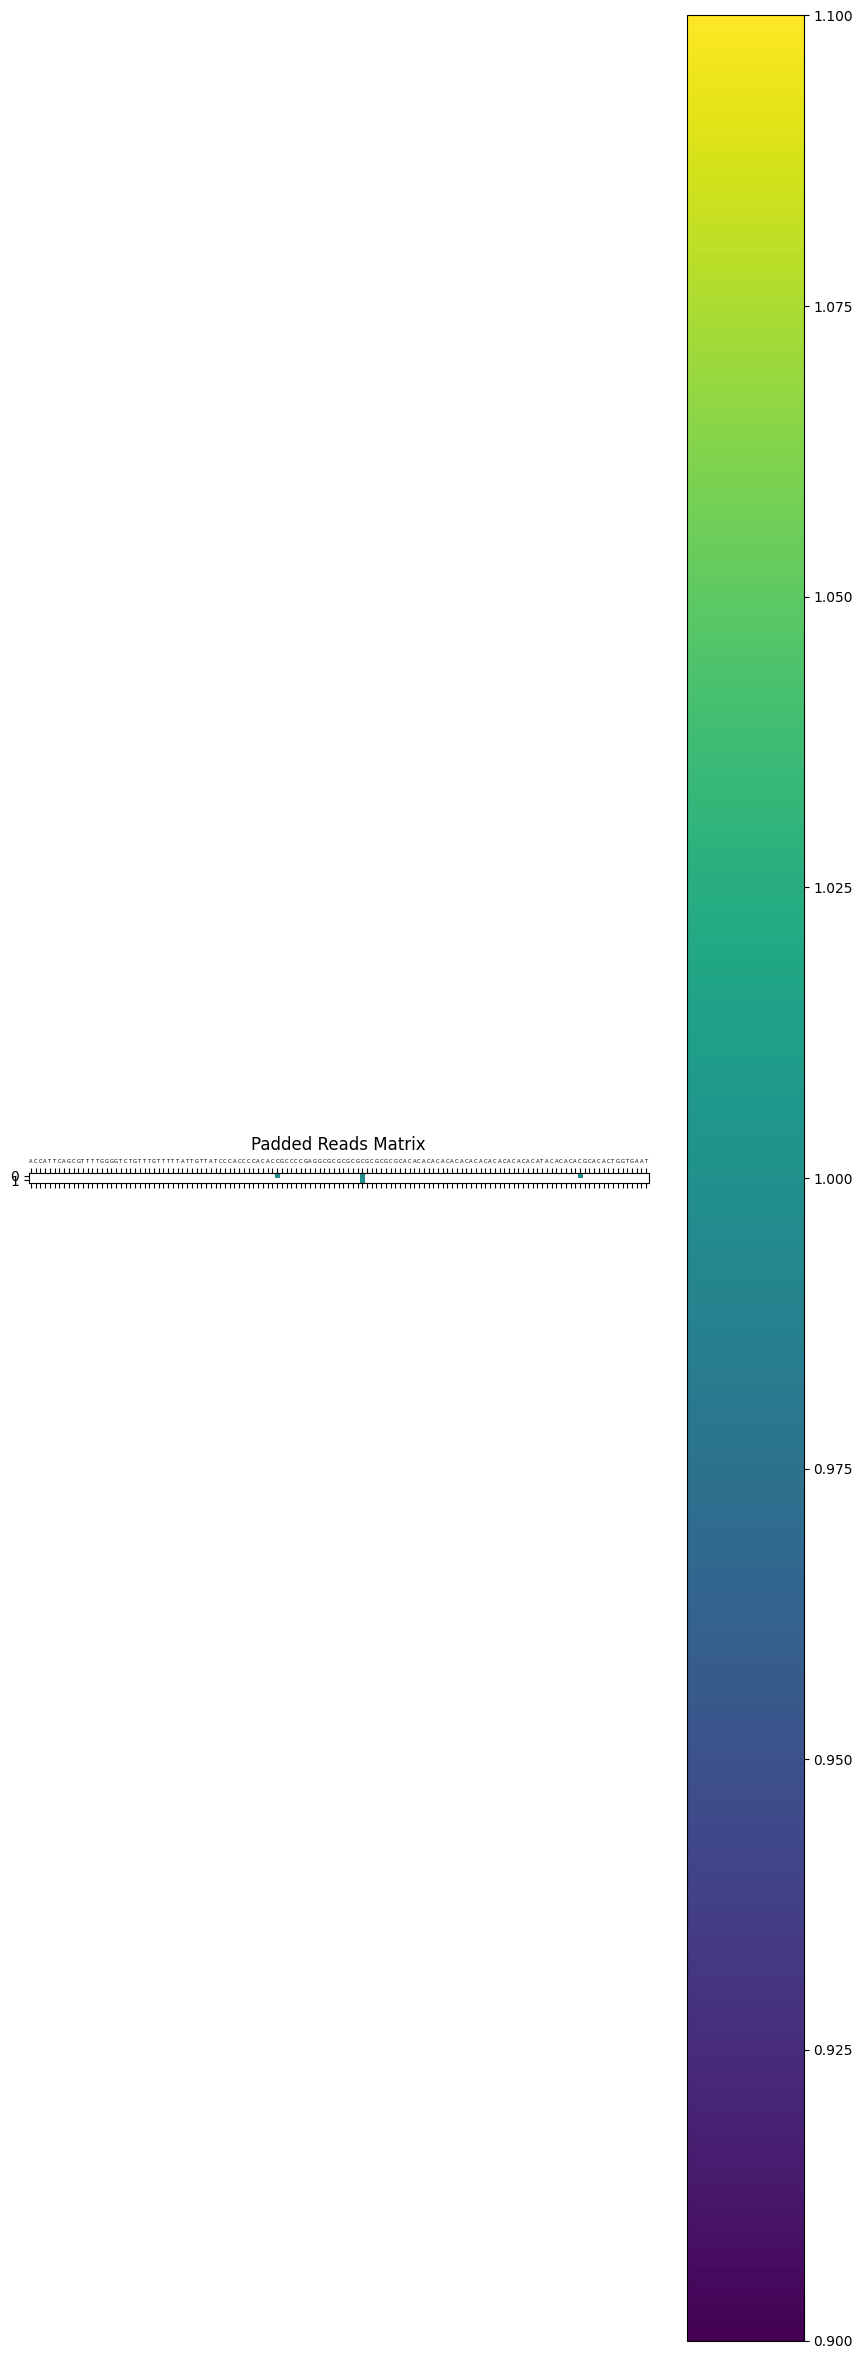

Padded reads saved to padded_reads_G_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy
Padded reads loaded successfully.


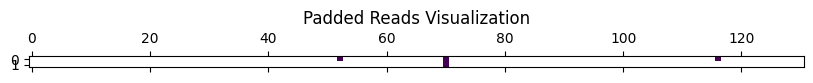

Visualization completed.
Region length: 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [9, 52, 57, 62, 64, 66, 68, 70, 72, 74, 76, 116]
CG_1 at index 9 has genomic coordinate: chr1:206586121
CG_2 at index 52 has genomic coordinate: chr1:206586164
CG_3 at index 57 has genomic coordinate: chr1:206586169
CG_4 at index 62 has genomic coordinate: chr1:206586174
CG_5 at index 64 has genomic coordinate: chr1:206586176
CG_6 at index 66 has genomic coordinate: chr1:206586178
CG_7 at index 68 has genomic coordinate: chr1:206586180
CG_8 at index 70 has genomic coordinate: chr1:206586182
CG_9 at index 72 has genomic coordinate: chr1:206586184
CG_10 at index 74 has genomic coordinate: chr1:206586186
CG_11 at index 76 has genomic coordinate: chr1:206586188
CG_12 at index 116 has genomic coordinate: chr1:206586228
CG_info_df     Po

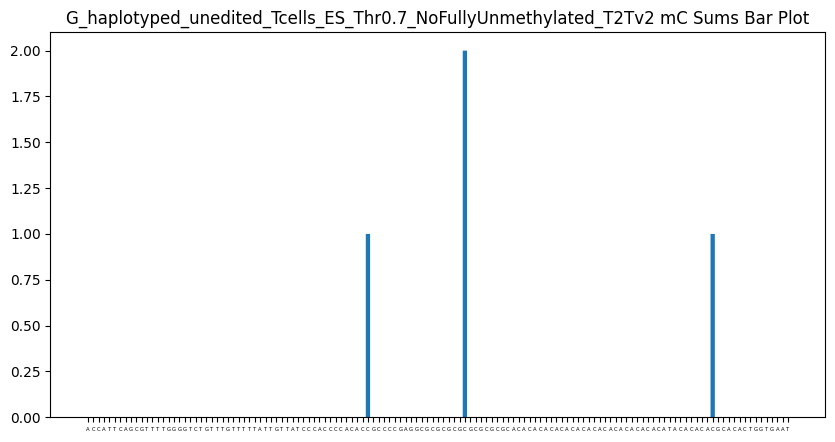

(mC_sums / len(CGs_all) = [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]


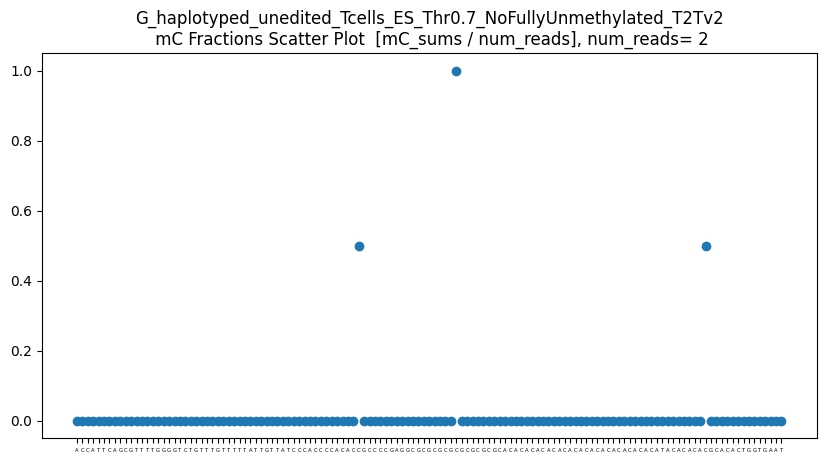

CGs_all_sums  = [0. 1. 0. 0. 0. 0. 0. 2. 0. 0. 0. 1.]


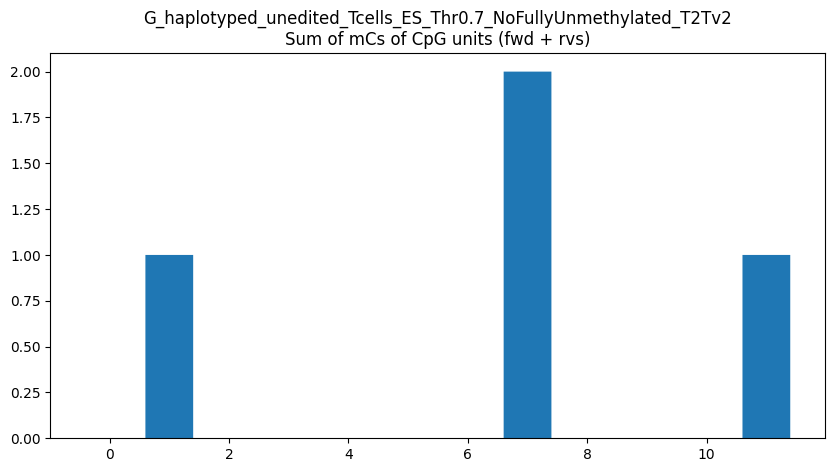

CGs_all_sums / len(CGs_all) = [0.  0.5 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.5]


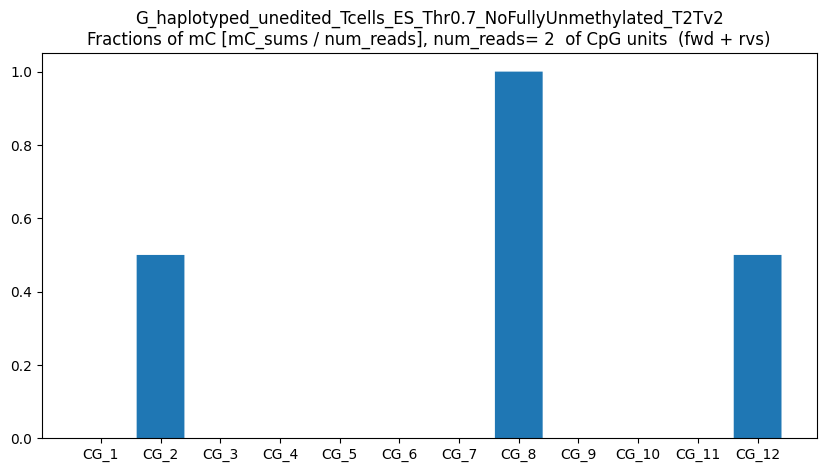

CGs_all_on_fwd_C_sums = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


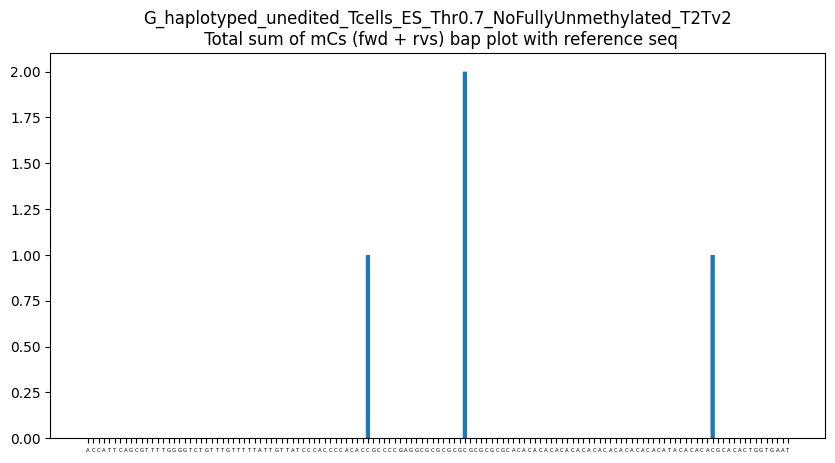

len(CGs_all) = 2
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]


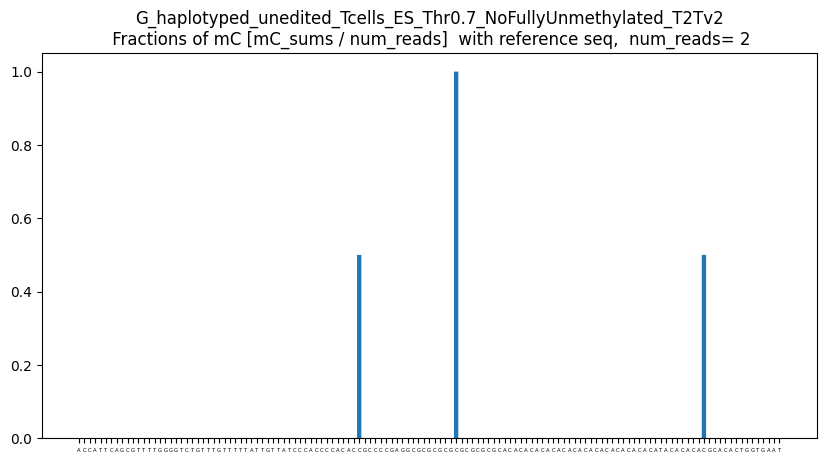

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


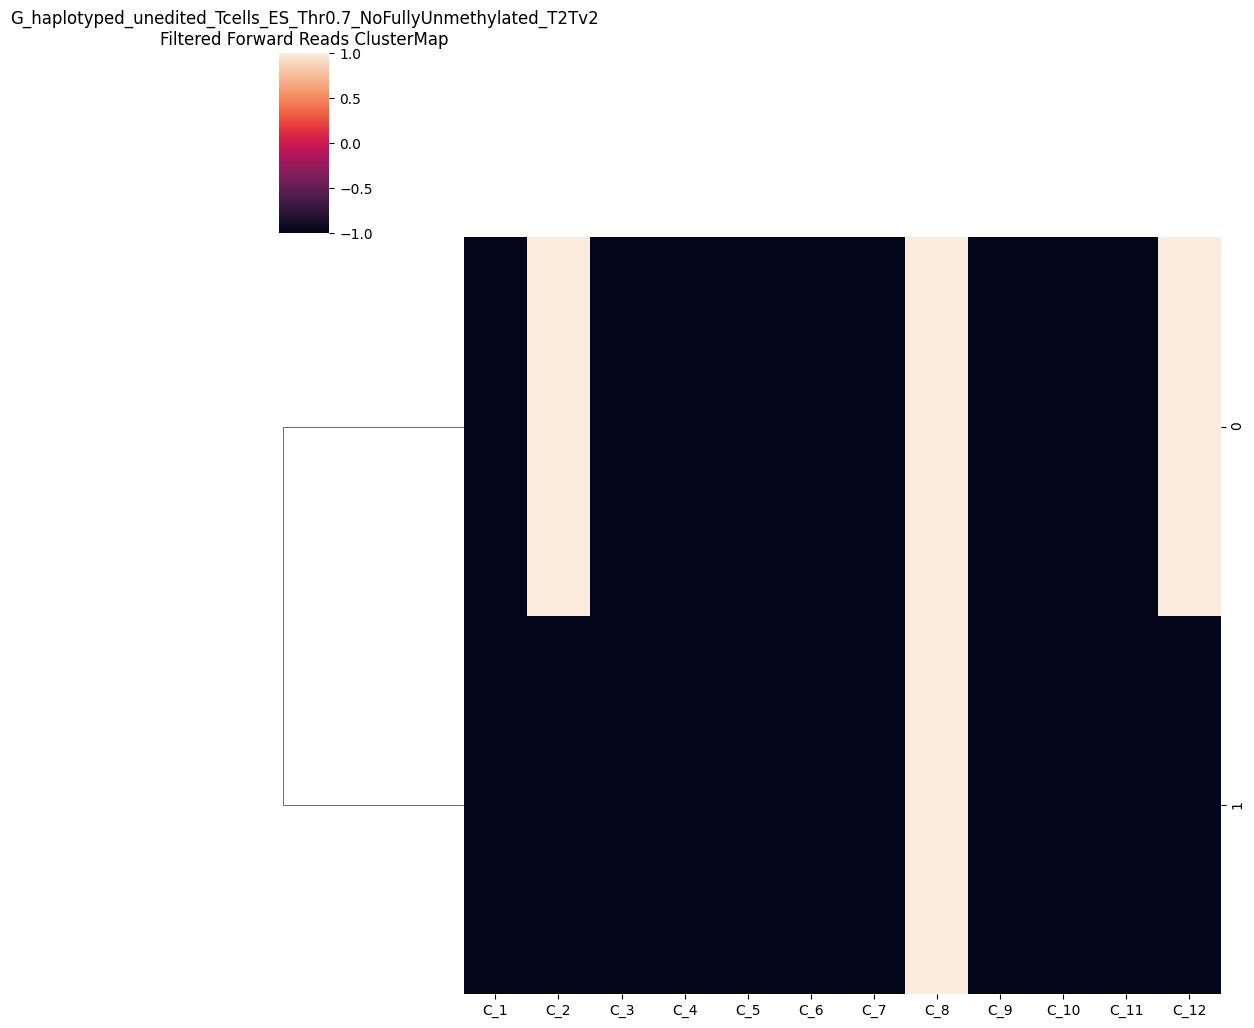

Error visualizing CGs_all: The number of observations cannot be determined on an empty distance matrix.
Error in process pipeline: The number of observations cannot be determined on an empty distance matrix.
Error in main pipeline (analize_forward_reverse_CGs_pipeline function): The number of observations cannot be determined on an empty distance matrix.


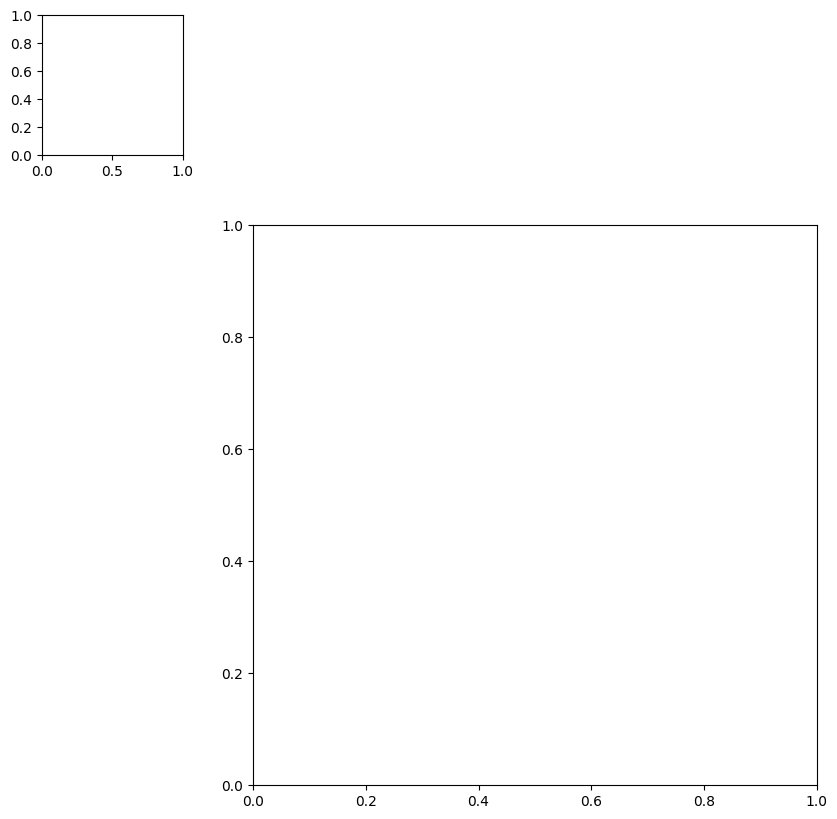

In [8]:
for base, bam_file in bam_files.items():
    experiment_name = base + "_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2"
    threshold_mC =  0.7 #  0.9 #0.99
    bam_path = bam_file # bam_files[haplotype_i]

    extract_mCG_stat_plots(experiment_name, bam_path, date_today, 
                            reg_genome_version, region_chr, region_start, region_end, 
                            ref_genome_path, output_dir, motifs, threshold_mC)

In [9]:
chrom="chr1"
pos=206586630 


# Define the paths to the haplotyped BAM files
bam_files = {
    'A': f"{output_bam_prefix}_{chrom}_{pos}_A.bam",
    'T': f"{output_bam_prefix}_{chrom}_{pos}_T.bam",
    'C': f"{output_bam_prefix}_{chrom}_{pos}_C.bam",
    'G': f"{output_bam_prefix}_{chrom}_{pos}_G.bam"
}
bam_files

{'A': '/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG_chr1_206586630_A.bam',
 'T': '/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG_chr1_206586630_T.bam',
 'C': '/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed_dna_r9_e8_supv3mCG_chr1_206586630_C.bam',
 'G': '/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/haplotyped/manual/haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20

region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrE…

          |    0%

          | Transferring 1393 from reads.CG,0.txt into reads.combined_basemods.h5, new size 1393   0% | 00:00<…

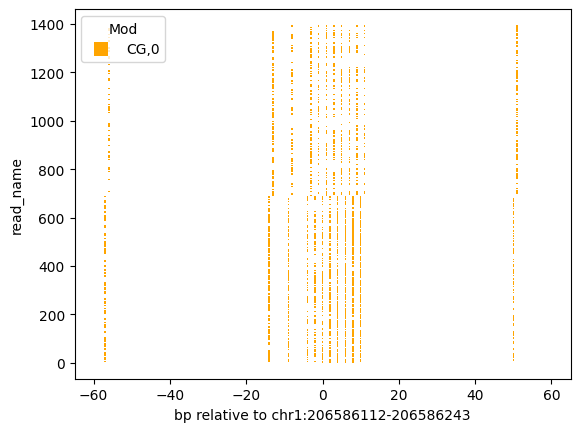

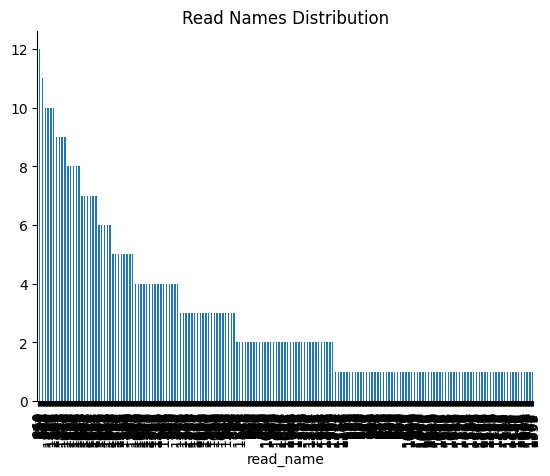

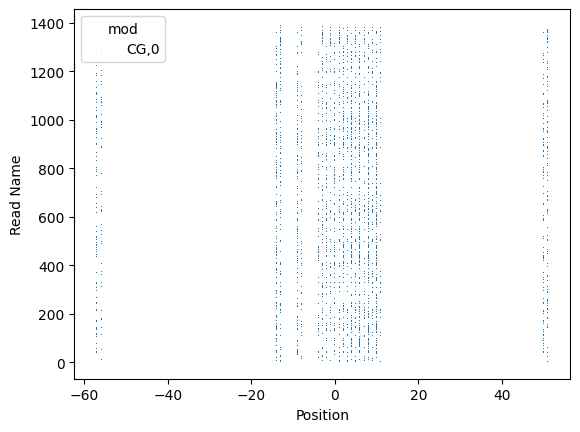

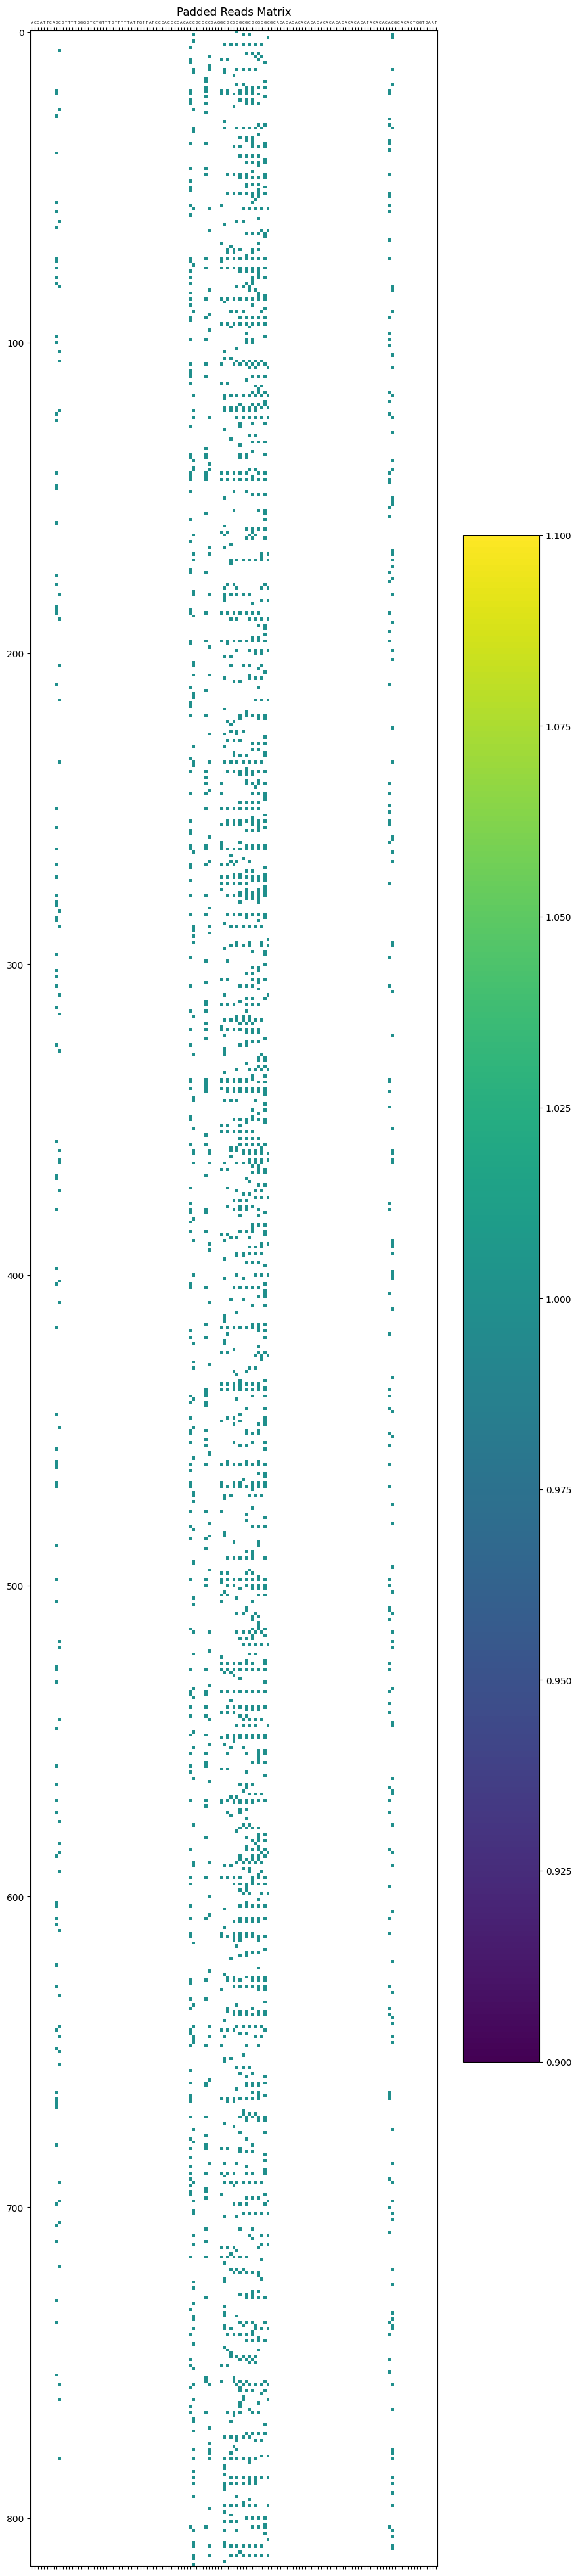

Padded reads saved to padded_reads_A_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy
Padded reads loaded successfully.


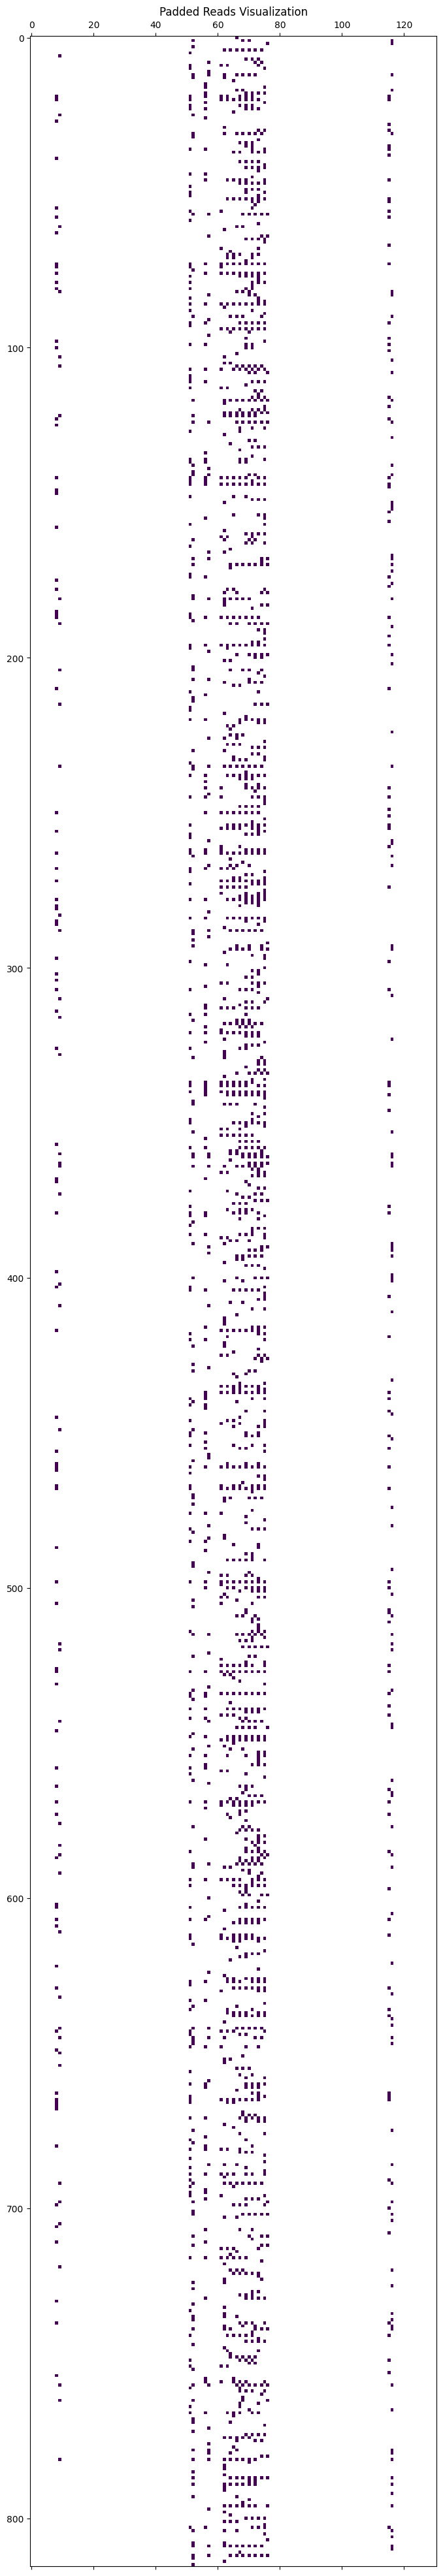

Visualization completed.
Region length: 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [9, 52, 57, 62, 64, 66, 68, 70, 72, 74, 76, 116]
CG_1 at index 9 has genomic coordinate: chr1:206586121
CG_2 at index 52 has genomic coordinate: chr1:206586164
CG_3 at index 57 has genomic coordinate: chr1:206586169
CG_4 at index 62 has genomic coordinate: chr1:206586174
CG_5 at index 64 has genomic coordinate: chr1:206586176
CG_6 at index 66 has genomic coordinate: chr1:206586178
CG_7 at index 68 has genomic coordinate: chr1:206586180
CG_8 at index 70 has genomic coordinate: chr1:206586182
CG_9 at index 72 has genomic coordinate: chr1:206586184
CG_10 at index 74 has genomic coordinate: chr1:206586186
CG_11 at index 76 has genomic coordinate: chr1:206586188
CG_12 at index 116 has genomic coordinate: chr1:206586228
CG_info_df     Po

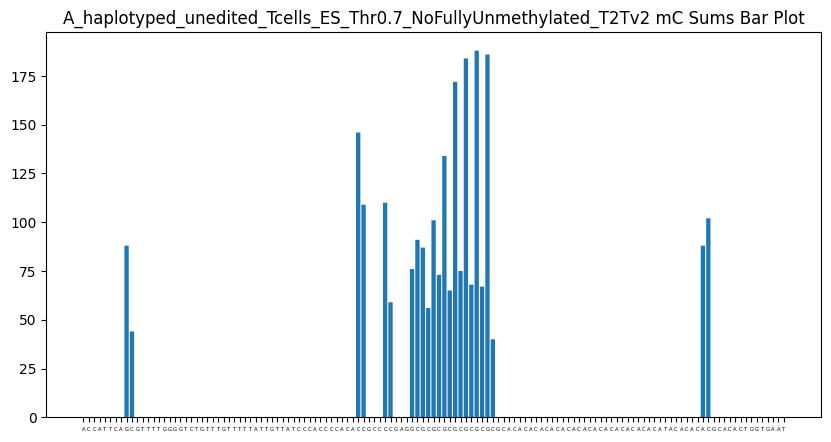

(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.10784314 0.05392157 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.17892157 0.13357843 0.
 0.         0.         0.13480392 0.07230392 0.         0.
 0.         0.09313725 0.11151961 0.10661765 0.06862745 0.12377451
 0.08946078 0.16421569 0.07965686 0.21078431 0.09191176 0.2254902
 0.08333333 0.23039216 0.08210784 0.22794118 0.04901961 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0. 

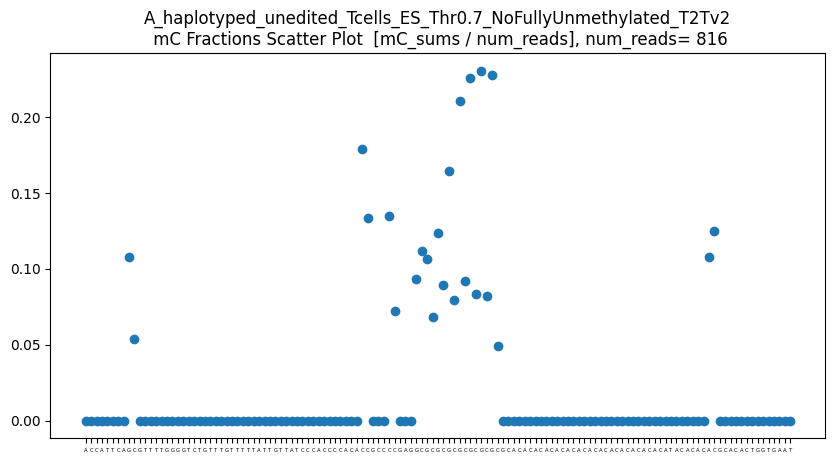

CGs_all_sums  = [132. 255. 169. 167. 143. 174. 199. 247. 252. 255. 226. 190.]


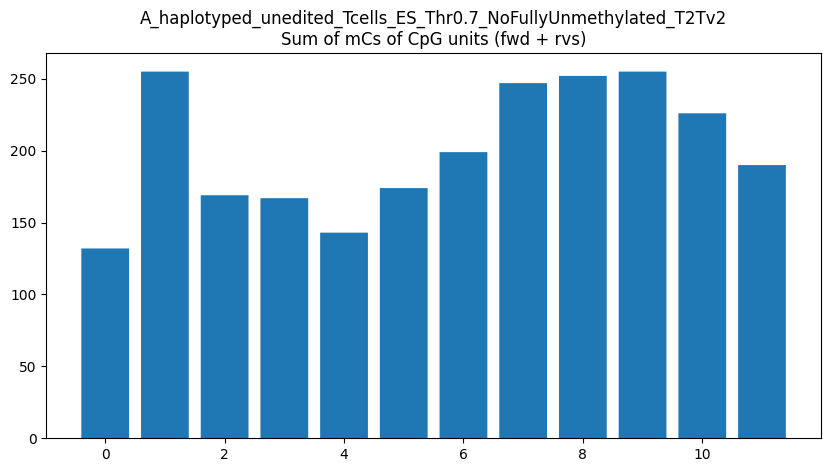

CGs_all_sums / len(CGs_all) = [0.16176471 0.3125     0.20710784 0.20465686 0.1752451  0.21323529
 0.24387255 0.30269608 0.30882353 0.3125     0.27696078 0.23284314]


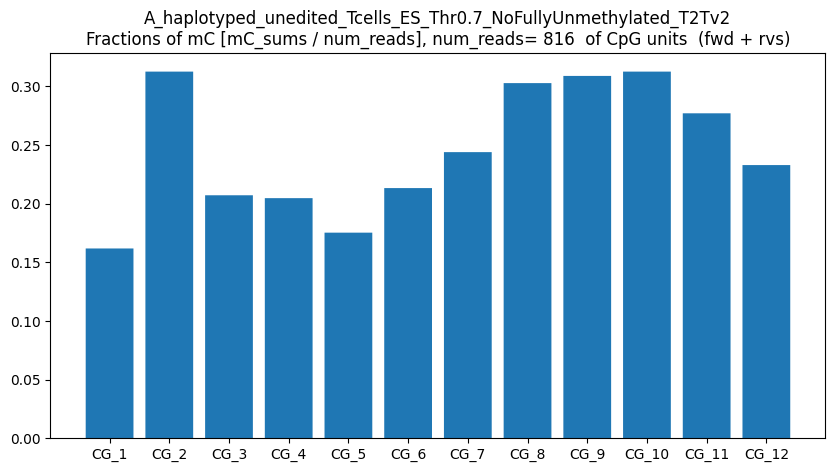

CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0.   0. 132.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.   0.   0.
   0. 169.   0.   0.   0.   0. 167.   0. 143.   0. 174.   0. 199.   0.
 247.   0. 252.   0. 255.   0. 226.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 190.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


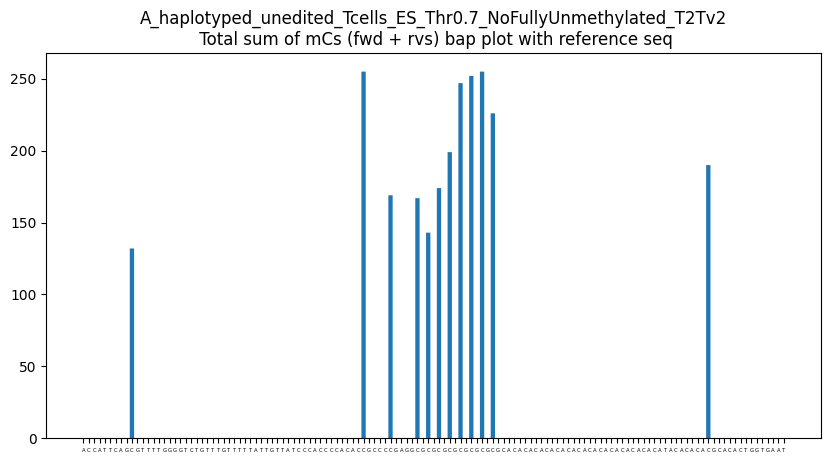

len(CGs_all) = 816
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.16176471 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.3125     0.
 0.         0.         0.         0.20710784 0.         0.
 0.         0.         0.20465686 0.         0.1752451  0.
 0.21323529 0.         0.24387255 0.         0.30269608 0.
 0.30882353 0.         0.3125     0.         0.27696078 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

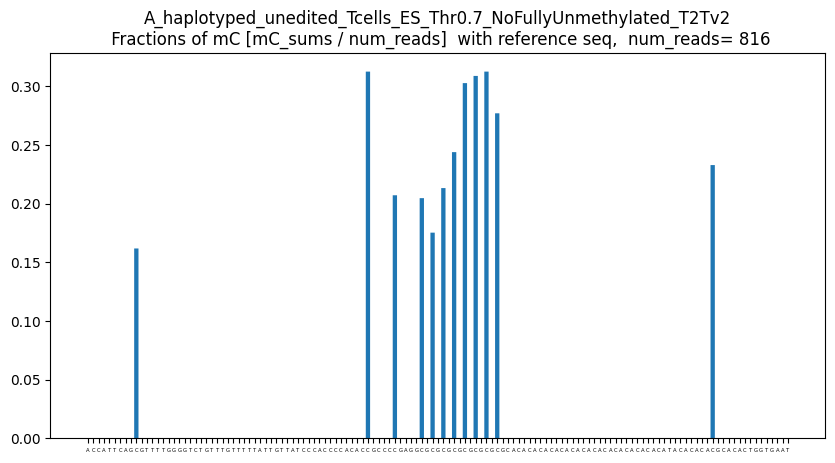

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


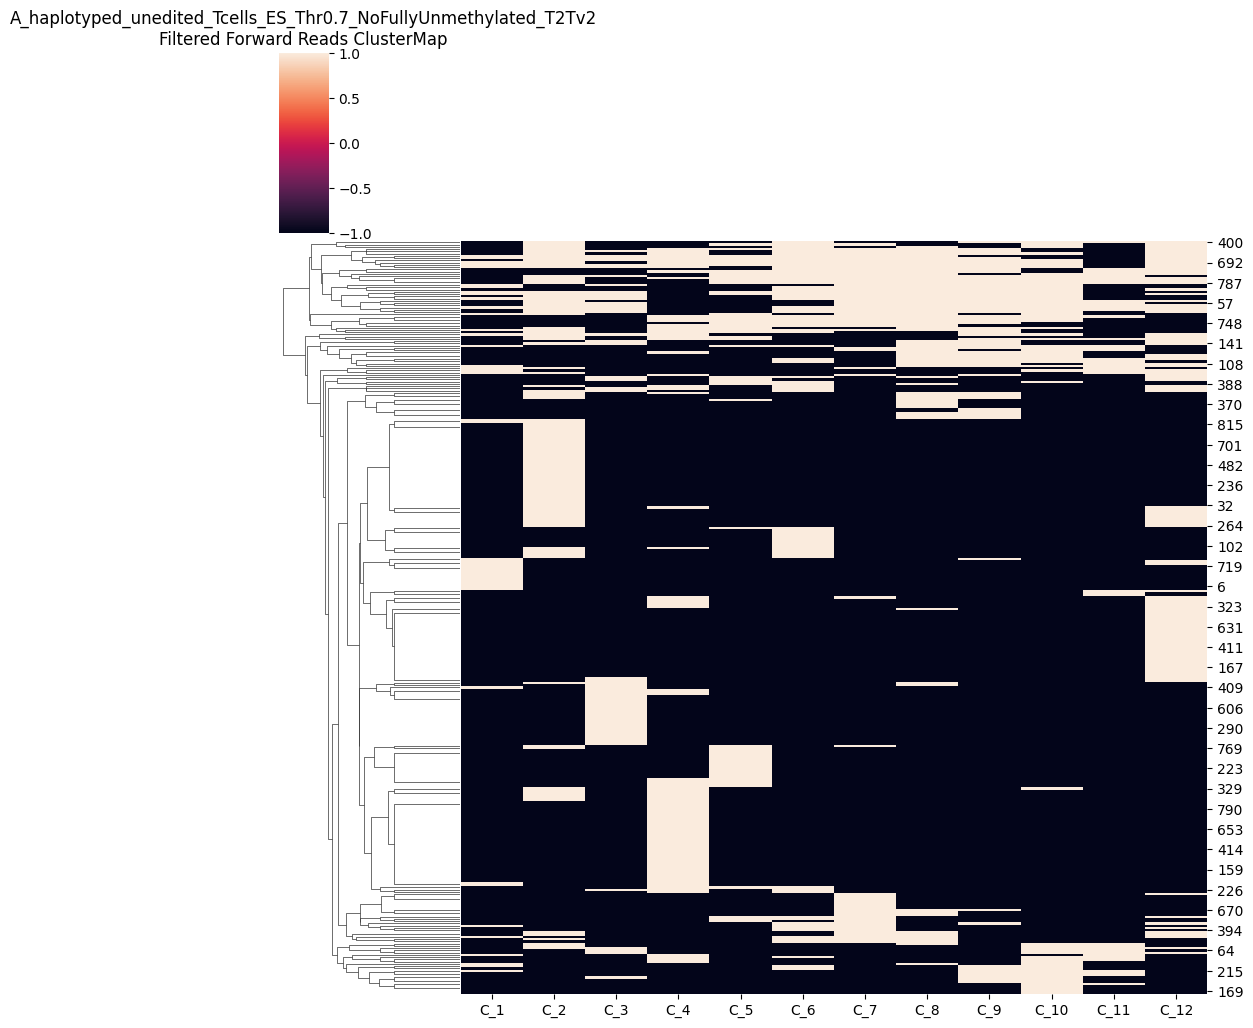

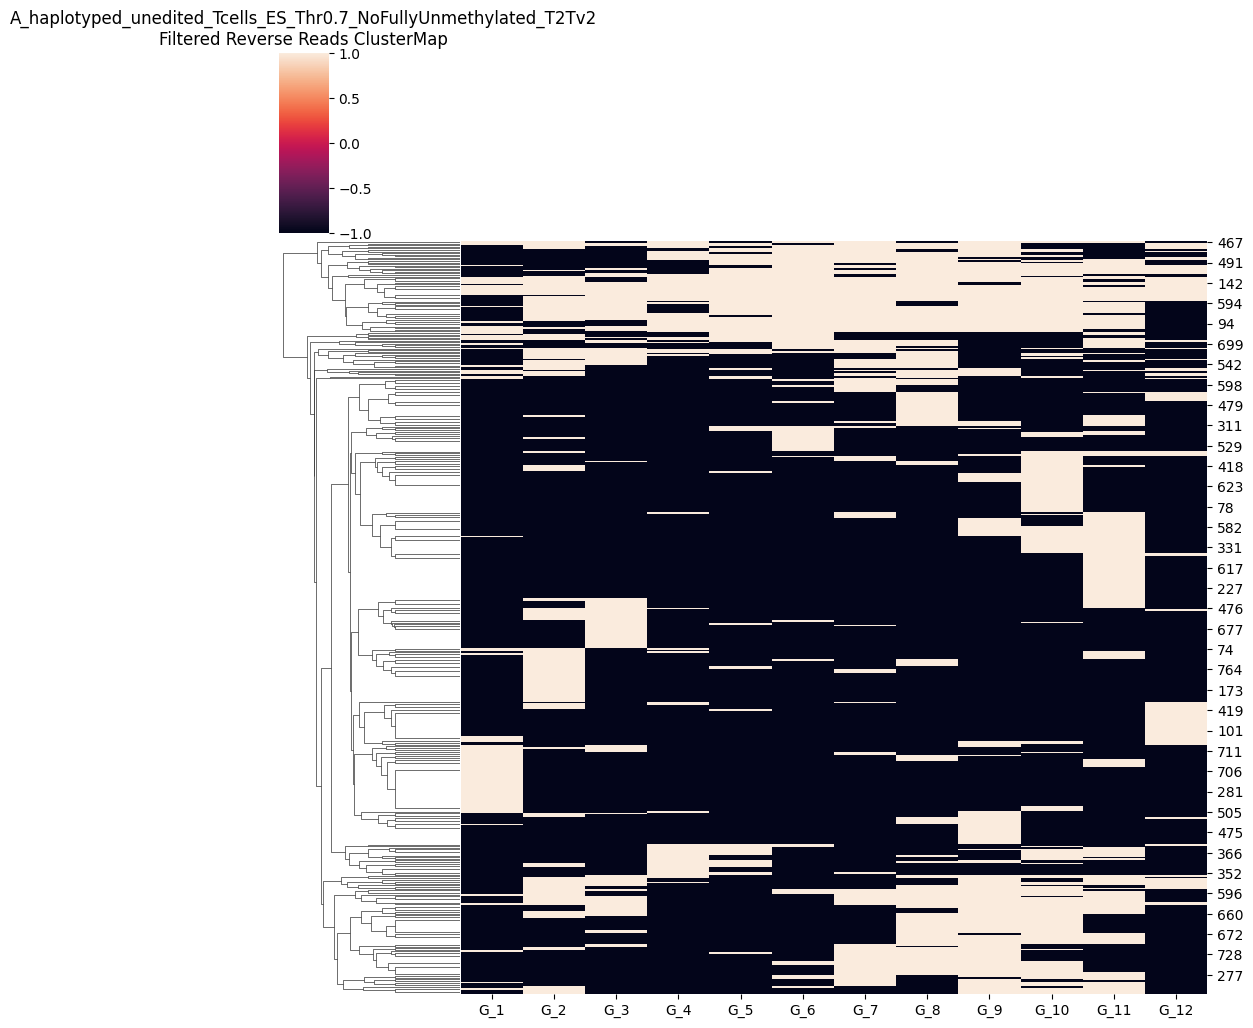

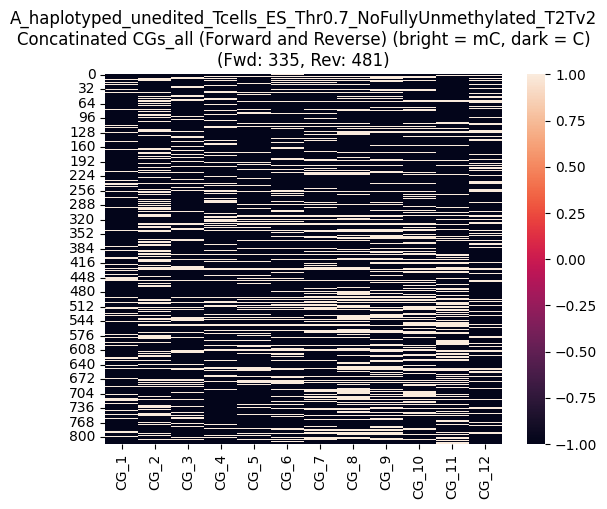

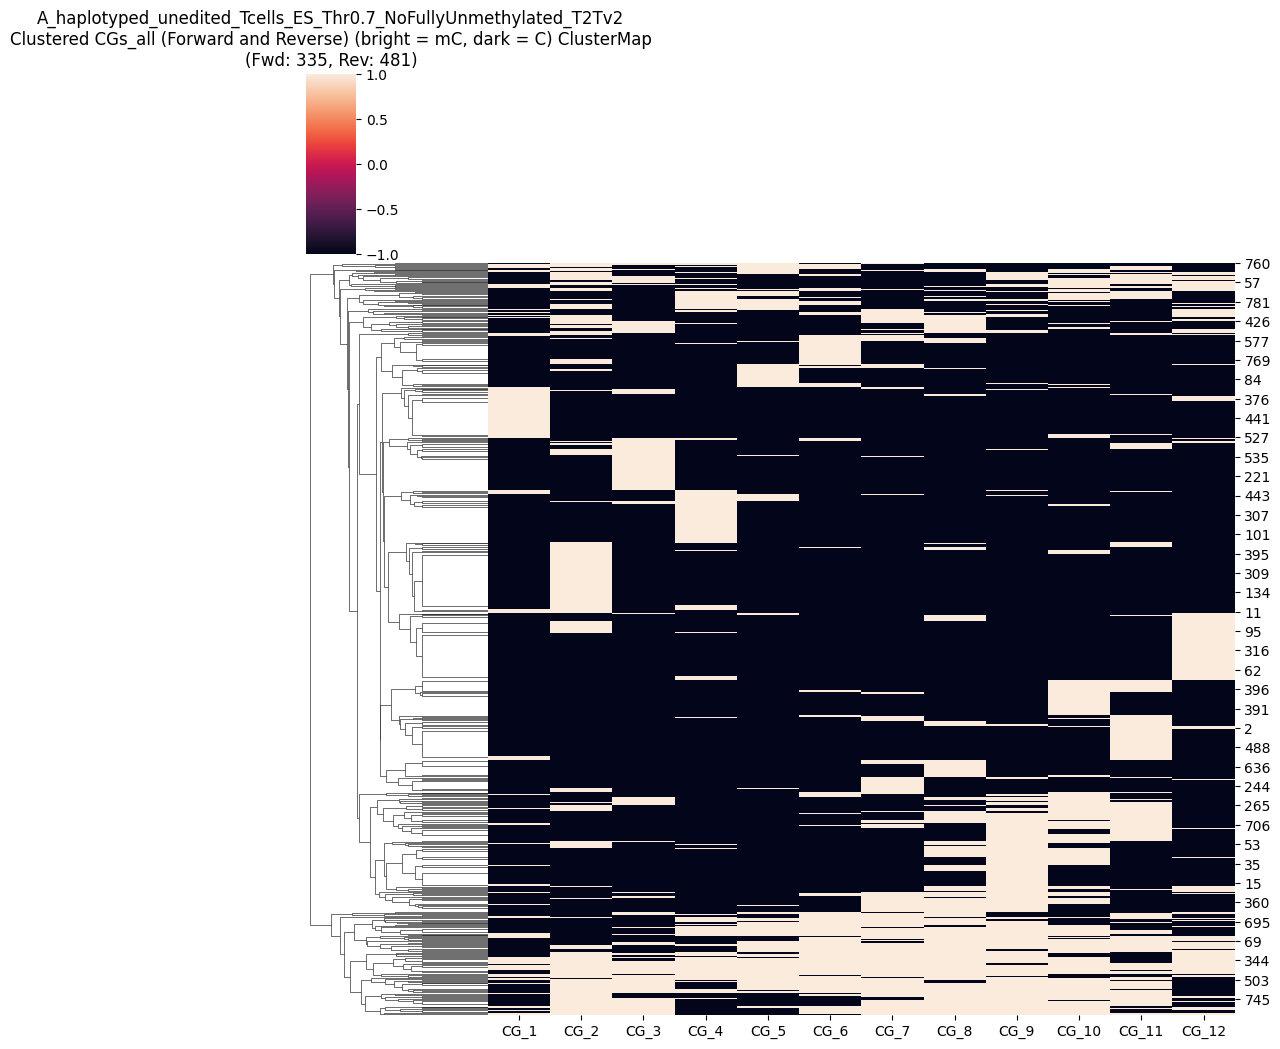

CGs_all saved as CG_12_units_combined_A_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD335_numRVS481_padded_reads_A_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrE…

          |    0%

          | Transferring 32 from reads.CG,0.txt into reads.combined_basemods.h5, new size 32   0% | 00:00<?

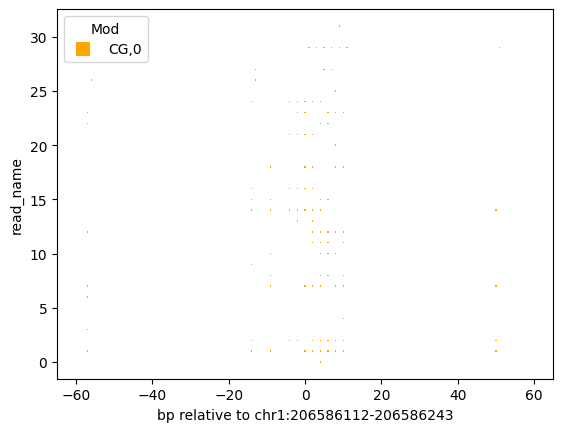

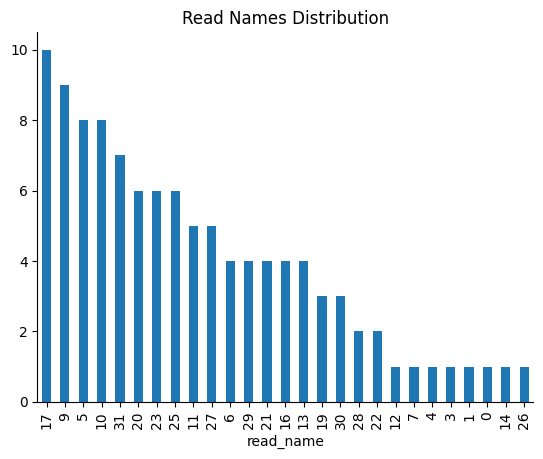

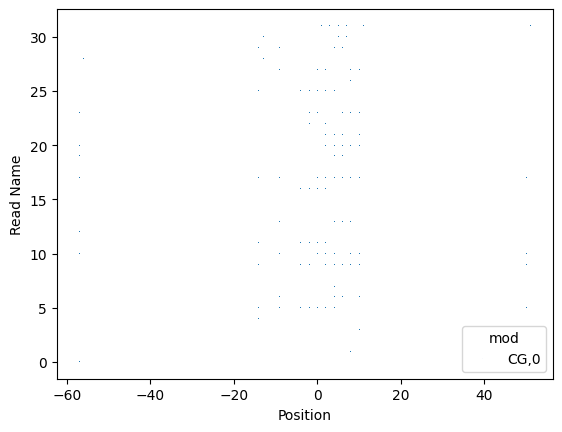

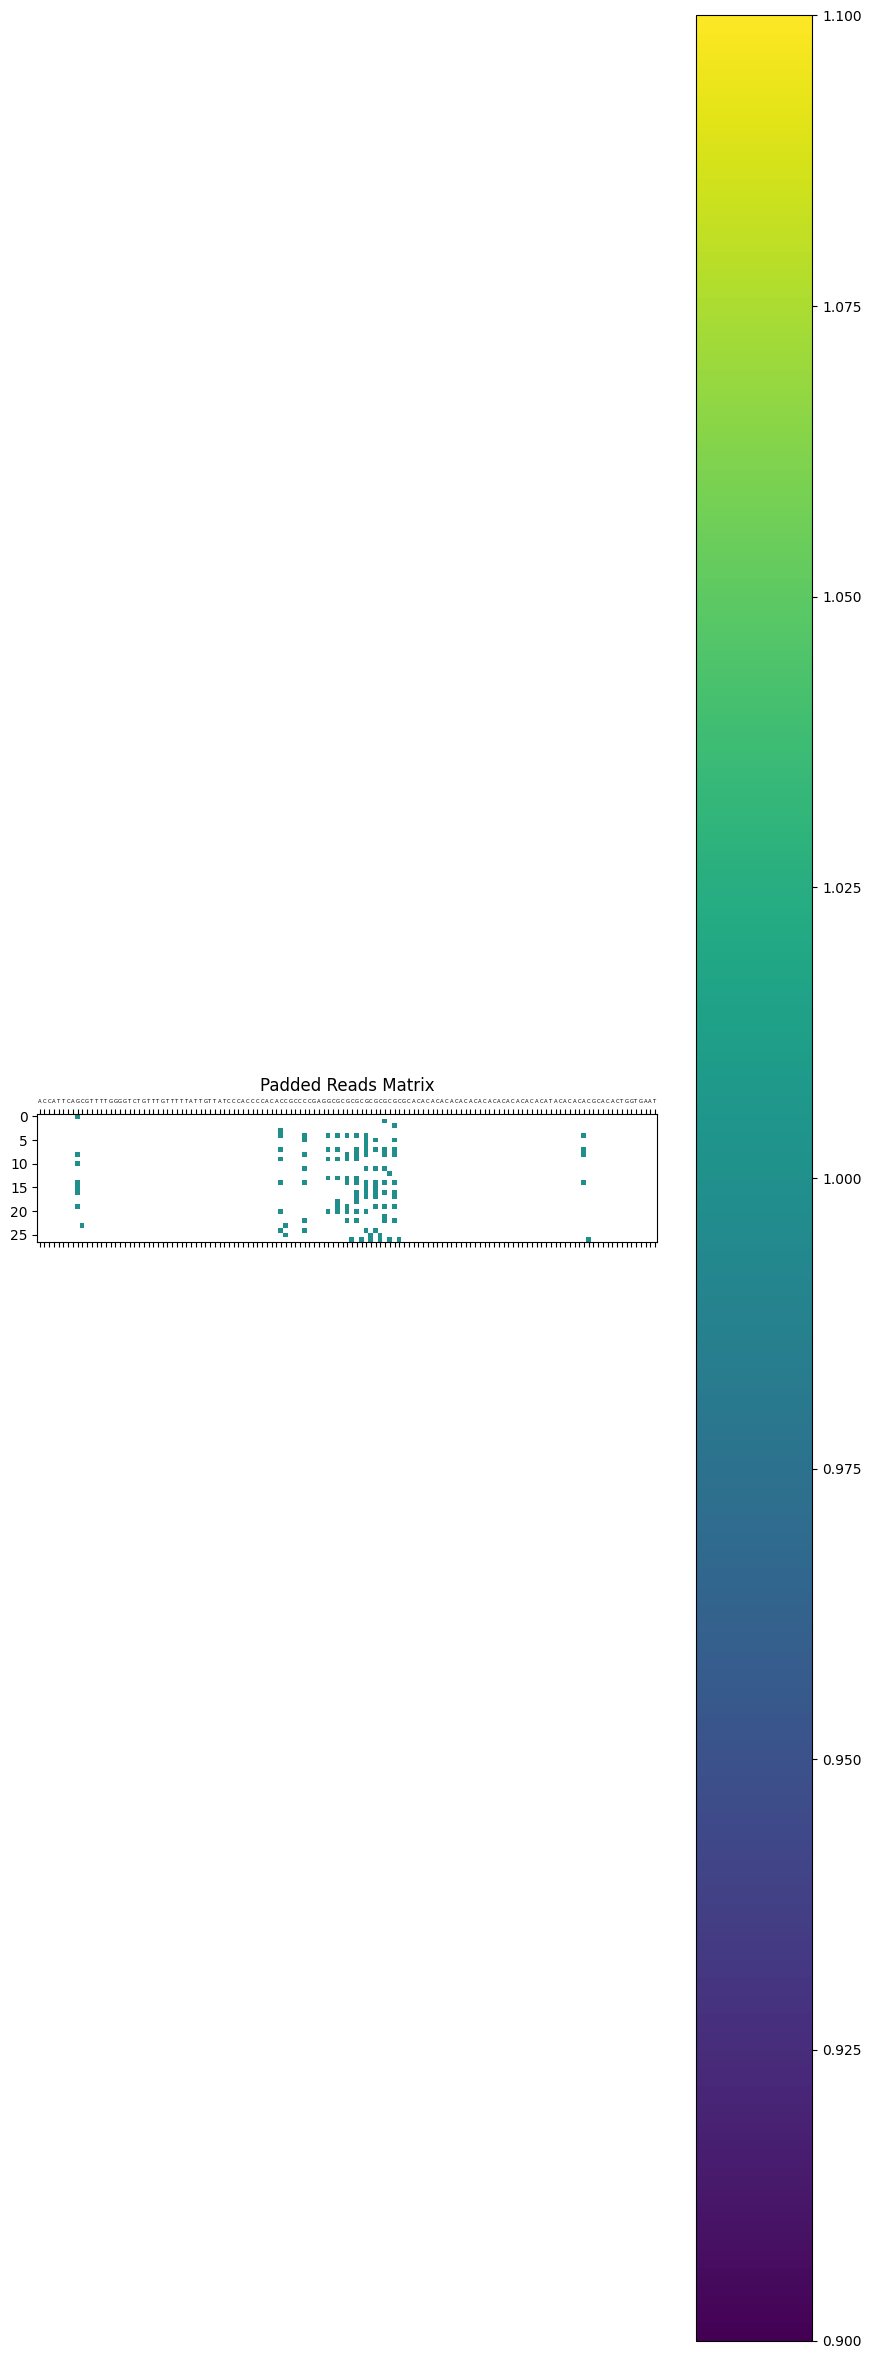

Padded reads saved to padded_reads_T_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy
Padded reads loaded successfully.


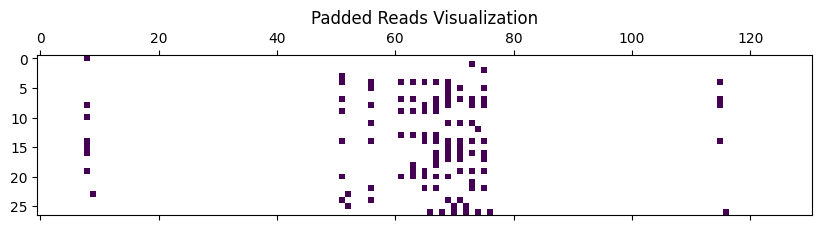

Visualization completed.
Region length: 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [9, 52, 57, 62, 64, 66, 68, 70, 72, 74, 76, 116]
CG_1 at index 9 has genomic coordinate: chr1:206586121
CG_2 at index 52 has genomic coordinate: chr1:206586164
CG_3 at index 57 has genomic coordinate: chr1:206586169
CG_4 at index 62 has genomic coordinate: chr1:206586174
CG_5 at index 64 has genomic coordinate: chr1:206586176
CG_6 at index 66 has genomic coordinate: chr1:206586178
CG_7 at index 68 has genomic coordinate: chr1:206586180
CG_8 at index 70 has genomic coordinate: chr1:206586182
CG_9 at index 72 has genomic coordinate: chr1:206586184
CG_10 at index 74 has genomic coordinate: chr1:206586186
CG_11 at index 76 has genomic coordinate: chr1:206586188
CG_12 at index 116 has genomic coordinate: chr1:206586228
CG_info_df     Po

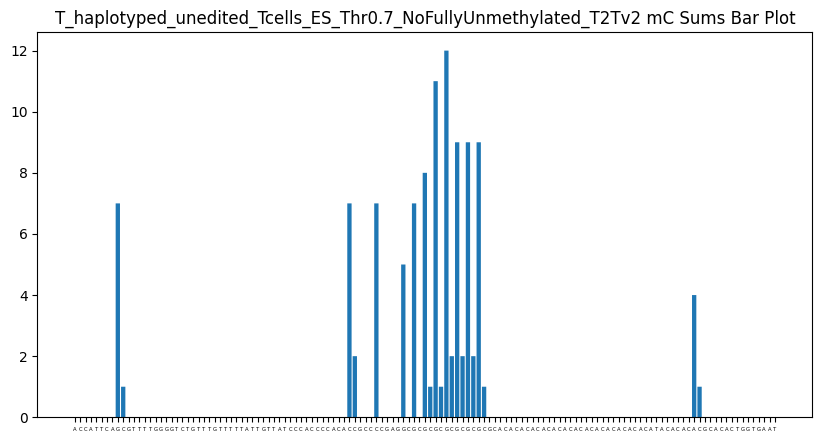

(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.25925926 0.03703704 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.25925926 0.07407407 0.
 0.         0.         0.25925926 0.         0.         0.
 0.         0.18518519 0.         0.25925926 0.         0.2962963
 0.03703704 0.40740741 0.03703704 0.44444444 0.07407407 0.33333333
 0.07407407 0.33333333 0.07407407 0.33333333 0.03703704 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0. 

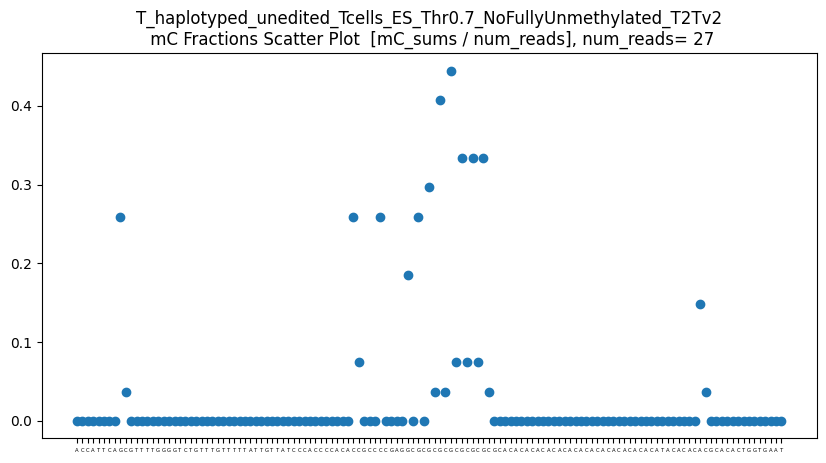

CGs_all_sums  = [ 8.  9.  7.  5.  7.  9. 12. 14. 11. 11. 10.  5.]


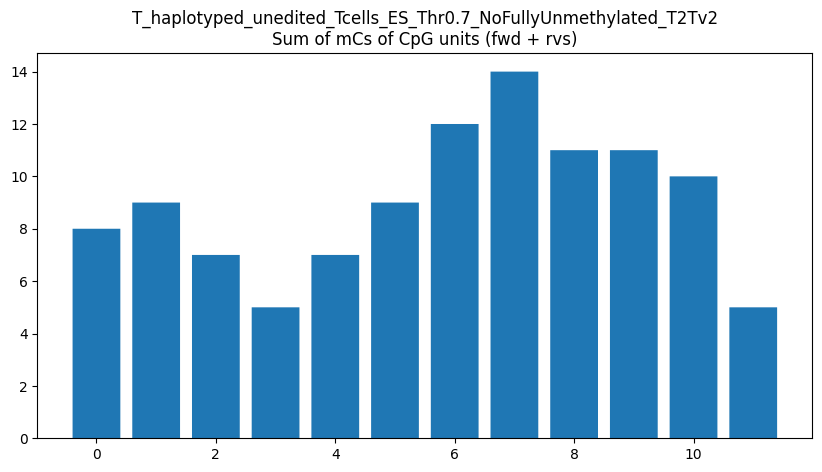

CGs_all_sums / len(CGs_all) = [0.2962963  0.33333333 0.25925926 0.18518519 0.25925926 0.33333333
 0.44444444 0.51851852 0.40740741 0.40740741 0.37037037 0.18518519]


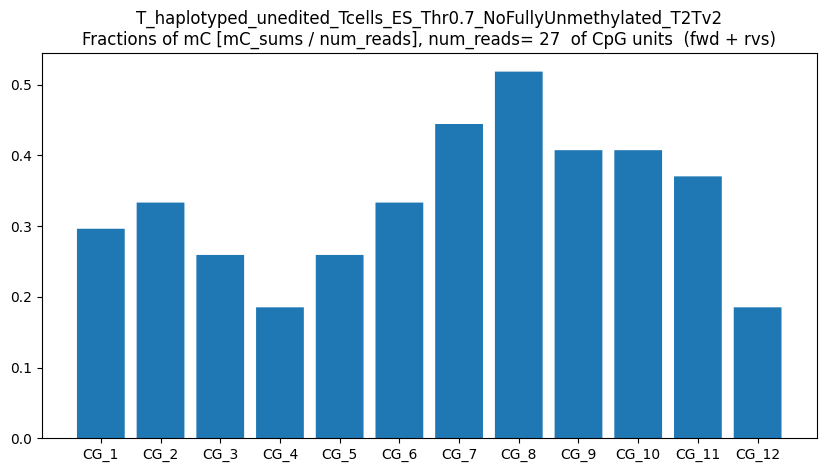

CGs_all_on_fwd_C_sums = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.
  0.  0.  0.  7.  0.  0.  0.  0.  5.  0.  7.  0.  9.  0. 12.  0. 14.  0.
 11.  0. 11.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


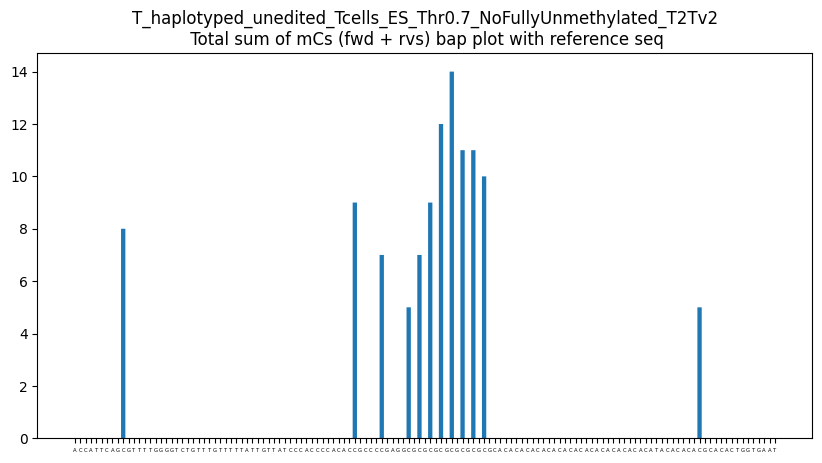

len(CGs_all) = 27
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.2962963  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.33333333 0.
 0.         0.         0.         0.25925926 0.         0.
 0.         0.         0.18518519 0.         0.25925926 0.
 0.33333333 0.         0.44444444 0.         0.51851852 0.
 0.40740741 0.         0.40740741 0.         0.37037037 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.

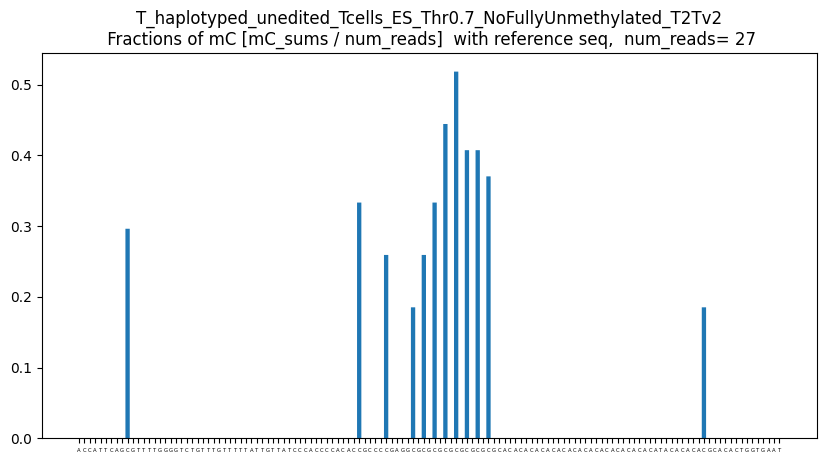

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


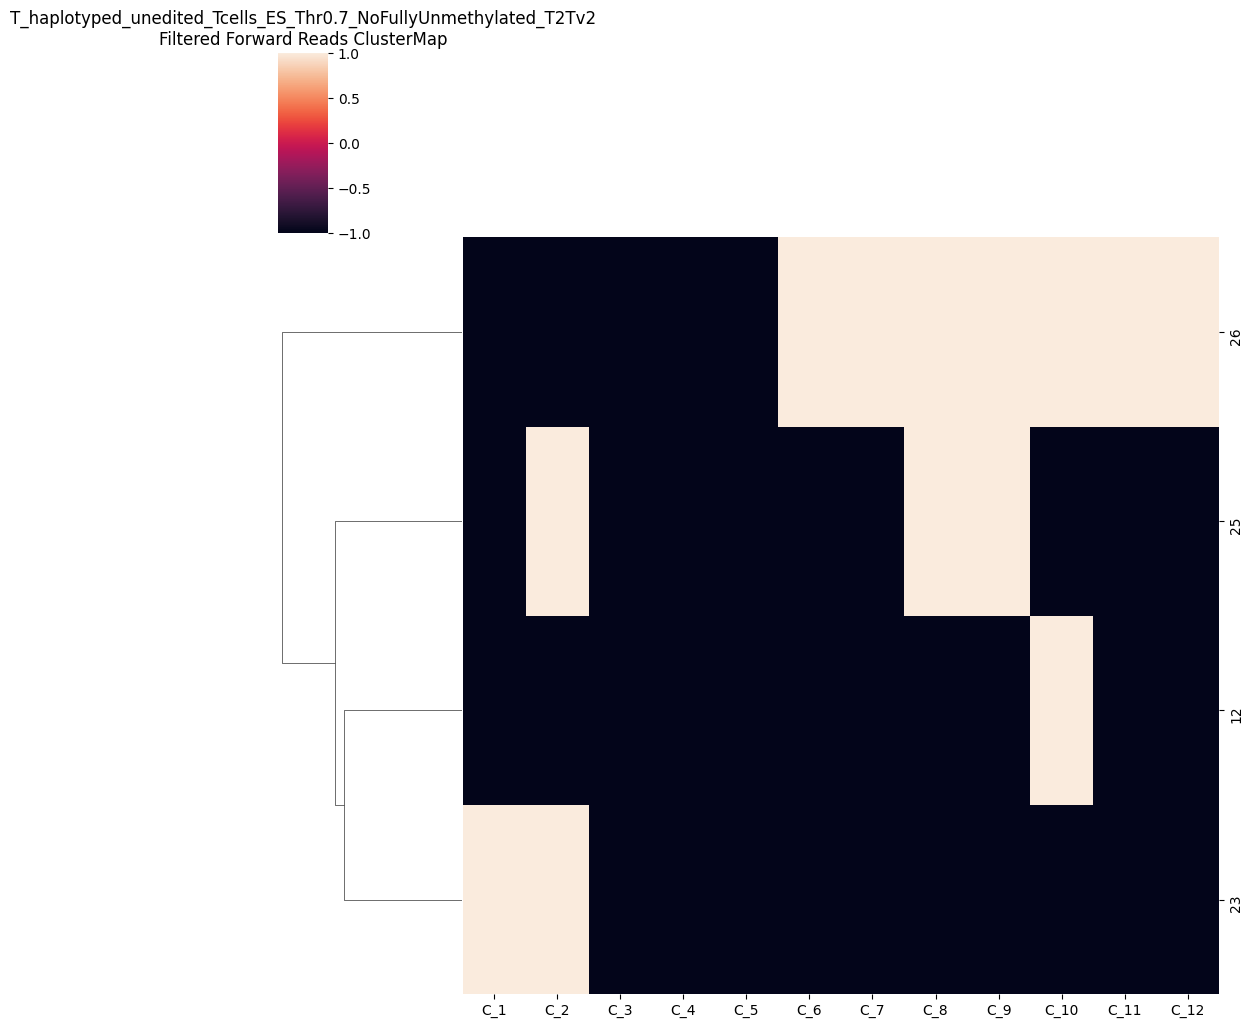

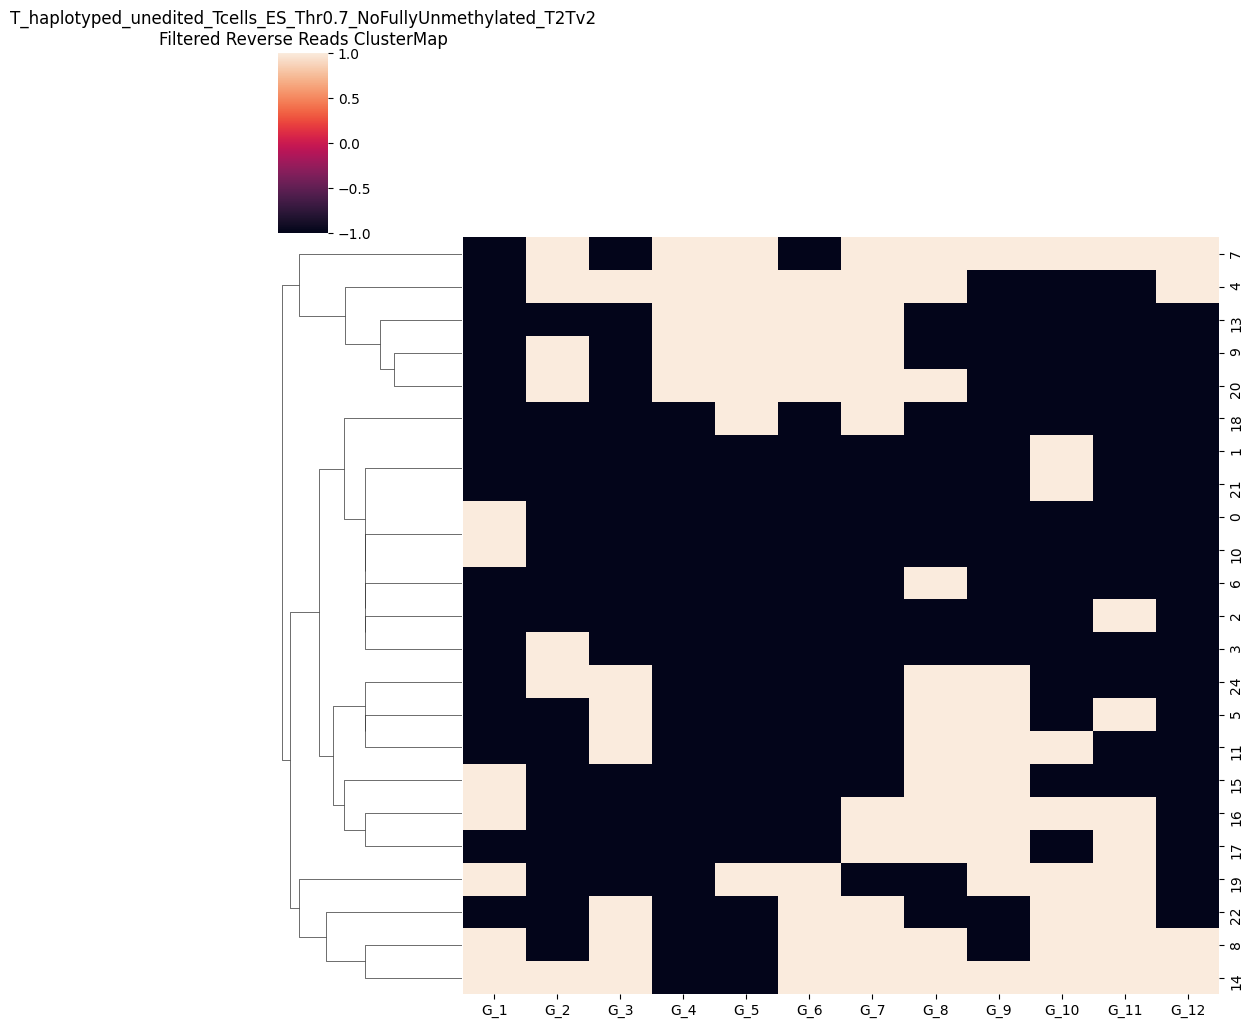

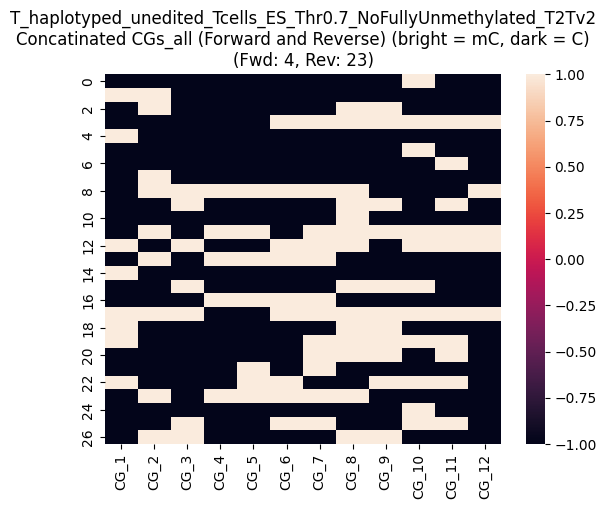

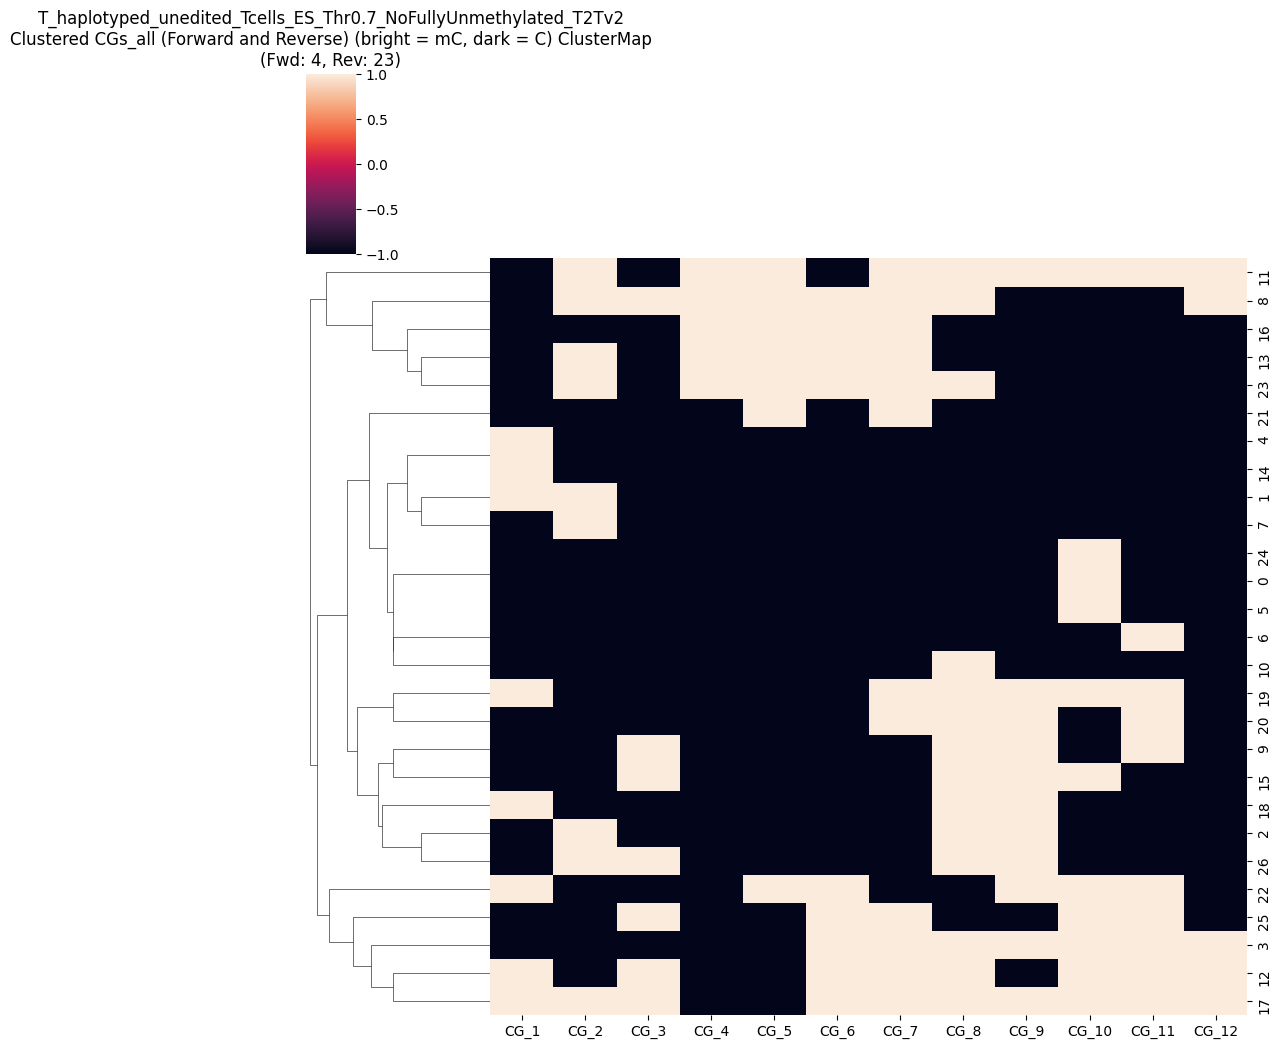

CGs_all saved as CG_12_units_combined_T_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD4_numRVS23_padded_reads_T_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrE…

          |    0%

          | Transferring 28 from reads.CG,0.txt into reads.combined_basemods.h5, new size 28   0% | 00:00<?

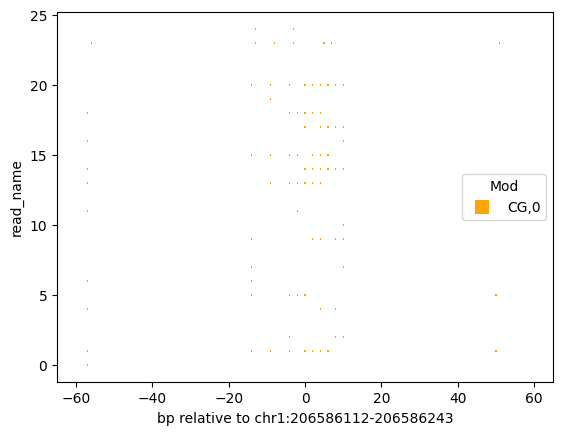

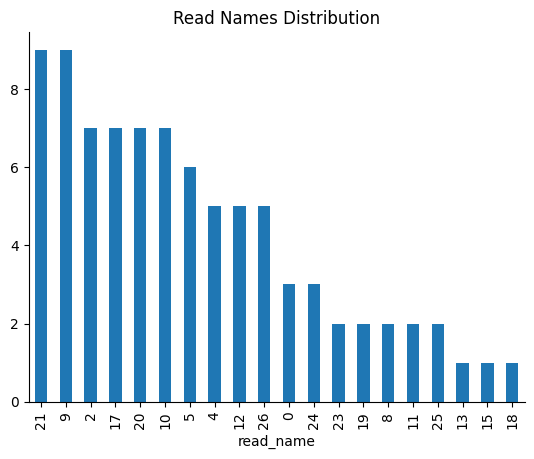

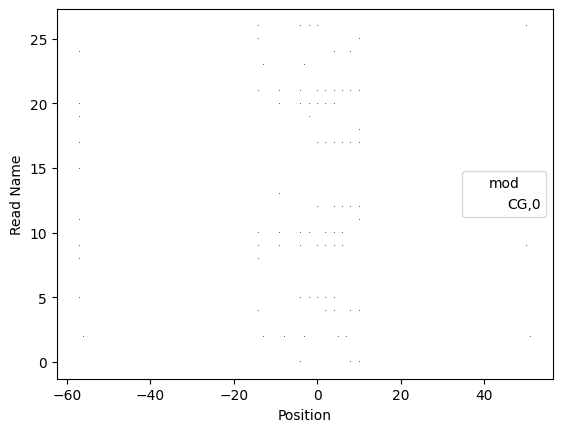

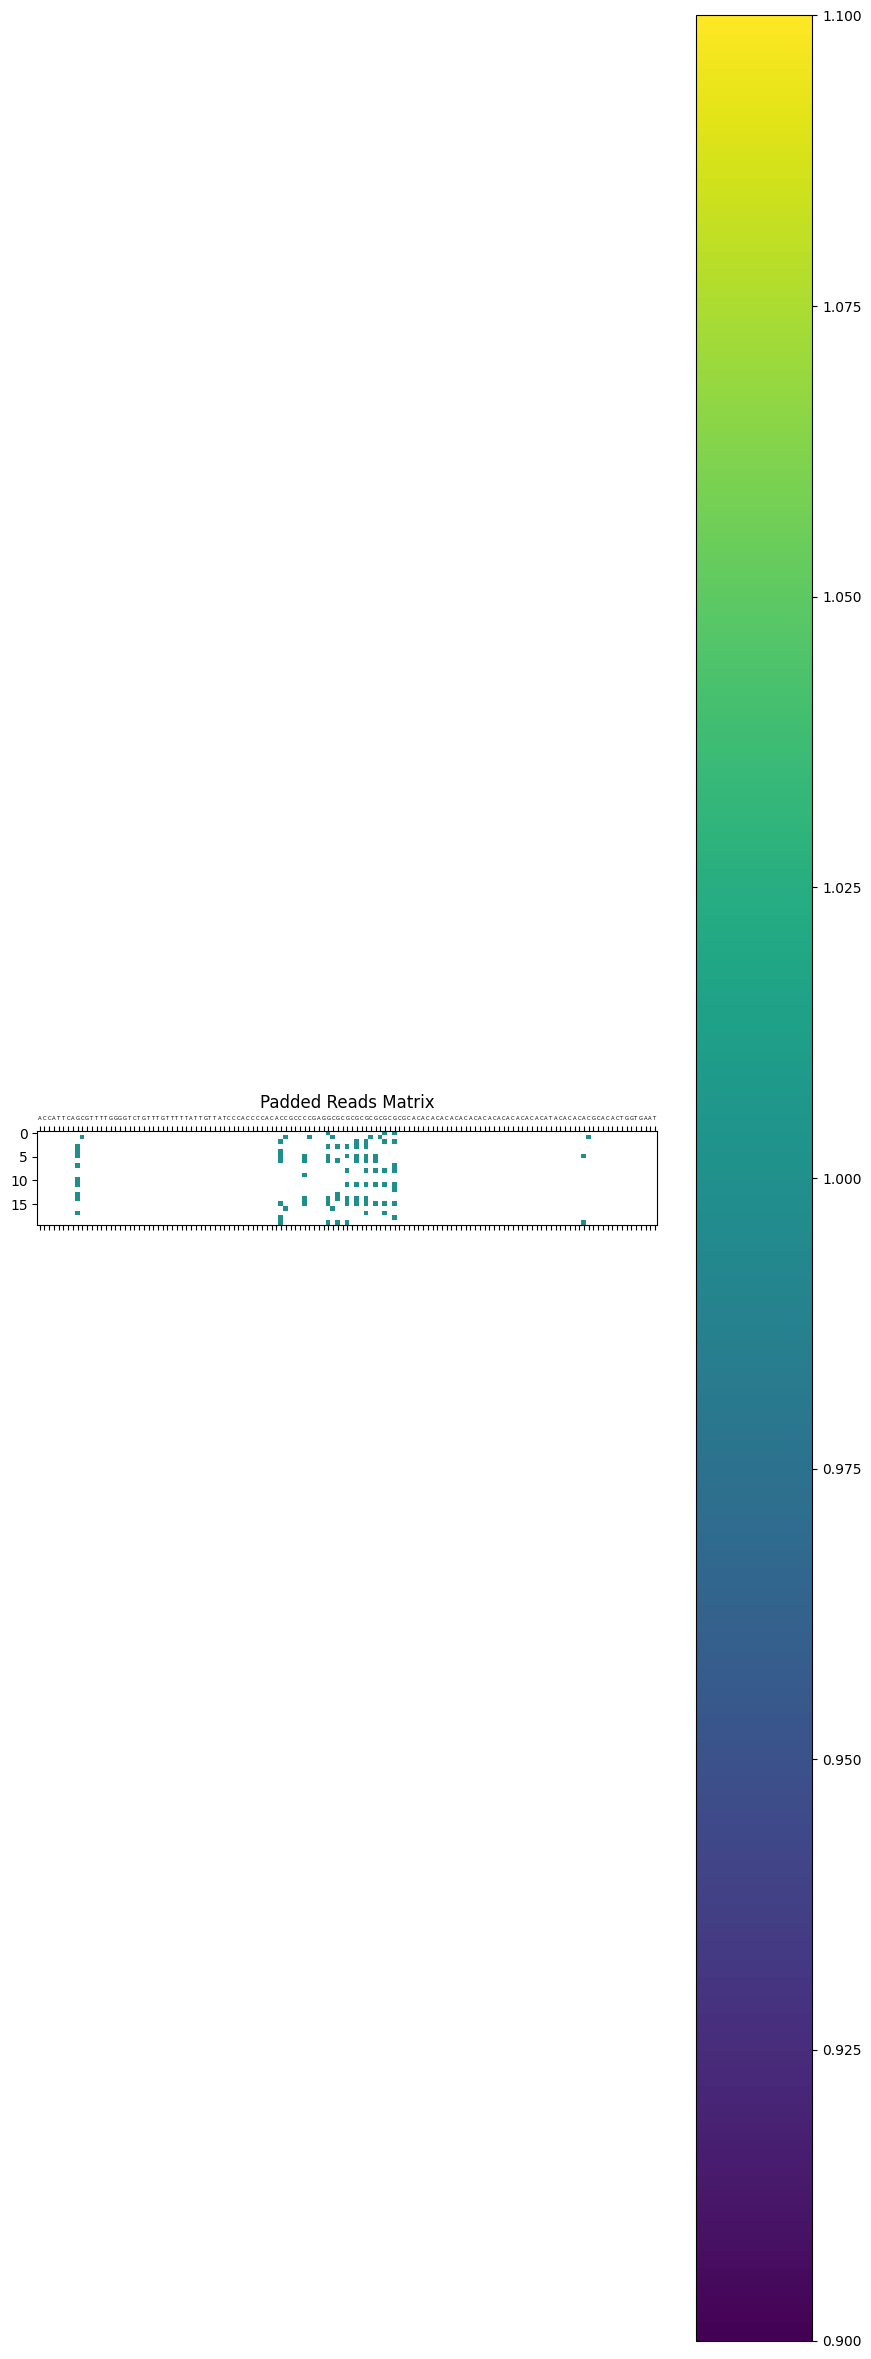

Padded reads saved to padded_reads_C_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy
Padded reads loaded successfully.


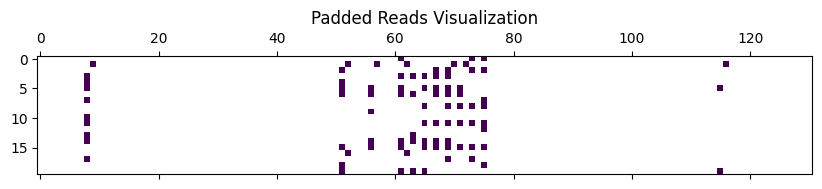

Visualization completed.
Region length: 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [9, 52, 57, 62, 64, 66, 68, 70, 72, 74, 76, 116]
CG_1 at index 9 has genomic coordinate: chr1:206586121
CG_2 at index 52 has genomic coordinate: chr1:206586164
CG_3 at index 57 has genomic coordinate: chr1:206586169
CG_4 at index 62 has genomic coordinate: chr1:206586174
CG_5 at index 64 has genomic coordinate: chr1:206586176
CG_6 at index 66 has genomic coordinate: chr1:206586178
CG_7 at index 68 has genomic coordinate: chr1:206586180
CG_8 at index 70 has genomic coordinate: chr1:206586182
CG_9 at index 72 has genomic coordinate: chr1:206586184
CG_10 at index 74 has genomic coordinate: chr1:206586186
CG_11 at index 76 has genomic coordinate: chr1:206586188
CG_12 at index 116 has genomic coordinate: chr1:206586228
CG_info_df     Po

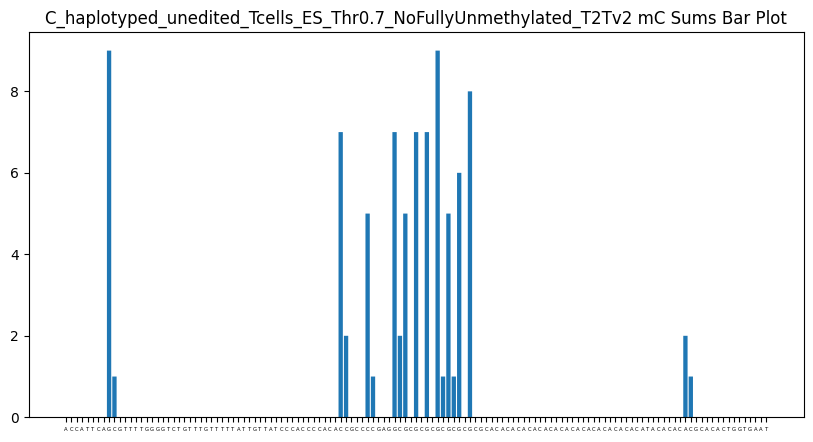

(mC_sums / len(CGs_all) = [0.   0.   0.   0.   0.   0.   0.   0.   0.45 0.05 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.35 0.1  0.   0.   0.
 0.25 0.05 0.   0.   0.   0.35 0.1  0.25 0.   0.35 0.   0.35 0.   0.45
 0.05 0.25 0.05 0.3  0.   0.4  0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


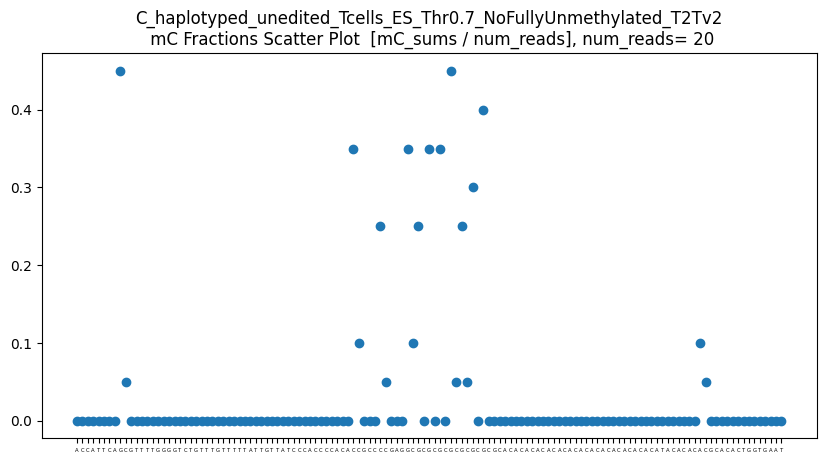

CGs_all_sums  = [10.  9.  6.  9.  5.  7.  7. 10.  6.  6.  8.  3.]


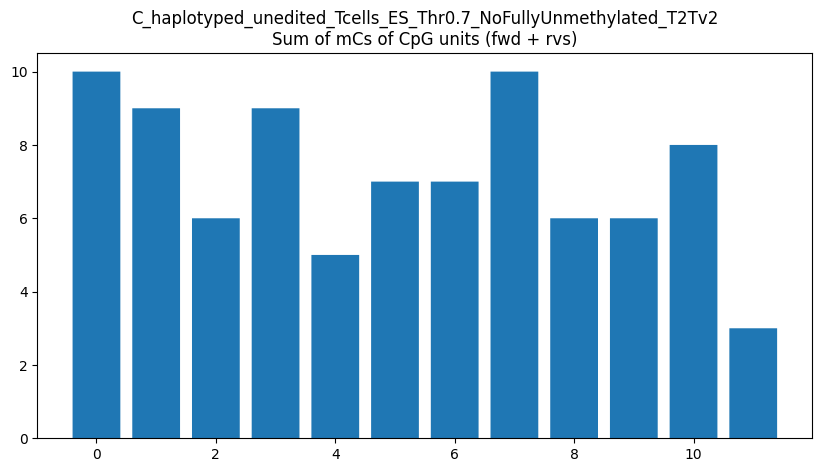

CGs_all_sums / len(CGs_all) = [0.5  0.45 0.3  0.45 0.25 0.35 0.35 0.5  0.3  0.3  0.4  0.15]


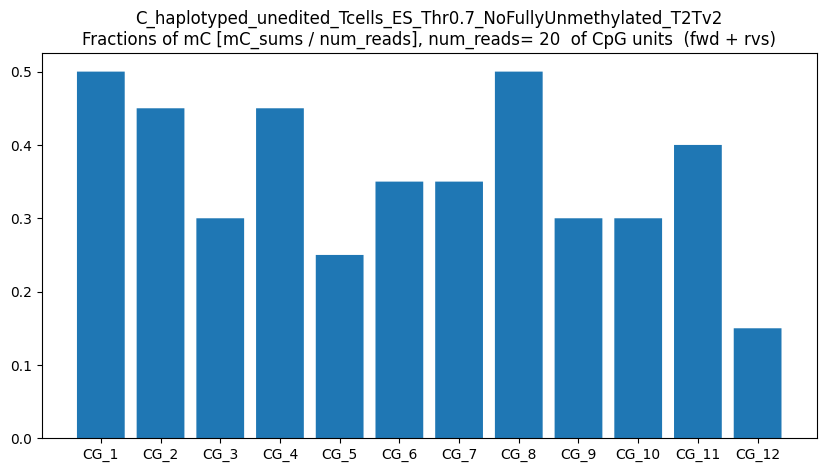

CGs_all_on_fwd_C_sums = [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.
  0.  0.  0.  6.  0.  0.  0.  0.  9.  0.  5.  0.  7.  0.  7.  0. 10.  0.
  6.  0.  6.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


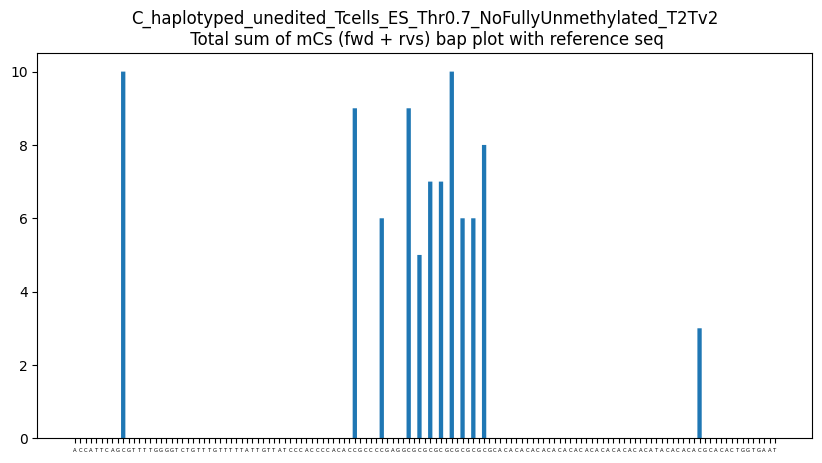

len(CGs_all) = 20
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.45 0.   0.   0.
 0.   0.3  0.   0.   0.   0.   0.45 0.   0.25 0.   0.35 0.   0.35 0.
 0.5  0.   0.3  0.   0.3  0.   0.4  0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.15 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


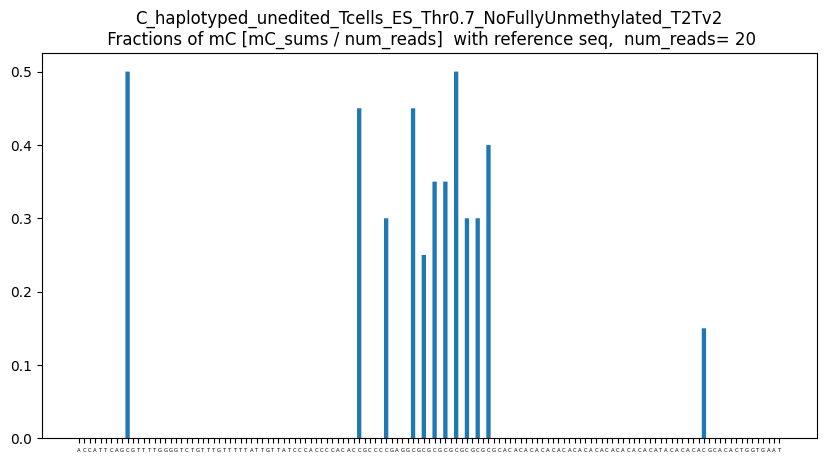

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


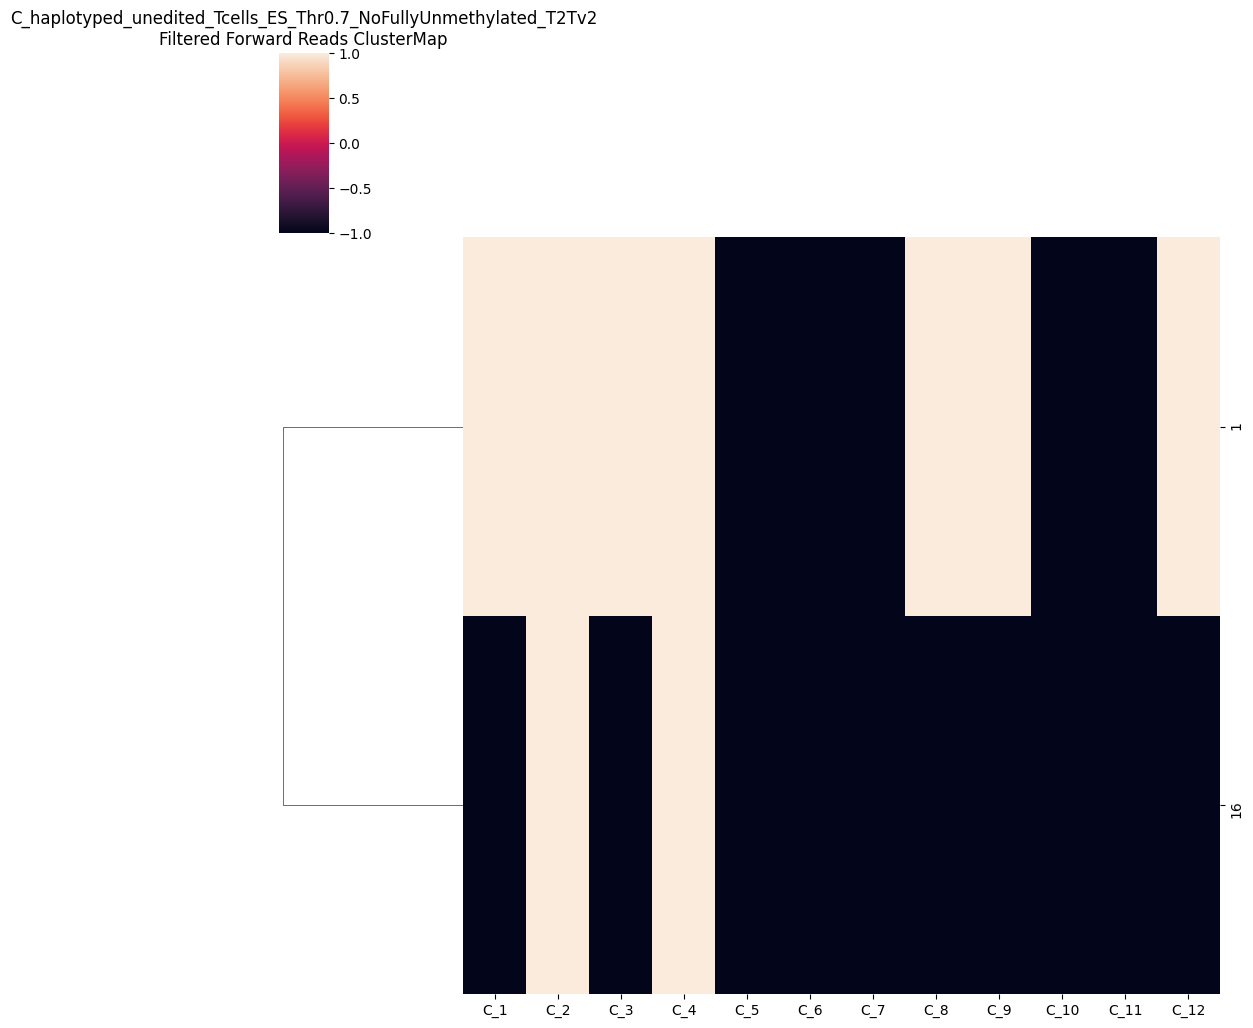

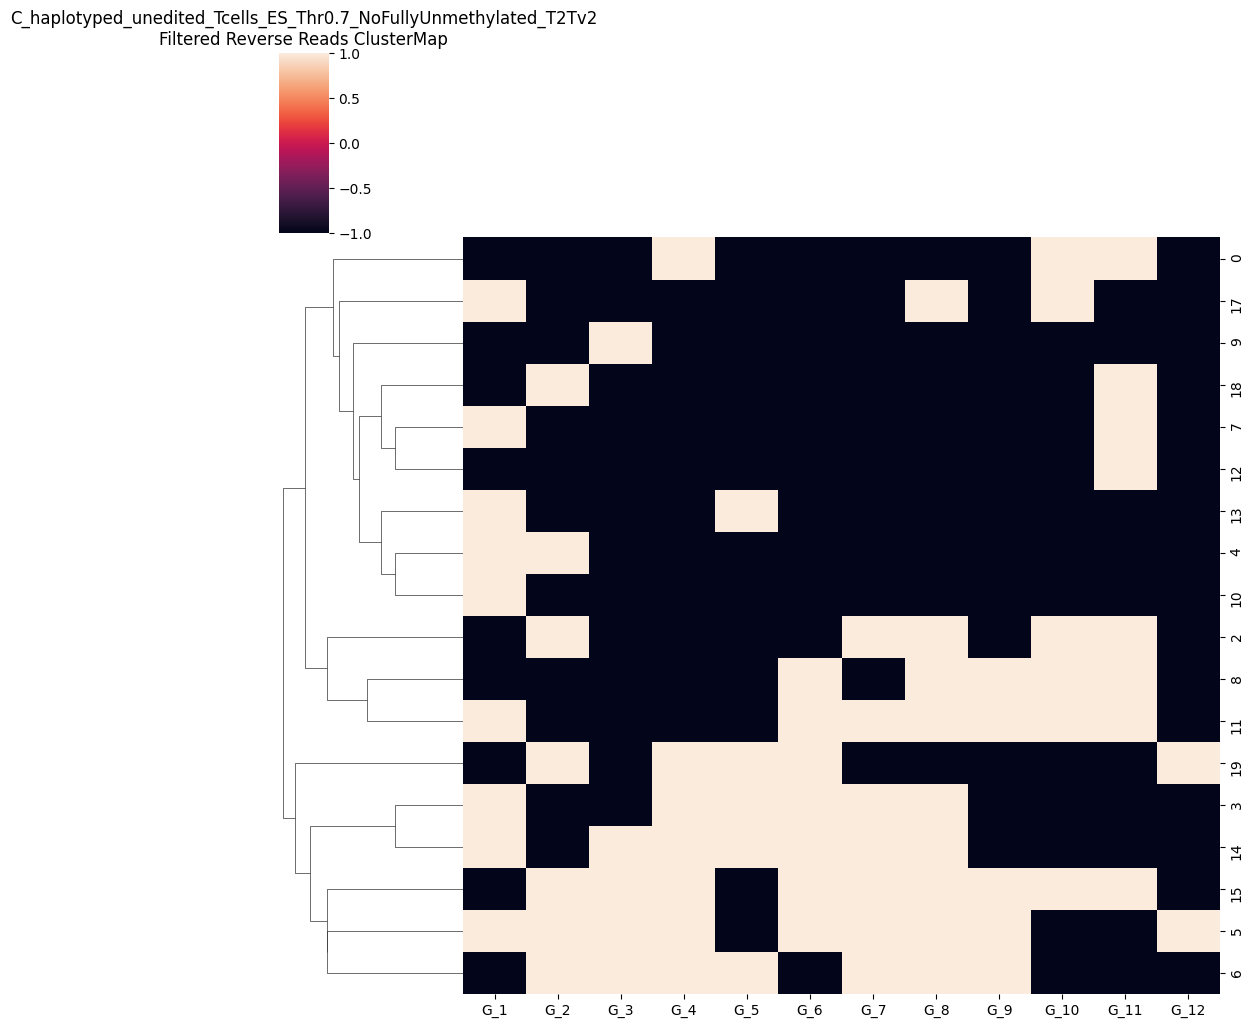

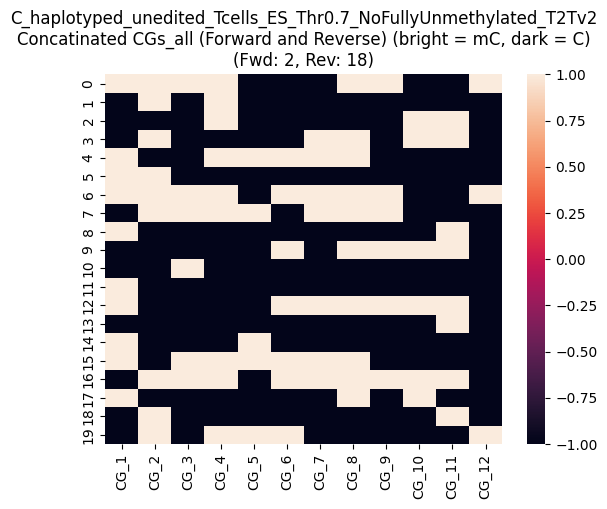

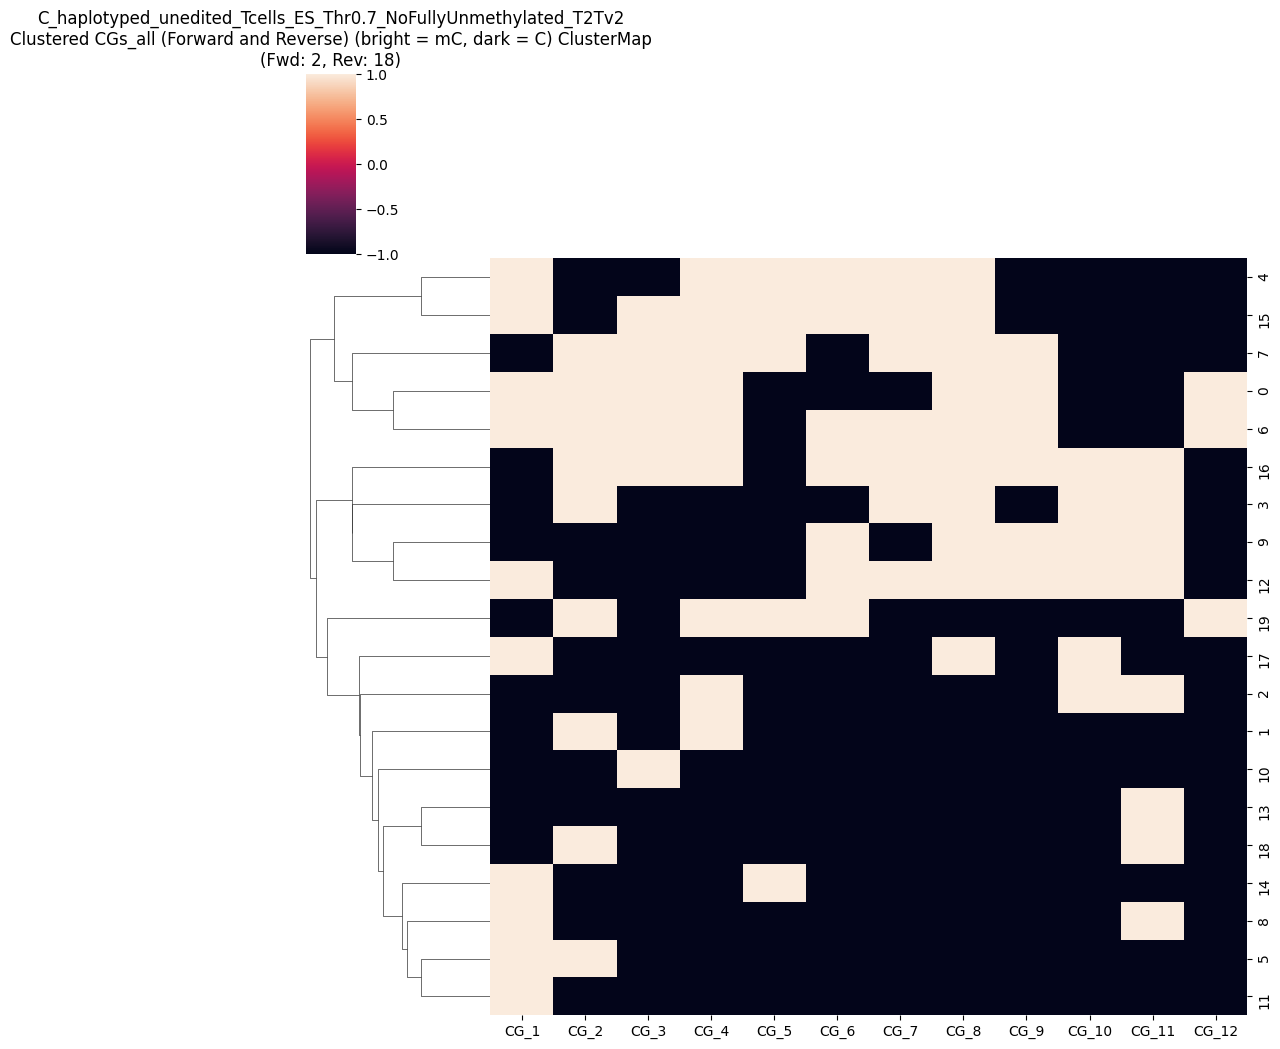

CGs_all saved as CG_12_units_combined_C_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD2_numRVS18_padded_reads_C_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)
region_length 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in haplotyped_sort_chr1_sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrE…

          |    0%

          | Transferring 1243 from reads.CG,0.txt into reads.combined_basemods.h5, new size 1243   0% | 00:00<…

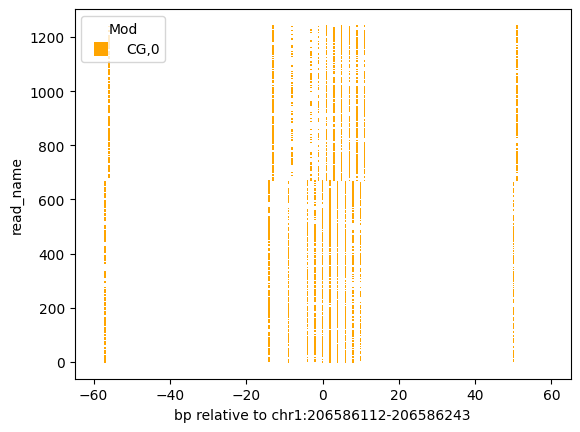

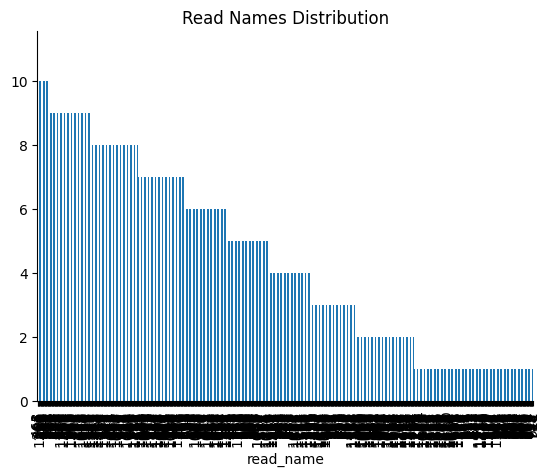

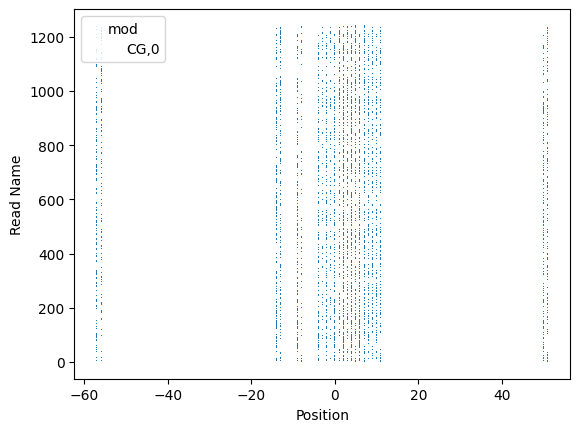

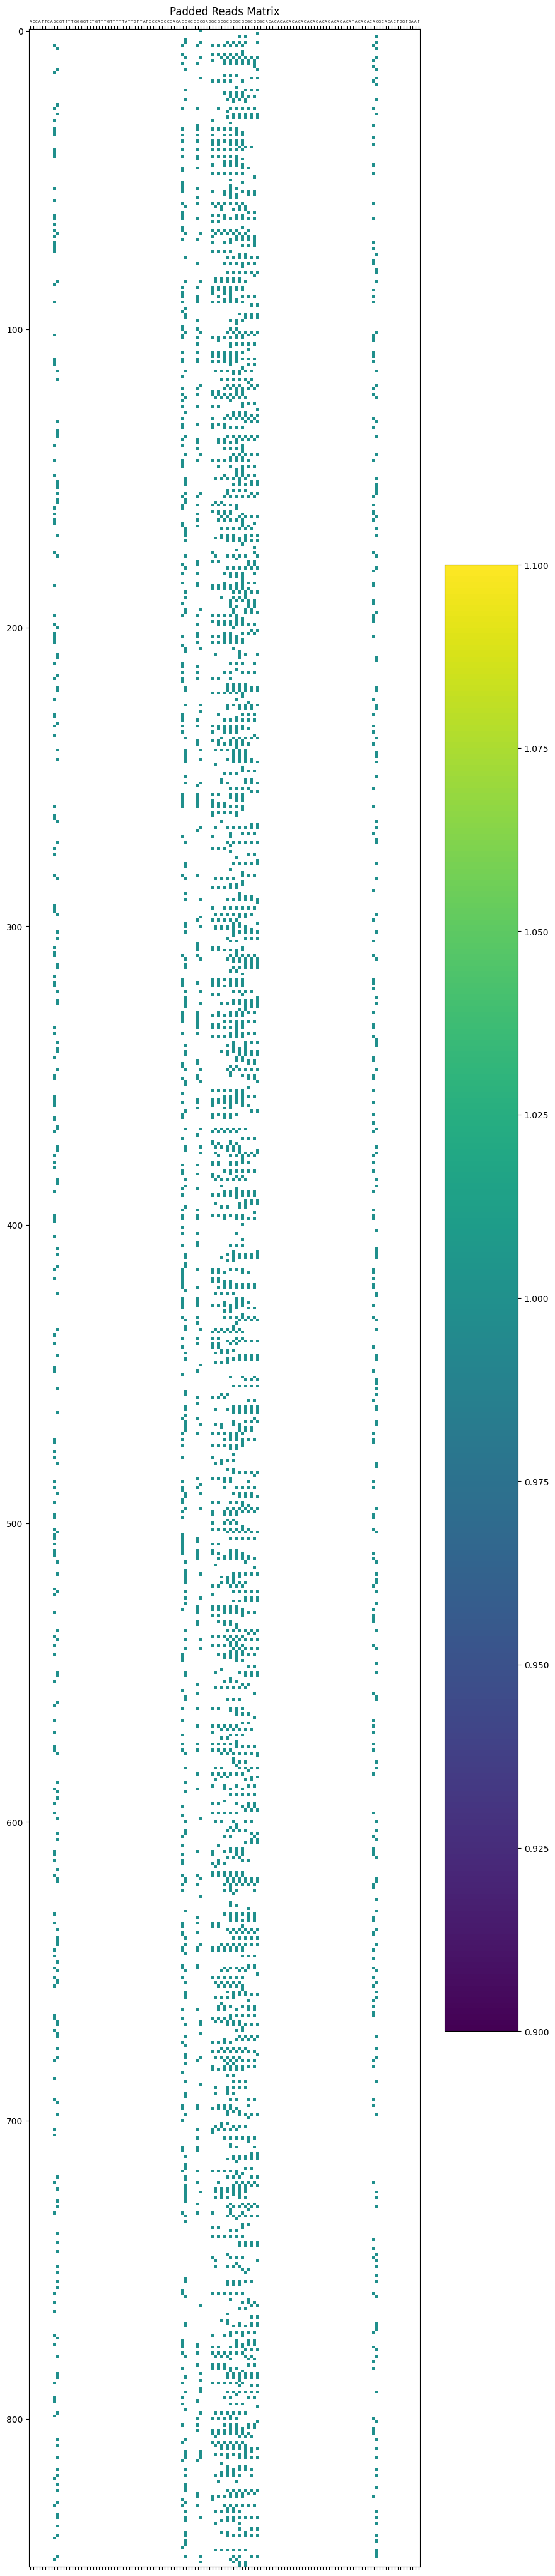

Padded reads saved to padded_reads_G_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy
Padded reads loaded successfully.


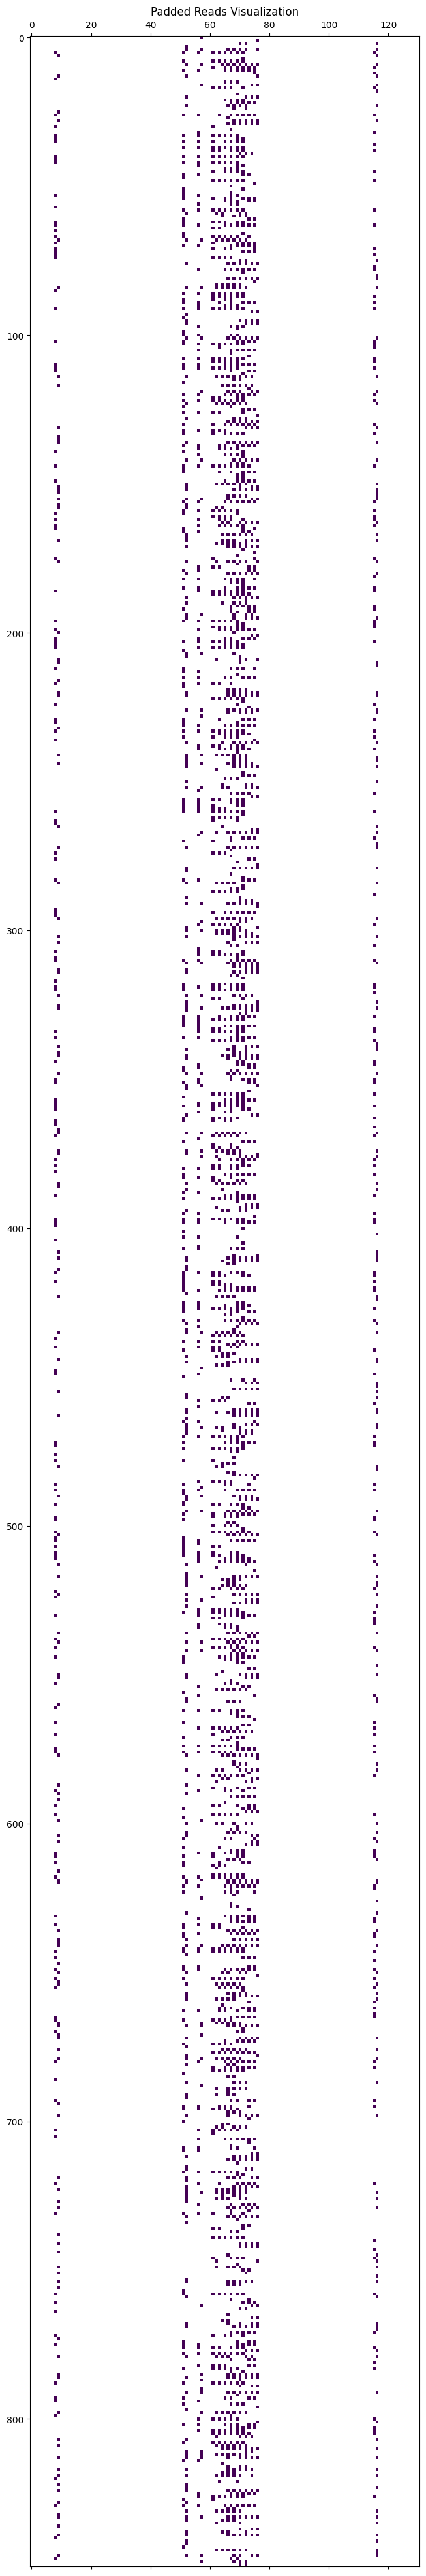

Visualization completed.
Region length: 131
ACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAAT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [9, 52, 57, 62, 64, 66, 68, 70, 72, 74, 76, 116]
CG_1 at index 9 has genomic coordinate: chr1:206586121
CG_2 at index 52 has genomic coordinate: chr1:206586164
CG_3 at index 57 has genomic coordinate: chr1:206586169
CG_4 at index 62 has genomic coordinate: chr1:206586174
CG_5 at index 64 has genomic coordinate: chr1:206586176
CG_6 at index 66 has genomic coordinate: chr1:206586178
CG_7 at index 68 has genomic coordinate: chr1:206586180
CG_8 at index 70 has genomic coordinate: chr1:206586182
CG_9 at index 72 has genomic coordinate: chr1:206586184
CG_10 at index 74 has genomic coordinate: chr1:206586186
CG_11 at index 76 has genomic coordinate: chr1:206586188
CG_12 at index 116 has genomic coordinate: chr1:206586228
CG_info_df     Po

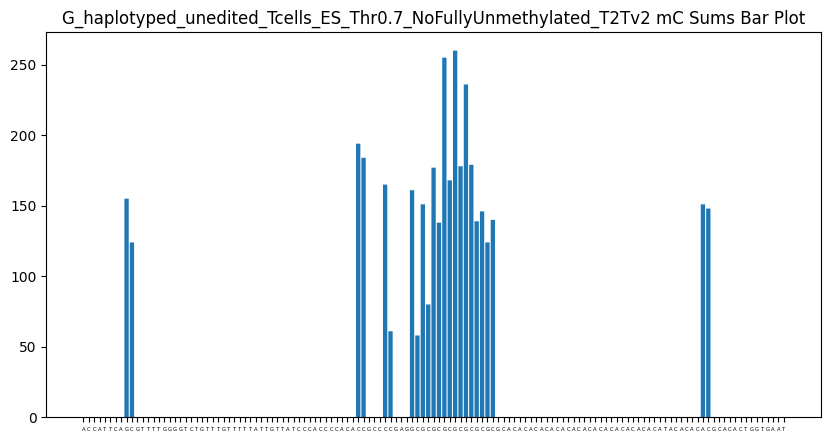

(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.18235294 0.14588235 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.22823529 0.21647059 0.
 0.         0.         0.19411765 0.07176471 0.         0.
 0.         0.18941176 0.06823529 0.17764706 0.09411765 0.20823529
 0.16235294 0.3        0.19764706 0.30588235 0.20941176 0.27764706
 0.21058824 0.16352941 0.17176471 0.14588235 0.16470588 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

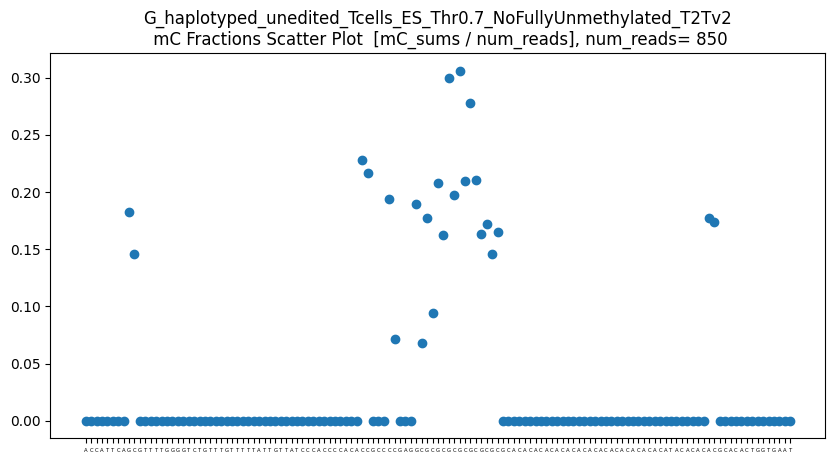

CGs_all_sums  = [279. 378. 226. 219. 231. 315. 423. 438. 415. 285. 264. 299.]


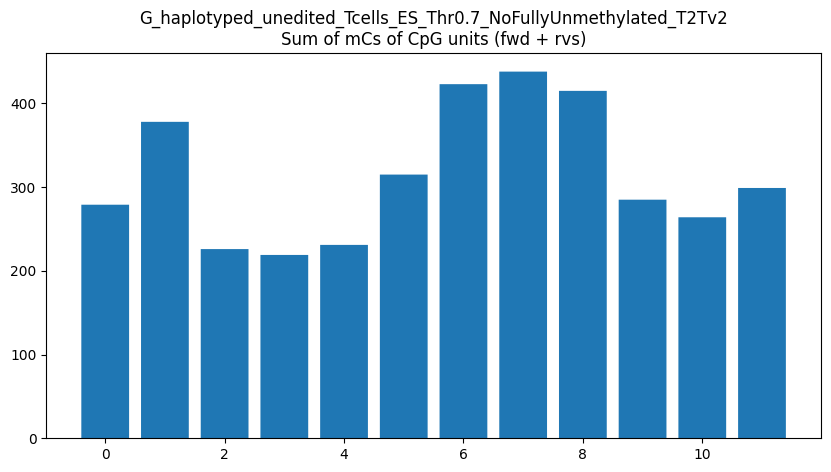

CGs_all_sums / len(CGs_all) = [0.32823529 0.44470588 0.26588235 0.25764706 0.27176471 0.37058824
 0.49764706 0.51529412 0.48823529 0.33529412 0.31058824 0.35176471]


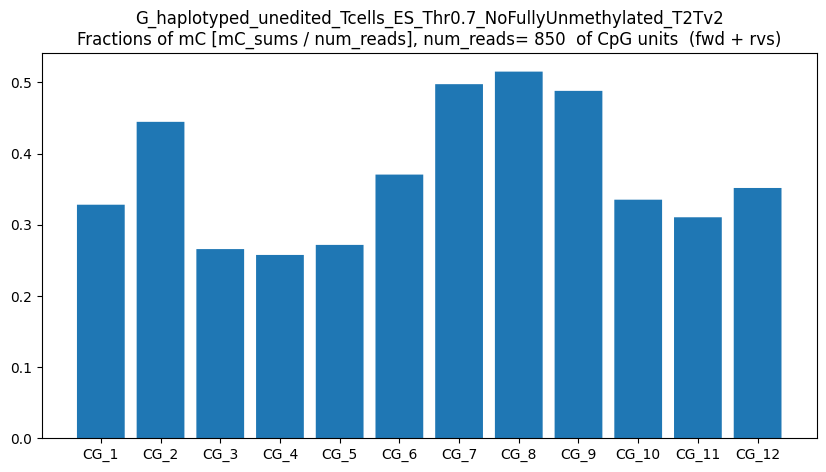

CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0.   0. 279.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 378.   0.   0.   0.
   0. 226.   0.   0.   0.   0. 219.   0. 231.   0. 315.   0. 423.   0.
 438.   0. 415.   0. 285.   0. 264.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 299.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


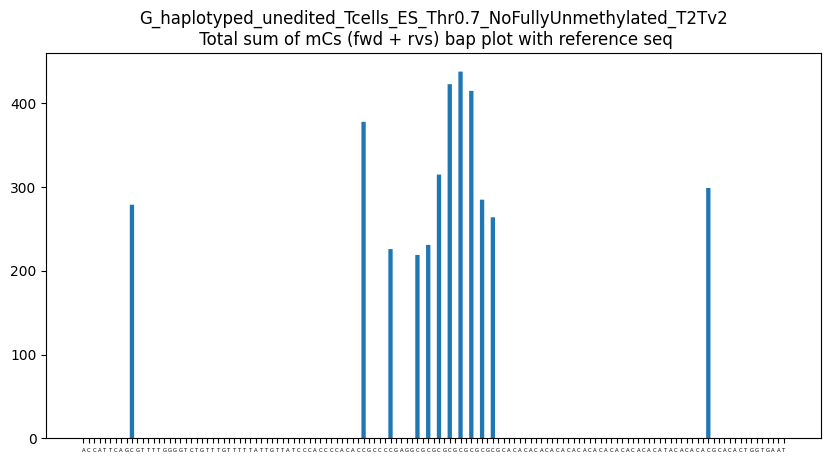

len(CGs_all) = 850
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.32823529 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.44470588 0.
 0.         0.         0.         0.26588235 0.         0.
 0.         0.         0.25764706 0.         0.27176471 0.
 0.37058824 0.         0.49764706 0.         0.51529412 0.
 0.48823529 0.         0.33529412 0.         0.31058824 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

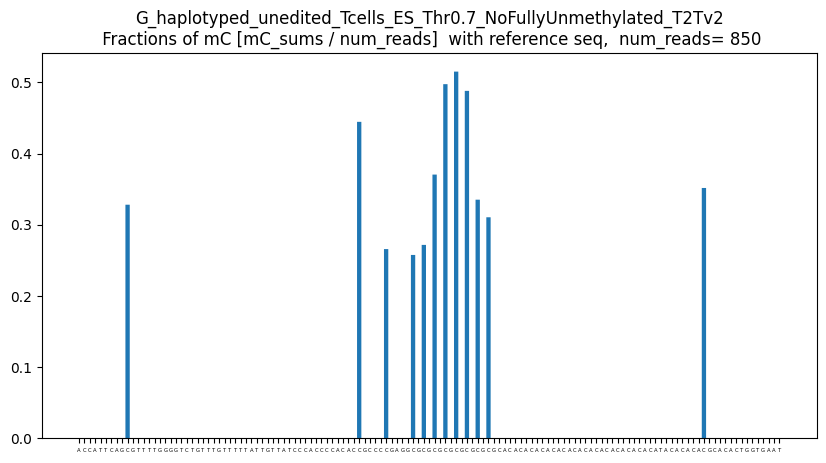

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


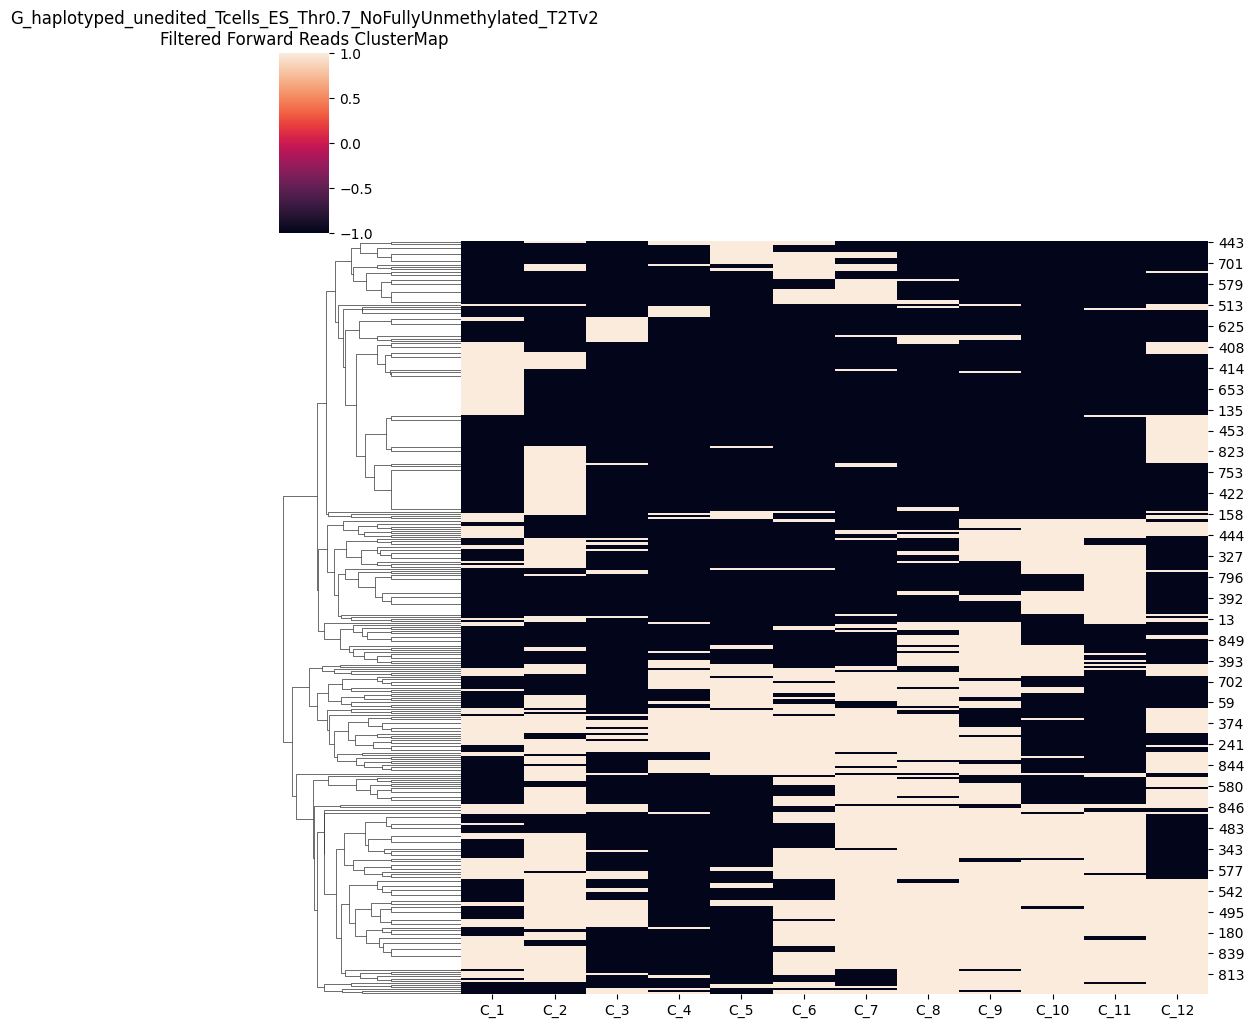

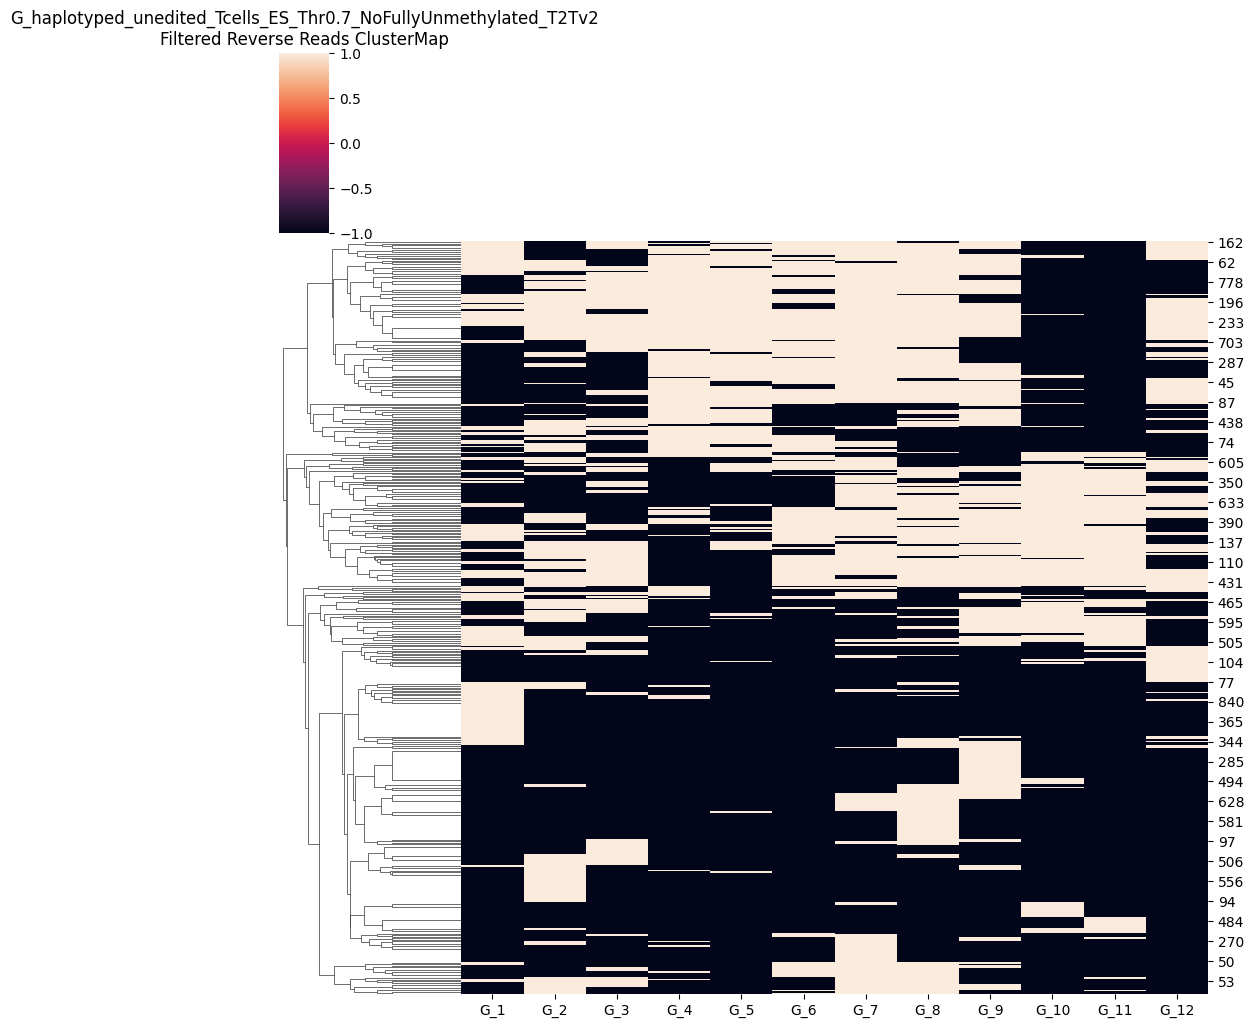

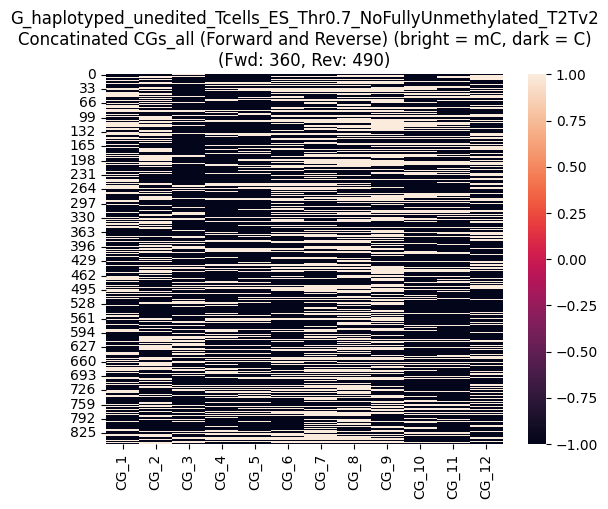

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



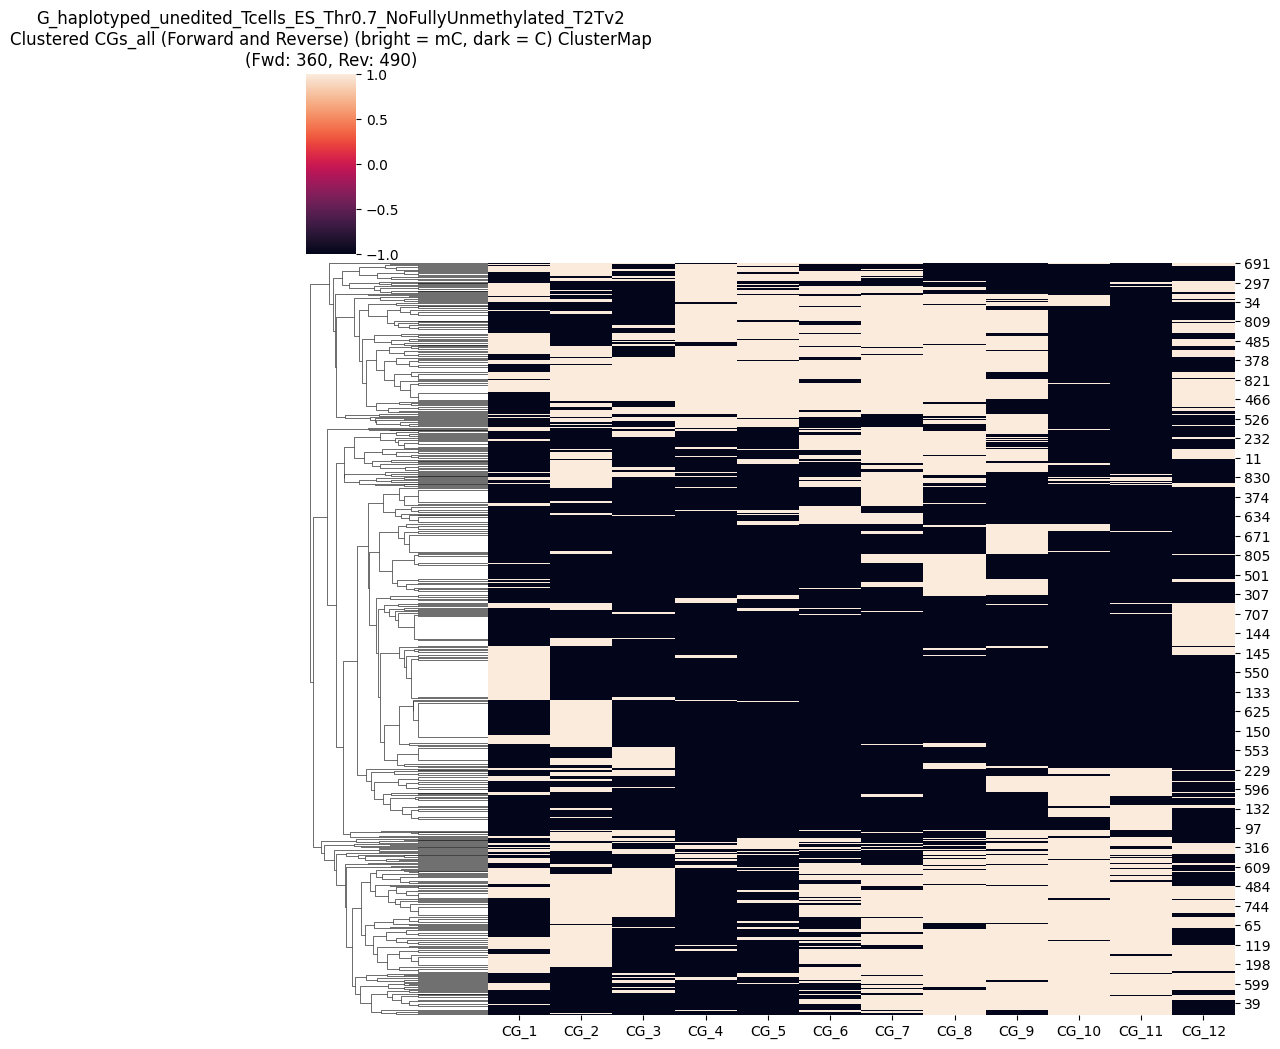

CGs_all saved as CG_12_units_combined_G_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_numFWD360_numRVS490_padded_reads_G_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206586112-206586243_2025-03-19.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [10]:
for base, bam_file in bam_files.items():
    experiment_name = base + "_haplotyped_unedited_Tcells_ES_Thr0.7_NoFullyUnmethylated_T2Tv2"
    threshold_mC =  0.7 #  0.9 #0.99
    bam_path = bam_file # bam_files[haplotype_i]

    extract_mCG_stat_plots(experiment_name, bam_path, date_today, 
                            reg_genome_version, region_chr, region_start, region_end, 
                            ref_genome_path, output_dir, motifs, threshold_mC)